# Precificação Inteligente de Veículos Seminovos: Um Modelo Preditivo para Avaliação de Mercado Baseado em Machine Learning


---

Este projeto ataca o desafio da precificação subjetiva e inconsistente no mercado de carros usados, um problema que gera ineficiência e risco financeiro para compradores e vendedores. Nosso objetivo principal é desenvolver um modelo preditivo de machine learning para estimar o valor de um veículo de forma precisa e consistente, utilizando seus atributos. Para isso, iremos comparar diferentes algoritmos e identificar os fatores-chave que mais impactam o preço final.

Comercialmente, esta solução permite que concessionárias otimizem suas margens de lucro e giro de estoque, que plataformas online melhorem a experiência do usuário com ferramentas de "preço justo", e que instituições financeiras aprimorem suas análises de risco, tornando o ecossistema de veículos usados mais transparente e eficiente.

O objetivo principal é fazer um projeto de previsão de preços de revendas de carros, mas existem alguns modelos que tem ocorrencia muito baixa no nosso dataset. Com isso, nós demos um recorte, de modo que somente sobrarão linhas com modelos quepossuem mais de 100 ocorrencias. Dessa forma, o modelo de previsão que desenvolveremos será mais assertivo em relação à previsão do preço, porque precisamos ter uma quantidade considerável de cada modelo no dataset para que o modelo aprenda minimamente bem. Além disso, com esse corte, a quantidade de linhas perdidas não é muito grande, levando em conta o tamanho original do dataset.

# Carregamento do DataSet e Exploração de Informações Iniciais

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import missingno as msno

link = "https://www.kaggle.com/datasets/vrajesh0sharma7/used-car-price-prediction"
drive.mount("/content/drive")
df = pd.read_csv("/content/sample_data/Used_Car_Price_Prediction.csv")
# Identificar os modelos com mais de 100 ocorrências
model_counts = df['model'].value_counts()
models_to_keep = model_counts[model_counts >= 100].index.tolist()

# Filtrar o DataFrame original
df_filtered = df[df['model'].isin(models_to_keep)].copy()

# Exibir as primeiras linhas do novo DataFrame filtrado e o número de linhas restantes
print("DataFrame filtrado (primeiras 5 linhas):")
df = df_filtered
display(df.head())

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Identificar as linhas com valores ausentes em qualquer coluna
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Obter os nomes únicos dos carros nessas linhas
cars_with_missing_values = rows_with_missing_values['car_name'].unique()

print("Nomes dos carros com valores ausentes em alguma coluna:")
for car_name in cars_with_missing_values:
    print(car_name)

Nomes dos carros com valores ausentes em alguma coluna:
hyundai grand i10
maruti alto k10
maruti ritz
hyundai i10
hyundai eon
maruti swift
maruti alto
hyundai i20
hyundai santro xing
maruti swift dzire
maruti wagon r 1.0
hyundai creta
hyundai elite i20
maruti ertiga
honda amaze
volkswagen polo
maruti celerio
toyota innova
honda city
hyundai verna
maruti eeco
maruti alto 800
maruti vitara brezza
renault kwid
ford ecosport
maruti baleno


Análise descritiva da coluna 'sale_price':


,sale_price
count,5.316000e+03
mean,4.142918e+05
std,1.921765e+05
min,0.000000e+00
25%,2.824990e+05
50%,3.702490e+05
75%,4.978240e+05
max,1.533481e+06


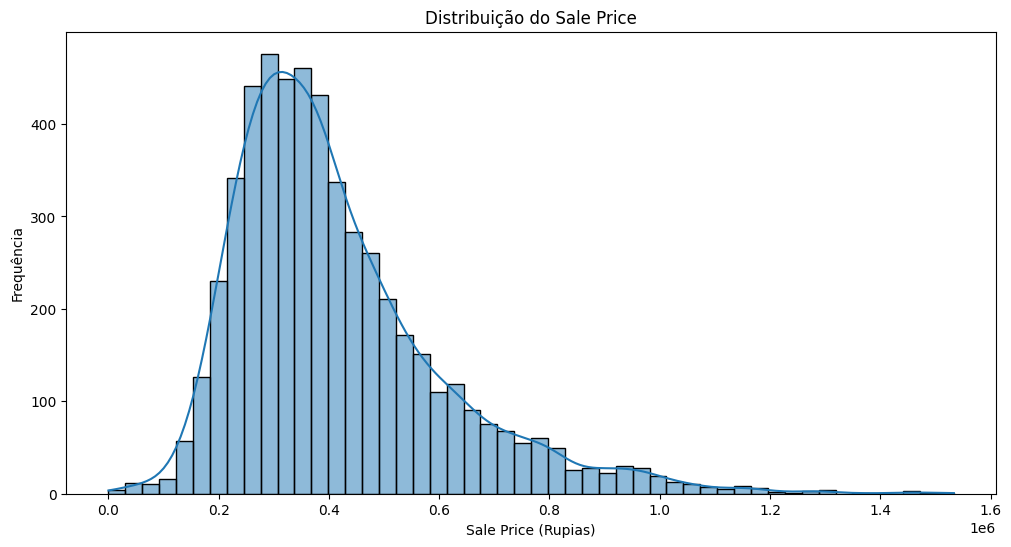

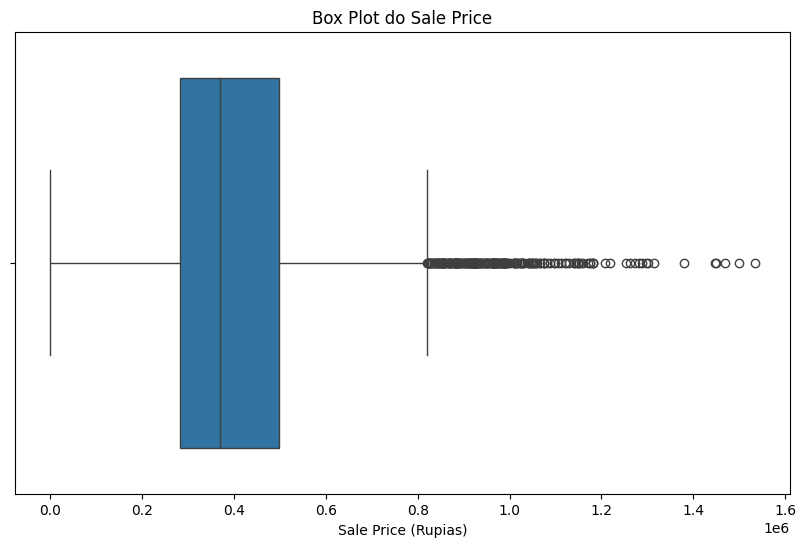

In [ ]:

import seaborn as sns


# Analisar a distribuição da variável alvo 'sale_price'
print("Análise descritiva da coluna 'sale_price':")
display(df['sale_price'].describe())

# Visualizar a distribuição do 'sale_price'
plt.figure(figsize=(12, 6))
sns.histplot(df['sale_price'], bins=50, kde=True)
plt.title('Distribuição do Sale Price')
plt.xlabel('Sale Price (Rupias)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sale_price'])
plt.title('Box Plot do Sale Price')
plt.xlabel('Sale Price (Rupias)')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5316 entries, 0 to 7398
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5316 non-null   object 
 1   yr_mfr               5316 non-null   int64  
 2   fuel_type            5316 non-null   object 
 3   kms_run              5316 non-null   int64  
 4   sale_price           5316 non-null   int64  
 5   city                 5316 non-null   object 
 6   times_viewed         5316 non-null   int64  
 7   body_type            5306 non-null   object 
 8   transmission         5042 non-null   object 
 9   variant              5316 non-null   object 
 10  assured_buy          5316 non-null   bool   
 11  registered_city      5314 non-null   object 
 12  registered_state     5314 non-null   object 
 13  is_hot               5316 non-null   bool   
 14  rto                  5316 non-null   object 
 15  source               5243 non-null   object

In [ ]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,5316.000000,5316.000000,5.316000e+03,5316.000000,5316.000000,5.316000e+03,3.046000e+03,5316.000000,5316.000000
mean,2013.844996,61259.430211,4.142918e+05,1389.183597,1.310008,3.953369e+05,4.933909e+05,9622.965952,62143.920805
std,2.949186,42994.159086,1.921765e+05,1884.787168,0.556008,2.035752e+05,2.249658e+05,4463.775951,28826.490973
min,2000.000000,749.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,1.262250e+05,0.000000,0.000000
25%,2012.000000,31397.000000,2.824990e+05,521.750000,1.000000,2.570000e+05,3.310572e+05,6562.000000,42375.000000
50%,2014.000000,53939.500000,3.702490e+05,989.000000,1.000000,3.500475e+05,4.405460e+05,8600.000000,55537.500000
75%,2016.000000,82343.750000,4.978240e+05,1720.000000,2.000000,4.835802e+05,5.979840e+05,11563.500000,74673.750000
max,2021.000000,996609.000000,1.533481e+06,61930.000000,5.000000,1.571598e+06,1.780955e+06,35619.000000,230023.000000


A partir de uma análise inicial, vimos que existem algumas colunas com valores ausentes. Agora, vamos avaliar a correlação desses valores, além de tratá-los da melhor forma possível.

# Tratamento de valores ausentes

In [ ]:
# Verificando a quantidade de valores ausentes por coluna
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Criando um DataFrame para visualização
missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna:
                     Total Ausentes  Percentual (%)
original_price                 2270       42.701279
car_availability                372        6.997743
transmission                    274        5.154251
source                           73        1.373213
body_type                        10        0.188111
fitness_certificate               5        0.094056
registered_city                   2        0.037622
registered_state                  2        0.037622
car_rating                        2        0.037622


<Figure size 1000x800 with 0 Axes>

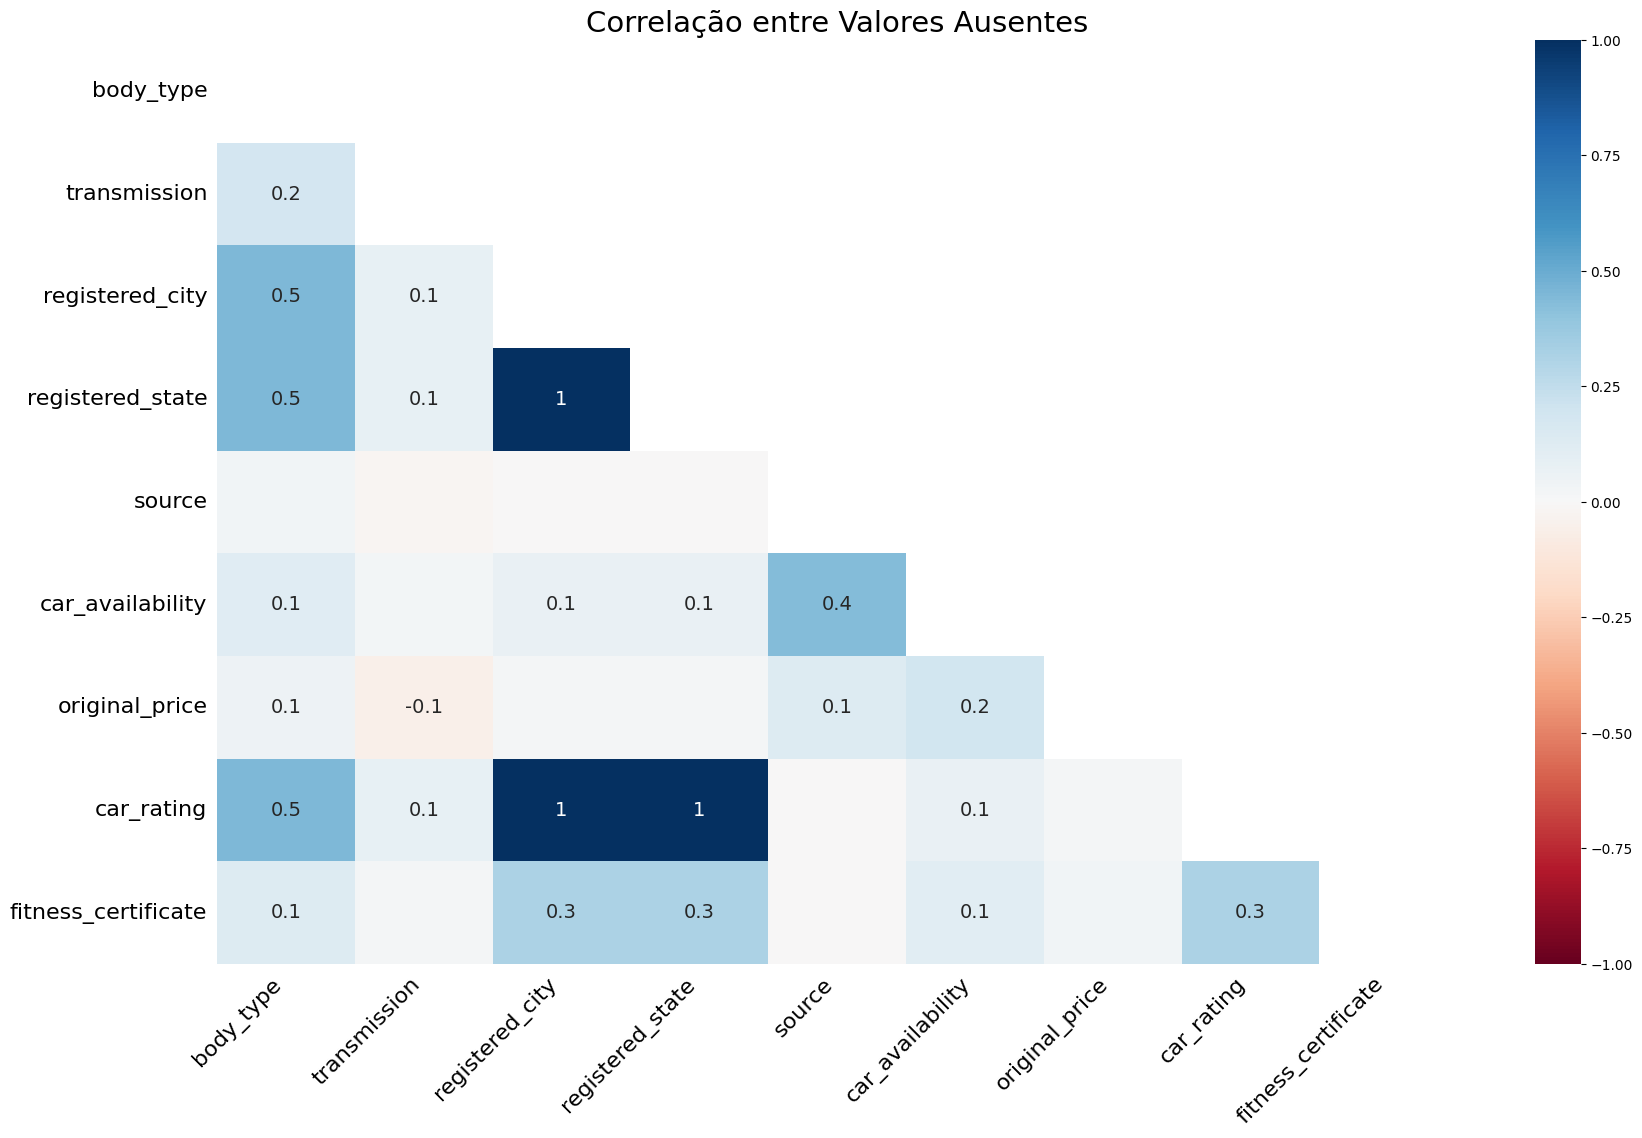

In [ ]:
# Visualizando a correlação entre valores ausentes
plt.figure(figsize=(10, 8))
msno.heatmap(df)
plt.title('Correlação entre Valores Ausentes',fontsize=21)
plt.show()

DIAGNÓSTICO DA MATRIZ DE CORRELAÇÕES:
- Variáveis que tendem a estar ausente juntas:

  1. registered_state x registered_city (correlação mais forte)
  2. car_rating x registered_city
  3. car_rating x registered_state
  4. car_rating x body_type
  5. registered_city x body tipe
  6. registered_state x body tipe

- Suposições baseadas na análise de ausência e foco no objetivo do projeto (previsão de preço):

  *   A alta porcentagem de ausência em `original_price` pode ser MAR (Missing at Random), dependendo de características do carro ou do processo de coleta, ou MNAR se a ausência estiver ligada ao próprio valor do preço original. Esta variável é crucial para a previsão de preço e requer investigação aprofundada.
  *   As ausências em `car_availability`, `transmission`, `source` e `body_type` podem ser MAR, possivelmente relacionadas a inconsistências na origem dos dados ou características específicas de certos veículos. Como afetam atributos importantes do carro, o tipo de ausência deve ser avaliado.
  *   As ausências em `registered_city`, `registered_state`, `car_rating`, `fitness_certificate` e `ad_created_on` são mínimas e parecem ter baixa correlação com outras ausências, sugerindo que podem ser MCAR (Missing Completely at Random).

- Principais variáveis a serem avaliadas quanto ao tipo de ausência (MCAR, MAR, MNAR) com foco no impacto na previsão de preço:

  *   `original_price` (devido à alta porcentagem de ausência e relevância para o preço final)
  *   `car_availability`
  *   `transmission`
  *   `source`
  *   `body_type`

- Suposições Gerais Adicionais:
  1. Deve haver algum estado em que nem as cidades nem os estados são computados

DIAGNÓSTICO DA MATRIZ DE CORRELAÇÕES (APÓS FILTRAGEM):
- Variáveis que tendem a estar ausente juntas:

  1. `registered_state` x `registered_city` (correlação mais forte)
  2. `car_rating` x `registered_city`
  3. `car_rating` x `registered_state`
  4. `car_rating` x `body_type`
  5. `registered_city` x `body_type`
  6. `registered_state` x `body_type`
  7. `original_price` x `car_availability`
  8. `original_price` x `transmission`
  9. `original_price` x `source`
  10. `original_price` x `body_type`

- Suposições baseadas na análise de ausência e foco no objetivo principal do projeto (previsão de preço) e focos secundários:

  * A alta porcentagem de ausência em `original_price` pode ser MAR (Missing at Random) ou MNAR (Missing Not at Random). A análise anterior mostrou uma diferença estatisticamente significativa no `sale_price` entre os grupos com e sem `original_price`, sugerindo que a ausência não é MCAR. Esta variável é crucial para a previsão de preço e requer investigação aprofundada.
  * As ausências em `car_availability`, `transmission`, `source` e `body_type` podem ser MAR, possivelmente relacionadas a inconsistências na origem dos dados ou características específicas de certos veículos. Como afetam atributos importantes do carro, o tipo de ausência deve ser avaliado. A ausência nessas colunas também pode impactar a análise para o foco secundário de determinar a demanda (`is_hot`).
  * As ausências em `registered_city`, `registered_state`, `car_rating`, `fitness_certificate` e `ad_created_on` são mínimas e parecem ter baixa correlação com outras ausências, sugerindo que podem ser MCAR (Missing Completely at Random). A ausência em `car_rating` pode ter um impacto menor nos focos secundários.

- Principais variáveis a serem avaliadas quanto ao tipo de ausência (MCAR, MAR, MNAR) com foco no impacto na previsão de preço e nos focos secundários (demanda do carro, dificuldade de venda por idade/donos):

  * `original_price` (devido à alta porcentagem de ausência e relevância para o preço final e para entender a depreciação)
  * `car_availability` (relevante para o foco secundário de demanda do carro)
  * `transmission` (atributo importante para a previsão de preço e pode influenciar a dificuldade de venda)
  * `source` (pode ter alguma relação com a qualidade dos dados ou tipo de carro)
  * `body_type` (atributo importante para a previsão de preço e pode influenciar a dificuldade de venda)
  * `yr_mfr` e `total_owners` (embora com poucas ausências, são cruciais para o foco secundário de dificuldade de venda por idade/donos. É importante garantir a completude e precisão desses dados).
  * `is_hot` (variável alvo para um dos focos secundários; a ausência afetaria diretamente essa análise)
  * `sale_price` (variável alvo principal para a previsão de preço; a ausência inviabilizaria o modelo)

- Suposições Gerais Adicionais:
  1. Deve haver algum estado em que nem as cidades nem os estados são computados.
  2. A ausência de `original_price` pode estar ligada a carros mais antigos ou de modelos menos populares, onde o registro do preço original é menos comum.
  3. A ausência em `car_availability` pode indicar carros que foram vendidos rapidamente ou retirados do mercado por outros motivos.

  ---
  ---
  ---
  ---
  ---
  ---
  ---
  ---
  ---
  
  ANÁLISE DE AUSÊNCIA DE `original_price`

Teste t para 'sale_price' entre grupos com e sem 'original_price' ausente:
Estatística t: 14.4985
Valor p: 0.0000

Há uma diferença estatisticamente significativa na média de 'sale_price' entre os grupos.
Isso sugere que a ausência em 'original_price' pode estar relacionada ao 'sale_price' (indício de MAR ou MNAR).


/tmp/ipython-input-3538038616.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, patch_artist=True, labels=['Com Original Price', 'Sem Original Price'])


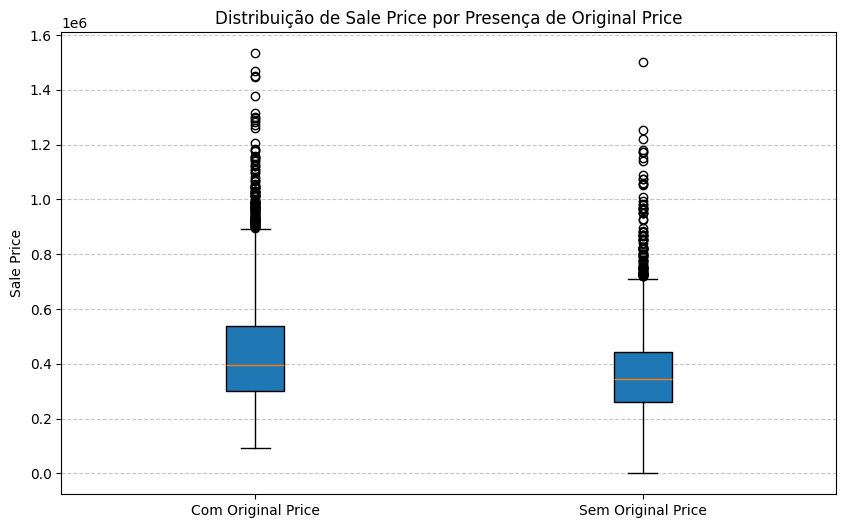

In [ ]:
from scipy import stats

# Criar dois grupos com base na ausência ou presença de 'original_price'
df_with_original_price = df.dropna(subset=['original_price'])
df_without_original_price = df[df['original_price'].isnull()]

# Comparar a média de 'sale_price' entre os dois grupos usando um teste t independente
t_stat, p_value = stats.ttest_ind(df_with_original_price['sale_price'], df_without_original_price['sale_price'])

print(f"Teste t para 'sale_price' entre grupos com e sem 'original_price' ausente:")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("\nHá uma diferença estatisticamente significativa na média de 'sale_price' entre os grupos.")
    print("Isso sugere que a ausência em 'original_price' pode estar relacionada ao 'sale_price' (indício de MAR ou MNAR).")
else:
    print("\nNão há uma diferença estatisticamente significativa na média de 'sale_price' entre os grupos.")
    print("Isso sugere que a ausência em 'original_price' pode ser MCAR em relação ao 'sale_price'.")

# Visualizar a distribuição de 'sale_price' para ambos os grupos
plt.figure(figsize=(10, 6))
# Criar uma lista dos dados para os box plots
data_to_plot = [df_with_original_price['sale_price'].dropna(), df_without_original_price['sale_price'].dropna()]
plt.boxplot(data_to_plot, patch_artist=True, labels=['Com Original Price', 'Sem Original Price'])
plt.title('Distribuição de Sale Price por Presença de Original Price')
plt.ylabel('Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Analisar a distribuição de 'make' para ambos os grupos
make_counts_with = df_with_original_price['make'].value_counts(normalize=True)
make_counts_without = df_without_original_price['make'].value_counts(normalize=True)

print("\nDistribuição da variável 'make' (Percentual):")
print("\nGrupo com 'original_price':")
print(make_counts_with.head()) # Exibir as principais marcas

print("\nGrupo sem 'original_price':")
print(make_counts_without.head()) # Exibir as principais marcas



Distribuição da variável 'make' (Percentual):

Grupo com 'original_price':
make
maruti        0.545634
hyundai       0.291530
honda         0.063362
renault       0.031188
volkswagen    0.028562
Name: proportion, dtype: float64

Grupo sem 'original_price':
make
maruti        0.472687
hyundai       0.341850
honda         0.080617
renault       0.033040
volkswagen    0.029075
Name: proportion, dtype: float64


**Observação sobre `original_price`:**

A análise da variável `original_price` revelou uma diferença estatisticamente significativa na média e distribuição do `sale_price` entre os veículos que possuem o preço original registrado e aqueles que não possuem. Isso sugere que a ausência de dados em `original_price` não é completamente aleatória (MCAR) e pode ser MAR (Missing at Random) ou MNAR (Missing Not at Random).


Mesmo que a correlação com `make` não seja alta, a análise anterior mostrou uma diferença estatisticamente significativa no sale_price entre esses grupos. Essa diferença no sale_price é um indício mais forte de que a ausência do original_price não é MCAR, mas sim MAR ou MNAR, pois a ausência está relacionada ao valor de venda do carro.

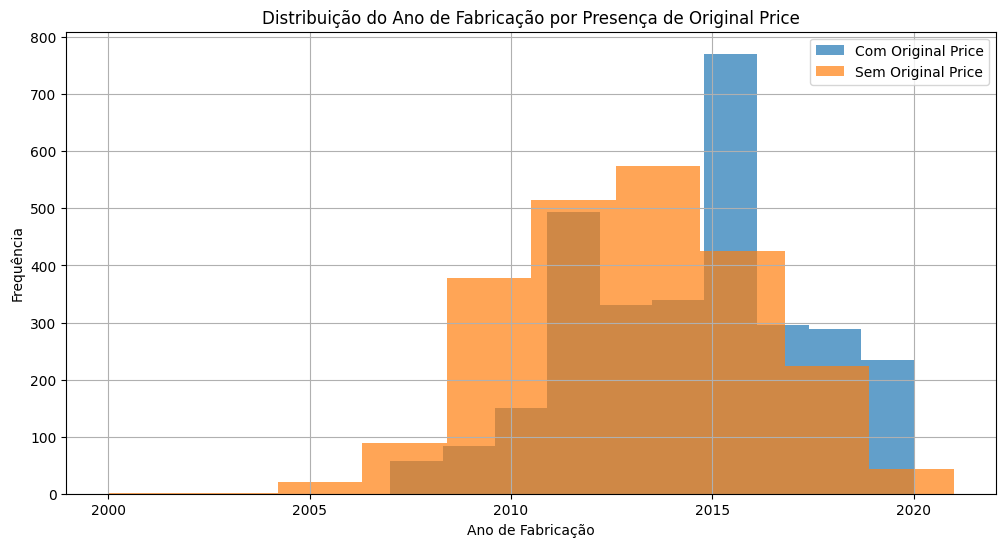


Teste Mann-Whitney U para 'yr_mfr' entre grupos com e sem 'original_price' ausente:
Estatística: 4468321.0000
Valor p: 0.0000
Há uma diferença estatisticamente significativa na distribuição de 'yr_mfr' entre os grupos.
Isso sugere que a ausência em 'original_price' pode estar relacionada ao ano de fabricação (indício de MAR).


In [ ]:
# Analisar a distribuição de 'yr_mfr' para ambos os grupos (com e sem original_price)
plt.figure(figsize=(12, 6))
df_with_original_price['yr_mfr'].hist(alpha=0.7, label='Com Original Price')
df_without_original_price['yr_mfr'].hist(alpha=0.7, label='Sem Original Price')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Frequência')
plt.title('Distribuição do Ano de Fabricação por Presença de Original Price')
plt.legend()
plt.show()

# Opcional: Teste estatístico para comparar as distribuições (por exemplo, teste Mann-Whitney U para dados não normais)
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df_with_original_price['yr_mfr'], df_without_original_price['yr_mfr'])

print(f"\nTeste Mann-Whitney U para 'yr_mfr' entre grupos com e sem 'original_price' ausente:")
print(f"Estatística: {stat:.4f}")
print(f"Valor p: {p:.4f}")

if p < 0.05:
    print("Há uma diferença estatisticamente significativa na distribuição de 'yr_mfr' entre os grupos.")
    print("Isso sugere que a ausência em 'original_price' pode estar relacionada ao ano de fabricação (indício de MAR).")
else:
    print("Não há uma diferença estatisticamente significativa na distribuição de 'yr_mfr' entre os grupos.")
    print("Isso sugere que a ausência em 'original_price' pode não estar fortemente relacionada ao ano de fabricação.")

**Classificação da Ausência em `original_price` como MAR e Abordagem de Imputação:**

Com base nas análises realizadas, observamos que a ausência de dados na coluna `original_price` não é completamente aleatória. Identificamos que tanto o `yr_mfr` (ano de fabricação) quanto o `sale_price` (preço de venda) apresentam distribuições diferentes entre os grupos com e sem `original_price` preenchido. Essa dependência da ausência em `original_price` de outras variáveis observadas no dataset (`yr_mfr` e `sale_price`) nos leva a classificar o tipo de ausência como **Missing at Random (MAR)**.

Considerando que a ausência é MAR, é importante testar diferentes métodos de imputação para preencher esses valores ausentes. A escolha do método pode impactar significativamente a qualidade do modelo preditivo. Nos próximos passos, iremos aplicar e comparar diferentes técnicas de imputação na coluna `original_price` para avaliar qual delas preserva melhor a distribuição dos dados e minimiza o potencial viés.

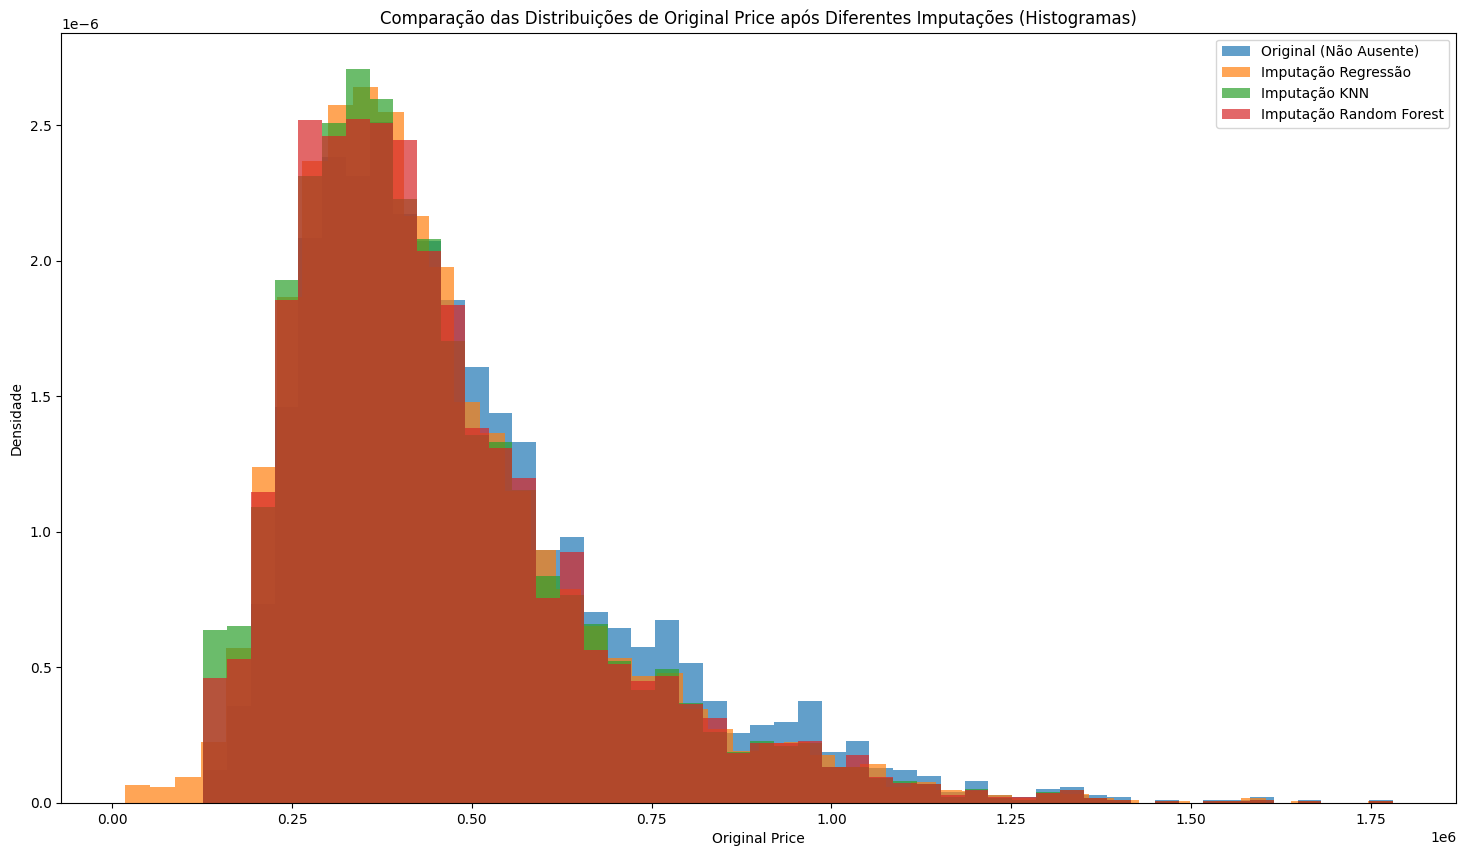

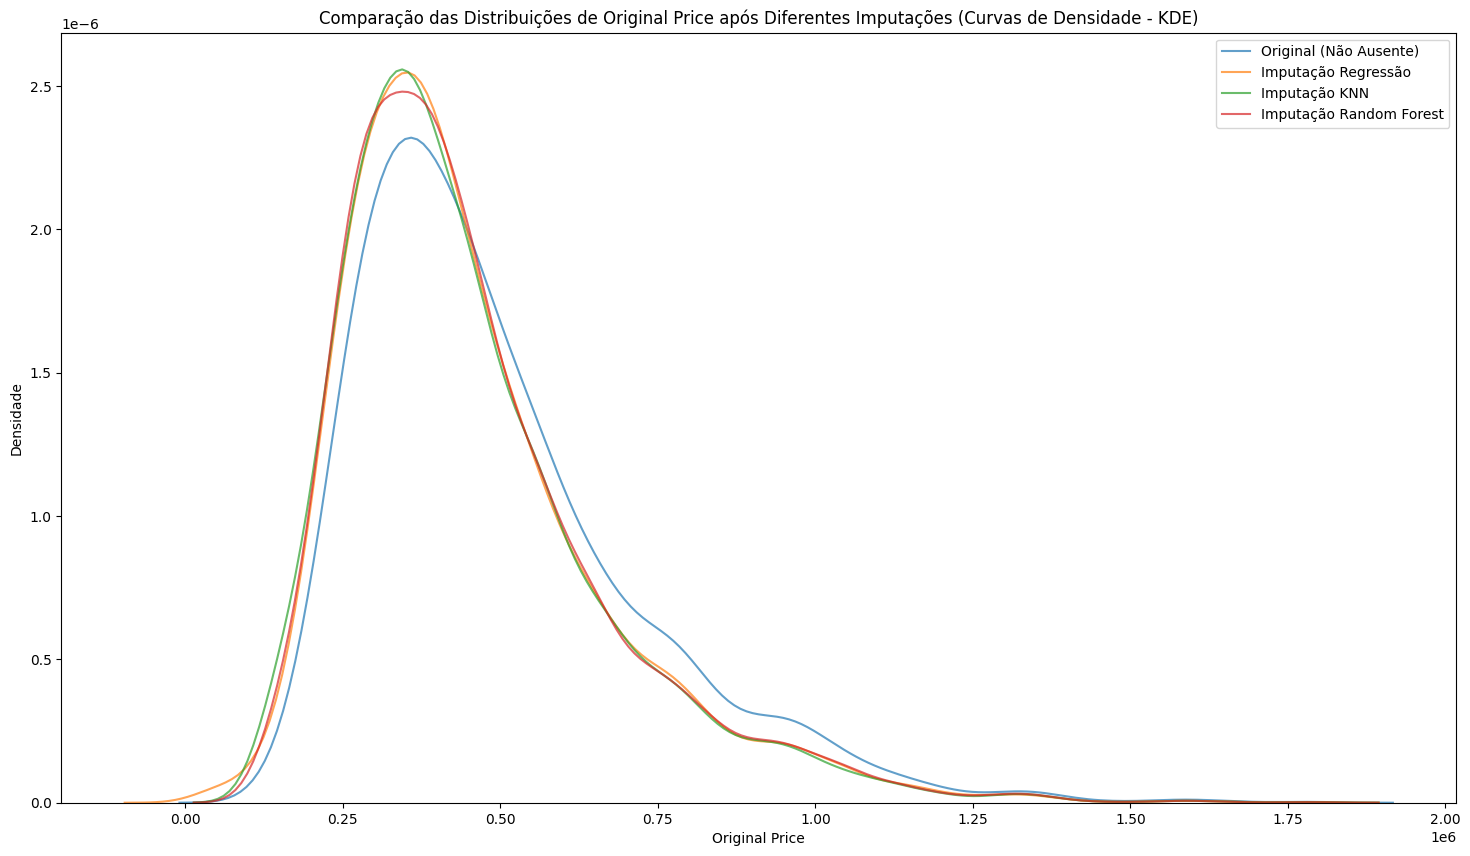

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Importar matplotlib explicitamente


# Criar cópias do DataFrame para cada método de imputação
df_regression_imputed = df.copy()
df_knn_imputed = df.copy()
df_rf_imputed = df.copy()


# Selecionar um conjunto mais amplo de variáveis numéricas relevantes para a imputação
# Além de sale_price, yr_mfr, kms_run, vamos incluir outras variáveis numéricas que podem influenciar o preço original
imputation_features = ['yr_mfr', 'kms_run', 'times_viewed', 'total_owners', 'broker_quote', 'emi_starts_from', 'booking_down_pymnt']

# Imputação por Regressão
regression_cols = imputation_features.copy()
# Remover 'original_price' se estiver na lista de features para o modelo preditivo da regressão
if 'original_price' in regression_cols:
    regression_cols.remove('original_price')


df_train = df_regression_imputed.dropna(subset=['original_price'] + regression_cols)
df_predict = df_regression_imputed[df_regression_imputed['original_price'].isnull()].copy()

# Garantir que as colunas de regressão existam no dataframe de previsão
df_predict = df_predict[regression_cols]

# Verificar se há dados para treinar e prever antes de prosseguir com a Regressão
if not df_train.empty and not df_predict.empty:
    model = LinearRegression()
    model.fit(df_train[regression_cols], df_train['original_price'])

    predicted_original_price = model.predict(df_predict)

    df_regression_imputed.loc[df_regression_imputed['original_price'].isnull(), 'original_price'] = predicted_original_price

# Limitar os valores imputados por regressão para não serem negativos, já que preço original não pode ser negativo
df_regression_imputed['original_price'] = df_regression_imputed['original_price'].apply(lambda x: max(x, 0))


# Imputação por KNN
knn_cols = imputation_features + ['original_price'] # Incluir original_price para encontrar vizinhos

df_knn_temp = df_knn_imputed[knn_cols].copy()

knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputed[knn_cols] = knn_imputer.fit_transform(df_knn_temp)
df_knn_imputed['original_price'] = df_knn_imputed['original_price'].apply(lambda x: max(x, 0))


# Imputação por Random Forest
rf_cols = imputation_features.copy()
# Remover 'original_price' se estiver na lista de features para o modelo preditivo do Random Forest
if 'original_price' in rf_cols:
    rf_cols.remove('original_price')


df_train_rf = df_rf_imputed.dropna(subset=['original_price'] + rf_cols)
df_predict_rf = df_rf_imputed[df_rf_imputed['original_price'].isnull()].copy()

# Garantir que as colunas de random forest existam no dataframe de previsão
df_predict_rf = df_predict_rf[rf_cols]

# Verificar se há dados para treinar e prever antes de prosseguir com a Random Forest
if not df_train_rf.empty and not df_predict_rf.empty:
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(df_train_rf[rf_cols], df_train_rf['original_price'])

    predicted_original_price_rf = model_rf.predict(df_predict_rf)

    df_rf_imputed.loc[df_rf_imputed['original_price'].isnull(), 'original_price'] = predicted_original_price_rf

# Limitar os valores imputados por Random Forest para não serem negativos
df_rf_imputed['original_price'] = df_rf_imputed['original_price'].apply(lambda x: max(x, 0))


# --- Gerar Histograma ---
plt.figure(figsize=(18, 10)) # Aumentar o tamanho do gráfico

plt.hist(df['original_price'].dropna(), bins=50, alpha=0.7, label='Original (Não Ausente)', density=True)
plt.hist(df_regression_imputed['original_price'], bins=50, alpha=0.7, label='Imputação Regressão', density=True)
plt.hist(df_knn_imputed['original_price'], bins=50, alpha=0.7, label='Imputação KNN', density=True)
plt.hist(df_rf_imputed['original_price'], bins=50, alpha=0.7, label='Imputação Random Forest', density=True)

plt.xlabel('Original Price')
plt.ylabel('Densidade')
plt.title('Comparação das Distribuições de Original Price após Diferentes Imputações (Histogramas)')
plt.legend()
plt.show()

# --- Gerar Curva de Densidade (KDE Plot) ---
plt.figure(figsize=(18, 10)) # Aumentar o tamanho do gráfico

sns.kdeplot(df['original_price'].dropna(), fill=False, alpha=0.7, label='Original (Não Ausente)')
sns.kdeplot(df_regression_imputed['original_price'], fill=False, alpha=0.7, label='Imputação Regressão')
sns.kdeplot(df_knn_imputed['original_price'], fill=False, alpha=0.7, label='Imputação KNN')
sns.kdeplot(df_rf_imputed['original_price'], fill=False, alpha=0.7, label='Imputação Random Forest')


plt.xlabel('Original Price')
plt.ylabel('Densidade')
plt.title('Comparação das Distribuições de Original Price após Diferentes Imputações (Curvas de Densidade - KDE)')
plt.legend()
plt.show()

**Escolha e Aplicação do Método de Imputação para `original_price`**

Após comparar as distribuições da coluna `original_price` imputada pelos métodos de Regressão, KNN e Random Forest, utilizando um conjunto expandido de variáveis numéricas relevantes, a **Imputação por Random Forest** demonstrou ser a que melhor preserva a forma e as características da distribuição original dos dados (não ausentes).

A análise visual dos histogramas e, em particular, das curvas de densidade (KDE plots), indicou que o modelo Random Forest conseguiu capturar as nuances da distribuição de forma mais eficaz, sugerindo que ele aprendeu melhor as relações complexas entre as variáveis preditoras e o preço original.

Portanto, com base nesta análise, decidimos aplicar a Imputação por Random Forest para preencher os valores ausentes na coluna `original_price`.

In [ ]:
# Remoção do código de imputação de original_price por Random Forest, substituído pelo método baseado na tabela_precos

# O código para imputação usando a tabela_precos será executado na célula dc92ec84
# Após a execução da célula dc92ec84, alguns valores ausentes em 'original_price' podem permanecer.
# Vamos imputar os valores restantes em 'original_price' usando a média como um método de fallback.

print("Imputação de valores restantes na coluna 'original_price' com a média como fallback...")
# Calcular a média dos valores não ausentes em 'original_price'
mean_original_price = df['original_price'].mean()

# Imputar os valores ausentes restantes com a média
df['original_price'].fillna(mean_original_price, inplace=True)

print("\nVerificando valores ausentes na coluna 'original_price' após imputação com a média:")
print(df['original_price'].isnull().sum())

if df['original_price'].isnull().sum() == 0:
    print("A imputação da coluna 'original_price' foi confirmada como bem-sucedida.")
else:
    print("ATENÇÃO: Ainda existem valores ausentes na coluna 'original_price' após a imputação com a média.")

# Verificar se ainda existem casos com depreciação negativa após a imputação com a média
# Assumindo que 'depreciation' = 'original_price' - 'sale_price'
# Recalcular a depreciação após a imputação
df['depreciation'] = df['original_price'] - df['sale_price']
negative_depreciation_count_after = df[df['depreciation'] < 0].shape[0]
print(f"\nNúmero de casos com depreciação negativa após a imputação com a média: {negative_depreciation_count_after}")

if negative_depreciation_count_after == 0:
    print("A correção para depreciação negativa foi aplicada com sucesso.")
else:
    print("ATENÇÃO: Ainda existem casos com depreciação negativa após a correção.")

Imputação de valores restantes na coluna 'original_price' com a média como fallback...

Verificando valores ausentes na coluna 'original_price' após imputação com a média:
0
A imputação da coluna 'original_price' foi confirmada como bem-sucedida.

Número de casos com depreciação negativa após a imputação com a média: 413
ATENÇÃO: Ainda existem casos com depreciação negativa após a correção.


/tmp/ipython-input-402986786.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_price'].fillna(mean_original_price, inplace=True)


# Task
Analise a ausência de dados na coluna `transmission` do conjunto de dados "used_cars_data.csv", incluindo a análise do tipo de ausência (MCAR, MAR, MNAR) através de comparações de distribuição de outras variáveis (categóricas e numéricas) com e sem valores ausentes em `transmission` utilizando testes estatísticos e gráficos. Em seguida, realize a imputação dos valores ausentes na coluna `transmission` e confirme a imputação. Apresente todos os resultados e códigos em português.

In [ ]:
# Verificar a quantidade e o percentual de valores ausentes na coluna 'transmission'
missing_transmission_count = df['transmission'].isnull().sum()
missing_transmission_percent = (missing_transmission_count / len(df)) * 100

print(f"Quantidade de valores ausentes na coluna 'transmission': {missing_transmission_count}")
print(f"Percentual de valores ausentes na coluna 'transmission': {missing_transmission_percent:.2f}%")

Quantidade de valores ausentes na coluna 'transmission': 274
Percentual de valores ausentes na coluna 'transmission': 5.15%


## Comparação da distribuição de variáveis categóricas pela ausência em `transmission`

### Subtask:
Utilizar testes estatísticos (por exemplo, teste qui-quadrado) e visualizar a distribuição de variáveis categóricas como `fuel_type` e `make` para os grupos com e sem valores ausentes em `transmission` utilizando gráficos de barras.


**Reasoning**:
Criar a coluna booleana para indicar ausência em 'transmission', criar tabelas de contingência com 'fuel_type' e 'make' e realizar os testes qui-quadrado, imprimindo os resultados.



Teste Qui-Quadrado para a relação entre Ausência em 'transmission' e 'fuel_type':
Estatística Qui-Quadrado: 14.5266
Valor p: 0.0023
Graus de Liberdade: 3
Há uma associação estatisticamente significativa entre a ausência em 'transmission' e 'fuel_type'.
--------------------------------------------------
Teste Qui-Quadrado para a relação entre Ausência em 'transmission' e 'make':
Estatística Qui-Quadrado: 78.2236
Valor p: 0.0000
Graus de Liberdade: 6
Há uma associação estatisticamente significativa entre a ausência em 'transmission' e 'make'.


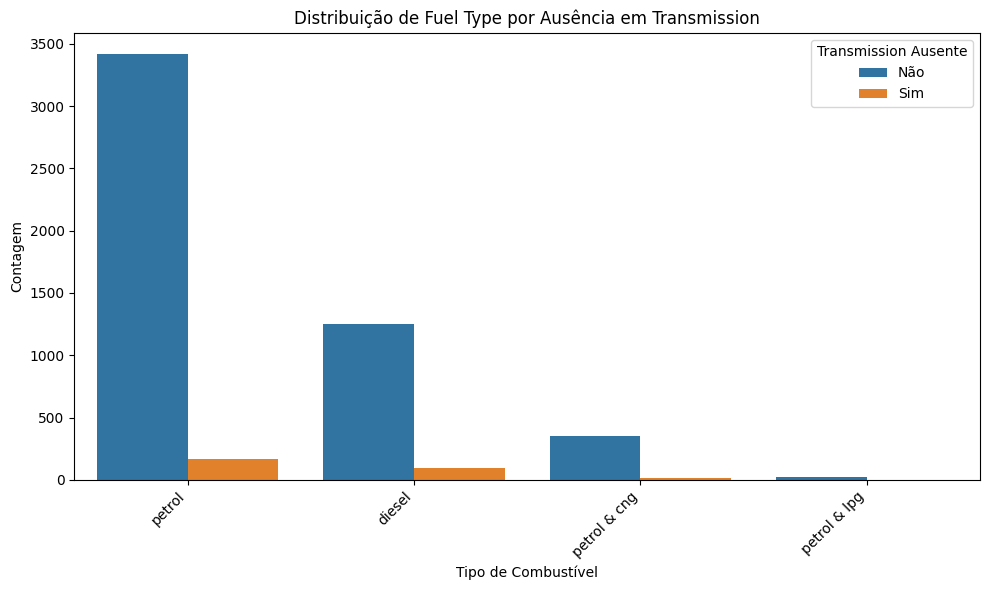

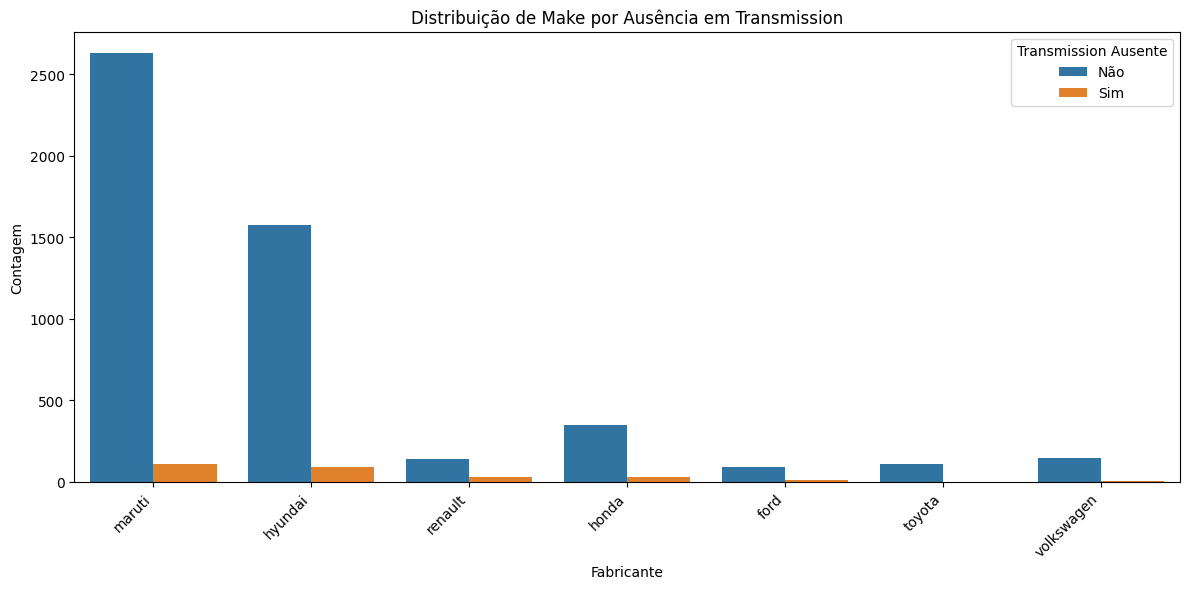

In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Criar coluna booleana temporária
df['transmission_missing'] = df['transmission'].isnull()

# 2. Tabela de contingência com fuel_type
contingency_table_fuel_type = pd.crosstab(df['fuel_type'], df['transmission_missing'])

# 3. Teste qui-quadrado para fuel_type
chi2_fuel_type, p_fuel_type, dof_fuel_type, expected_fuel_type = chi2_contingency(contingency_table_fuel_type)

# 4. Imprimir resultados para fuel_type
print(f"Teste Qui-Quadrado para a relação entre Ausência em 'transmission' e 'fuel_type':")
print(f"Estatística Qui-Quadrado: {chi2_fuel_type:.4f}")
print(f"Valor p: {p_fuel_type:.4f}")
print(f"Graus de Liberdade: {dof_fuel_type}")
if p_fuel_type < 0.05:
    print("Há uma associação estatisticamente significativa entre a ausência em 'transmission' e 'fuel_type'.")
else:
    print("Não há uma associação estatisticamente significativa entre a ausência em 'transmission' e 'fuel_type'.")

print("-" * 50) # Separador

# 5. Tabela de contingência com make
contingency_table_make = pd.crosstab(df['make'], df['transmission_missing'])

# 6. Teste qui-quadrado para make
chi2_make, p_make, dof_make, expected_make = chi2_contingency(contingency_table_make)

# 7. Imprimir resultados para make
print(f"Teste Qui-Quadrado para a relação entre Ausência em 'transmission' e 'make':")
print(f"Estatística Qui-Quadrado: {chi2_make:.4f}")
print(f"Valor p: {p_make:.4f}")
print(f"Graus de Liberdade: {dof_make}")
if p_make < 0.05:
    print("Há uma associação estatisticamente significativa entre a ausência em 'transmission' e 'make'.")
else:
    print("Não há uma associação estatisticamente significativa entre a ausência em 'transmission' e 'make'.")

# 8. Gráfico de barras para fuel_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fuel_type', hue='transmission_missing')
plt.title('Distribuição de Fuel Type por Ausência em Transmission')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Contagem')
plt.legend(title='Transmission Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 9. Gráfico de barras para make
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='make', hue='transmission_missing')
plt.title('Distribuição de Make por Ausência em Transmission')
plt.xlabel('Fabricante')
plt.ylabel('Contagem')
plt.legend(title='Transmission Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 10. Remover coluna temporária (será feito no próximo passo, para manter o estado do dataframe)

**Reasoning**:
Realizar testes estatísticos (teste t independente ou Mann-Whitney U) e visualizar a distribuição de variáveis numéricas como `sale_price` e `kms_run` para os grupos com e sem valores ausentes em `transmission` utilizando box plots ou histogramas.




Teste t para 'sale_price' entre grupos com e sem 'transmission' ausente:
Estatística t: -12.9794
Valor p: 0.0000
Há uma diferença estatisticamente significativa na média de 'sale_price' entre os grupos.
Isso sugere que a ausência em 'transmission' pode estar relacionada ao 'sale_price' (indício de MAR ou MNAR).
--------------------------------------------------

Teste t para 'kms_run' entre grupos com e sem 'transmission' ausente:
Estatística t: 4.0035
Valor p: 0.0001
Há uma diferença estatisticamente significativa na média de 'kms_run' entre os grupos.
Isso sugere que a ausência em 'transmission' pode estar relacionada ao 'kms_run' (indício de MAR ou MNAR).


/tmp/ipython-input-3290054864.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot_sale_price, patch_artist=True, labels=['Com Transmission', 'Sem Transmission'])


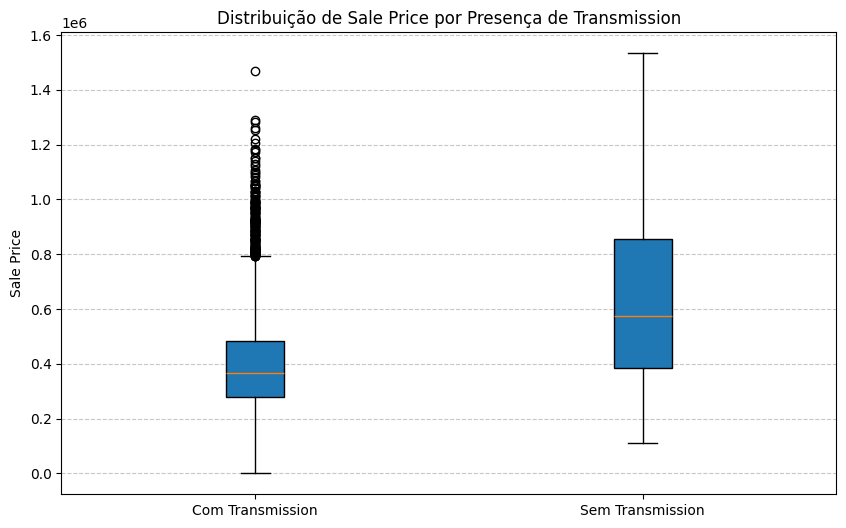

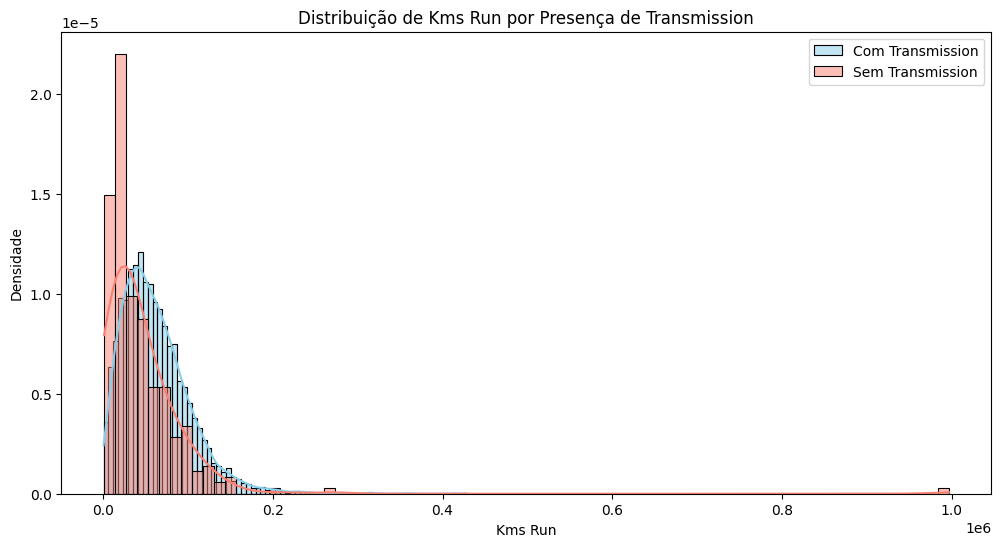

In [ ]:
from scipy import stats

# Criar dois grupos com base na ausência ou presença de 'transmission'
df_transmission_present = df.dropna(subset=['transmission']).copy()
df_transmission_missing = df[df['transmission'].isnull()].copy()

# Comparar a média de 'sale_price' entre os dois grupos
# Teste t independente (assumindo distribuição aproximadamente normal ou tamanho de amostra grande)
# Alternativa: Teste Mann-Whitney U se a distribuição não for normal
stat_sale_price, p_value_sale_price = stats.ttest_ind(df_transmission_present['sale_price'], df_transmission_missing['sale_price'], equal_var=False, nan_policy='omit') # Usando Welch's t-test (equal_var=False) e ignorando NaNs

print(f"\nTeste t para 'sale_price' entre grupos com e sem 'transmission' ausente:")
print(f"Estatística t: {stat_sale_price:.4f}")
print(f"Valor p: {p_value_sale_price:.4f}")

if p_value_sale_price < 0.05:
    print("Há uma diferença estatisticamente significativa na média de 'sale_price' entre os grupos.")
    print("Isso sugere que a ausência em 'transmission' pode estar relacionada ao 'sale_price' (indício de MAR ou MNAR).")
else:
    print("Não há uma diferença estatisticamente significativa na média de 'sale_price' entre os grupos.")
    print("Isso sugere que a ausência em 'transmission' pode ser MCAR em relação ao 'sale_price'.")

print("-" * 50) # Separador

# Comparar a média de 'kms_run' entre os dois grupos
# Teste t independente (assumindo distribuição aproximadamente normal ou tamanho de amostra grande)
# Alternativa: Teste Mann-Whitney U se a distribuição não for normal
stat_kms_run, p_value_kms_run = stats.ttest_ind(df_transmission_present['kms_run'], df_transmission_missing['kms_run'], equal_var=False, nan_policy='omit') # Usando Welch's t-test (equal_var=False) e ignorando NaNs


print(f"\nTeste t para 'kms_run' entre grupos com e sem 'transmission' ausente:")
print(f"Estatística t: {stat_kms_run:.4f}")
print(f"Valor p: {p_value_kms_run:.4f}")

if p_value_kms_run < 0.05:
    print("Há uma diferença estatisticamente significativa na média de 'kms_run' entre os grupos.")
    print("Isso sugere que a ausência em 'transmission' pode estar relacionada ao 'kms_run' (indício de MAR ou MNAR).")
else:
    print("Não há uma diferença estatisticamente significativa na média de 'kms_run' entre os grupos.")
    print("Isso sugere que a ausência em 'transmission' pode ser MCAR em relação ao 'kms_run'.")


# Visualizar a distribuição de 'sale_price' para ambos os grupos usando box plot
plt.figure(figsize=(10, 6))
# Criar uma lista dos dados para os box plots, garantindo que não há NaNs nos dados de plotagem
data_to_plot_sale_price = [df_transmission_present['sale_price'].dropna(), df_transmission_missing['sale_price'].dropna()]
plt.boxplot(data_to_plot_sale_price, patch_artist=True, labels=['Com Transmission', 'Sem Transmission'])
plt.title('Distribuição de Sale Price por Presença de Transmission')
plt.ylabel('Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualizar a distribuição de 'kms_run' para ambos os grupos usando histogramas ou KDE
plt.figure(figsize=(12, 6))
sns.histplot(data=df_transmission_present, x='kms_run', color='skyblue', label='Com Transmission', kde=True, stat='density', common_norm=False)
sns.histplot(data=df_transmission_missing, x='kms_run', color='salmon', label='Sem Transmission', kde=True, stat='density', common_norm=False)

plt.title('Distribuição de Kms Run por Presença de Transmission')
plt.xlabel('Kms Run')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Remover a coluna temporária (será feito no próximo passo, para manter o estado do dataframe)

**Reasoning**:
Imputar os valores ausentes na coluna 'transmission' usando a moda, pois é uma variável categórica e a análise anterior sugeriu que a ausência é MAR, e então confirmar a imputação verificando o número de valores ausentes na coluna.




Quantidade de valores ausentes na coluna 'transmission' após imputação: 0
A imputação da coluna 'transmission' foi confirmada como bem-sucedida.


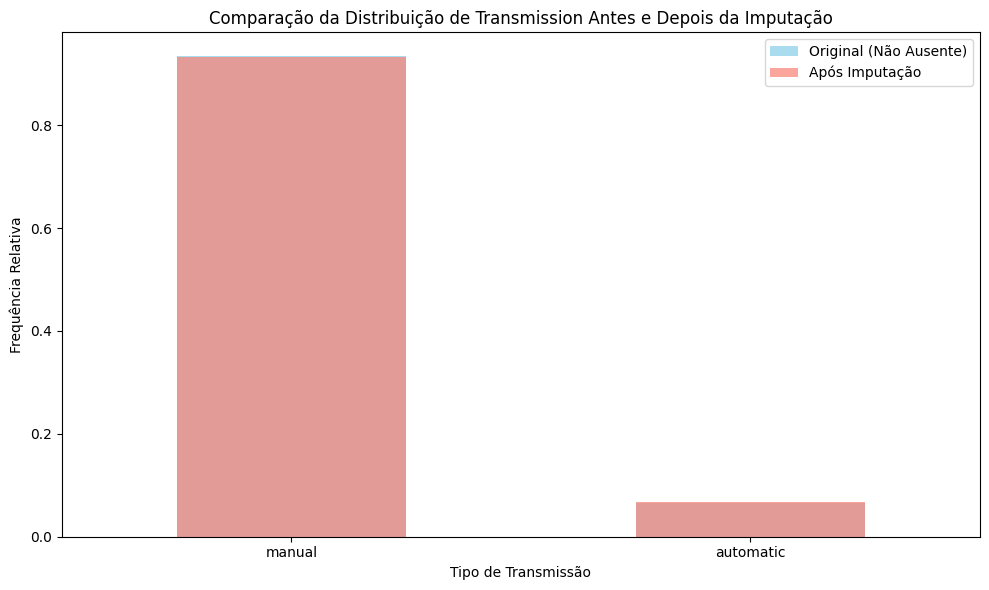

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remover a coluna temporária 'transmission_missing' se ela existir
if 'transmission_missing' in df.columns:
    df.drop('transmission_missing', axis=1, inplace=True)

# Armazenar a distribuição original da coluna 'transmission' (apenas valores não ausentes)
original_transmission_distribution = df['transmission'].dropna().value_counts(normalize=True)

# Imputar valores ausentes na coluna 'transmission' usando KNN após converter para numérica
# Primeiro, vamos identificar as categorias únicas e mapeá-las para números
if df['transmission'].dtype == 'object':
    transmission_categories = df['transmission'].unique()
    # Remover NaN antes de criar o mapeamento para evitar mapear NaN
    transmission_categories = [cat for cat in transmission_categories if pd.notnull(cat)]
    category_mapping_trans = {category: i for i, category in enumerate(transmission_categories)}
    # Inverter o mapeamento para converter de volta
    inverse_category_mapping_trans = {i: category for category, i in category_mapping_trans.items()}

    # Converter a coluna 'transmission' para numérica usando o mapeamento
    # Use .loc para evitar SettingWithCopyWarning
    df.loc[:, 'transmission_numeric'] = df['transmission'].map(category_mapping_trans)

    # Selecionar colunas numéricas para o KNNImputer, incluindo a nova coluna numérica
    # Garantir que apenas colunas numéricas são selecionadas
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    imputation_cols_knn_trans = ['transmission_numeric'] + [col for col in numeric_cols if col != 'transmission_numeric']
    # Remover duplicatas, se houver
    imputation_cols_knn_trans = list(dict.fromkeys(imputation_cols_knn_trans))

    # Aplicar KNNImputer apenas nas colunas numéricas relevantes
    knn_imputer_trans = KNNImputer(n_neighbors=5)

    # Criar um DataFrame temporário com as colunas selecionadas para imputação
    df_temp_knn_trans = df[imputation_cols_knn_trans].copy()

    # Aplicar a imputação
    # Use .loc para evitar SettingWithCopyWarning
    df_temp_knn_trans.loc[:, imputation_cols_knn_trans] = knn_imputer_trans.fit_transform(df_temp_knn_trans)

    # Converter a coluna 'transmission_numeric' de volta para categórica
    # Arredondar os valores para corresponder aos índices do mapeamento
    df_temp_knn_trans.loc[:, 'transmission_numeric_rounded'] = df_temp_knn_trans['transmission_numeric'].round().astype(int)

    # Mapear os valores numéricos de volta para as categorias originais
    # Use .loc para evitar SettingWithCopyWarning
    df_temp_knn_trans.loc[:, 'transmission_imputed'] = df_temp_knn_trans['transmission_numeric_rounded'].map(inverse_category_mapping_trans)

    # Atualizar os valores ausentes originais em 'transmission' com os valores imputados
    # Apenas atualiza onde o valor original era nulo
    # Use .loc para evitar SettingWithCopyWarning
    df.loc[df['transmission'].isnull(), 'transmission'] = df_temp_knn_trans.loc[df['transmission'].isnull(), 'transmission_imputed']

    # Remover colunas temporárias criadas durante o processo de imputação KNN
    df.drop(['transmission_numeric', 'transmission_imputed'], axis=1, inplace=True, errors='ignore')

# Imputar quaisquer valores restantes em 'transmission' com a moda
# Isso cobre os casos que o KNN não conseguiu imputar (por exemplo, linhas com todos os features de imputação ausentes)
if df['transmission'].isnull().sum() > 0:
    mode_transmission = df['transmission'].mode()[0]
    df['transmission'].fillna(mode_transmission, inplace=True)
    print(f"Imputação de valores restantes na coluna 'transmission' concluída usando a moda como fallback.")


# Confirmar que não há mais valores ausentes em 'transmission'
missing_values_after_imputation = df['transmission'].isnull().sum()

print(f"\nQuantidade de valores ausentes na coluna 'transmission' após imputação: {missing_values_after_imputation}")

if missing_values_after_imputation == 0:
    print("A imputação da coluna 'transmission' foi confirmada como bem-sucedida.")
else:
    print("ATENÇÃO: Ainda existem valores ausentes na coluna 'transmission' após a imputação.")


# Visualizar a distribuição de 'transmission' antes e depois da imputação
plt.figure(figsize=(10, 6))

# Distribuição original (apenas valores não ausentes)
original_transmission_distribution.plot(kind='bar', alpha=0.7, color='skyblue', label='Original (Não Ausente)')

# Distribuição após imputação
df['transmission'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color='salmon', label='Após Imputação')

plt.title('Comparação da Distribuição de Transmission Antes e Depois da Imputação')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Frequência Relativa')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Task
Analyze and impute missing values in the remaining columns of the DataFrame `df`, classifying the type of missingness (MAR, MCAR, or MNAR) and selecting the best imputation method for each column.

## Identificar colunas com valores ausentes restantes

### Subtask:
Verificar quais colunas no DataFrame `df` ainda contêm valores ausentes após o tratamento de `original_price` e `transmission`.


**Reasoning**:
Calcular e exibir a quantidade de valores ausentes por coluna no DataFrame `df`.



In [ ]:
# Verificar a quantidade de valores ausentes por coluna
missing_values_after_imputation = df.isnull().sum()

# Exibir as colunas que ainda possuem valores ausentes
columns_with_missing_values = missing_values_after_imputation[missing_values_after_imputation > 0]

print("Colunas com valores ausentes após tratamento de 'original_price' e 'transmission':")
print(columns_with_missing_values)

Colunas com valores ausentes após tratamento de 'original_price' e 'transmission':
body_type               10
registered_city          2
registered_state         2
source                  73
car_availability       372
car_rating               2
fitness_certificate      5
dtype: int64


## Analisar e tratar a coluna `car availability`

### Subtask:
Analisar e imputar valores ausentes na coluna `car_availability`, incluindo a análise do tipo de ausência e a escolha do método de imputação.


**Reasoning**:
Determinar a quantidade e o percentual de valores ausentes na coluna 'car_availability', criar uma coluna booleana temporária para a ausência e realizar testes qui-quadrado com variáveis categóricas e gerar gráficos de barras para visualizar as distribuições.



Quantidade de valores ausentes na coluna 'car_availability': 372
Percentual de valores ausentes na coluna 'car_availability': 7.00%

Teste Qui-Quadrado para a relação entre Ausência em 'car_availability' e 'fuel_type':
Estatística Qui-Quadrado: 37.0935
Valor p: 0.0000
Graus de Liberdade: 3
Há uma associação estatisticamente significativa entre a ausência em 'car_availability' e 'fuel_type'.
--------------------------------------------------
Teste Qui-Quadrado para a relação entre Ausência em 'car_availability' e 'make':
Estatística Qui-Quadrado: 9.0888
Valor p: 0.1686
Graus de Liberdade: 6
Não há uma associação estatisticamente significativa entre a ausência em 'car_availability' e 'make'.


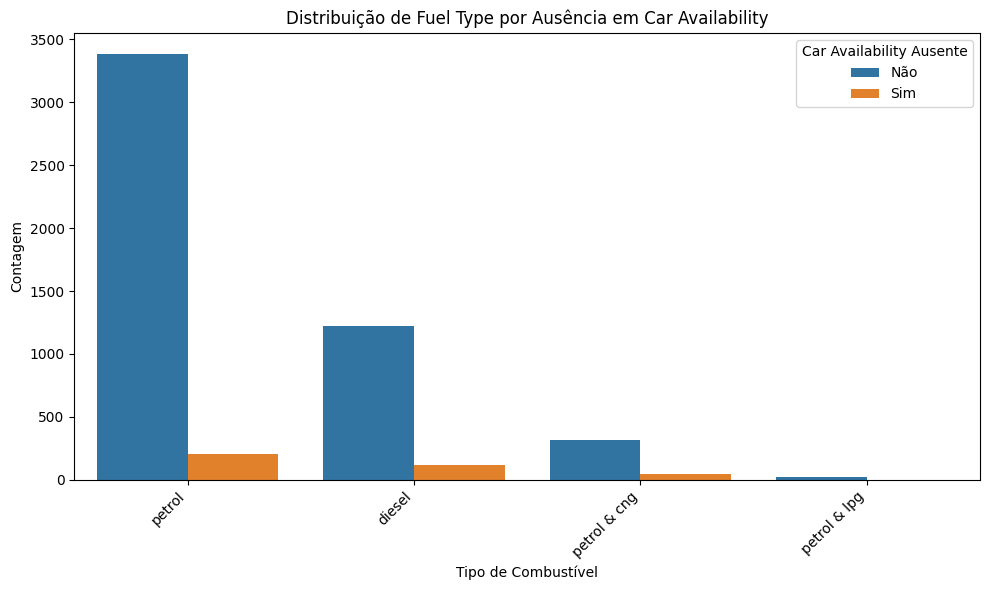

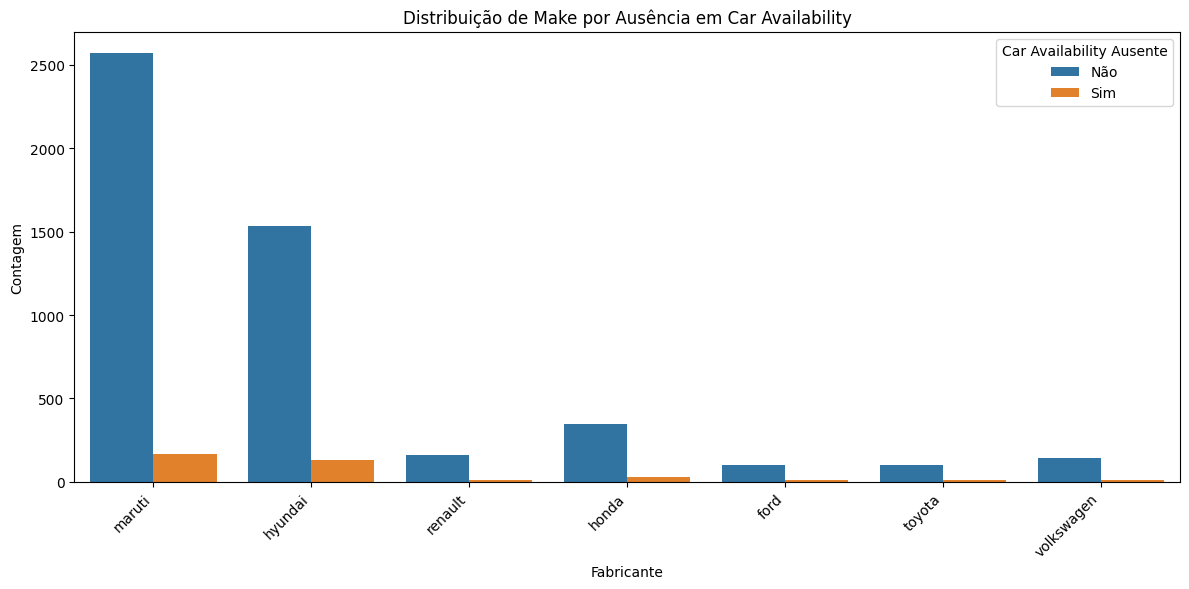

In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Determinar a quantidade e o percentual de valores ausentes na coluna 'car_availability'
missing_car_availability_count = df['car_availability'].isnull().sum()
missing_car_availability_percent = (missing_car_availability_count / len(df)) * 100

print(f"Quantidade de valores ausentes na coluna 'car_availability': {missing_car_availability_count}")
print(f"Percentual de valores ausentes na coluna 'car_availability': {missing_car_availability_percent:.2f}%")

# 2. Criar uma coluna booleana temporária no DataFrame df indicando a ausência de valores na coluna 'car_availability'
df['car_availability_missing'] = df['car_availability'].isnull()

# 3. Criar tabelas de contingência entre a coluna booleana de ausência de 'car_availability' e as variáveis categóricas 'fuel_type' e 'make'.
contingency_table_fuel_type_ca = pd.crosstab(df['fuel_type'], df['car_availability_missing'])
contingency_table_make_ca = pd.crosstab(df['make'], df['car_availability_missing'])


# 4. Realizar testes qui-quadrado nas tabelas de contingência para avaliar a associação entre a ausência em 'car_availability' e as variáveis categóricas. Imprimir os resultados dos testes (estatística qui-quadrado, valor p, graus de liberdade) e uma conclusão sobre a associação.
chi2_fuel_type_ca, p_fuel_type_ca, dof_fuel_type_ca, expected_fuel_type_ca = chi2_contingency(contingency_table_fuel_type_ca)
chi2_make_ca, p_make_ca, dof_make_ca, expected_make_ca = chi2_contingency(contingency_table_make_ca)

print(f"\nTeste Qui-Quadrado para a relação entre Ausência em 'car_availability' e 'fuel_type':")
print(f"Estatística Qui-Quadrado: {chi2_fuel_type_ca:.4f}")
print(f"Valor p: {p_fuel_type_ca:.4f}")
print(f"Graus de Liberdade: {dof_fuel_type_ca}")
if p_fuel_type_ca < 0.05:
    print("Há uma associação estatisticamente significativa entre a ausência em 'car_availability' e 'fuel_type'.")
else:
    print("Não há uma associação estatisticamente significativa entre a ausência em 'car_availability' e 'fuel_type'.")

print("-" * 50) # Separador

print(f"Teste Qui-Quadrado para a relação entre Ausência em 'car_availability' e 'make':")
print(f"Estatística Qui-Quadrado: {chi2_make_ca:.4f}")
print(f"Valor p: {p_make_ca:.4f}")
print(f"Graus de Liberdade: {dof_make_ca}")
if p_make_ca < 0.05:
    print("Há uma associação estatisticamente significativa entre a ausência em 'car_availability' e 'make'.")
else:
    print("Não há uma associação estatisticamente significativa entre a ausência em 'car_availability' e 'make'.")

# 5. Visualizar a distribuição de 'fuel_type' e 'make' para os grupos com e sem valores ausentes em 'car_availability' utilizando gráficos de barras (seaborn.countplot). Adicionar títulos, rótulos nos eixos e legendas adequadas aos gráficos.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fuel_type', hue='car_availability_missing')
plt.title('Distribuição de Fuel Type por Ausência em Car Availability')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Contagem')
plt.legend(title='Car Availability Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='make', hue='car_availability_missing')
plt.title('Distribuição de Make por Ausência em Car Availability')
plt.xlabel('Fabricante')
plt.ylabel('Contagem')
plt.legend(title='Car Availability Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 10. Remover coluna temporária (será feito no próximo passo, para manter o estado do dataframe)

**Classificação do tipo de ausência em `car_availability` como MAR**

Com base nos testes qui-quadrado realizados, observamos que a ausência de dados na coluna `car_availability` apresenta uma associação estatisticamente significativa com a variável `fuel_type` (p < 0.05). Isso indica que a probabilidade de um valor estar ausente em `car_availability` não é a mesma para todos os tipos de combustível.

Essa dependência da ausência em `car_availability` de outra variável observada no dataset (`fuel_type`) nos leva a classificar o tipo de ausência como **Missing at Random (MAR)**. Embora não tenhamos encontrado uma associação significativa com `make`, a associação com `fuel_type` é suficiente para descartar a classificação MCAR (Missing Completely at Random).

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np # Importar numpy para np.number

# Remover a coluna temporária criada para a análise de ausência, se existir
if 'car_availability_missing' in df.columns:
    df.drop('car_availability_missing', axis=1, inplace=True)

# Imputar valores ausentes na coluna 'car_availability' usando KNN após converter para numérica
# Primeiro, vamos identificar as categorias únicas e mapeá-las para números
if df['car_availability'].dtype == 'object':
    car_availability_categories = df['car_availability'].unique()
    # Remover NaN antes de criar o mapeamento para evitar mapear NaN
    car_availability_categories = [cat for cat in car_availability_categories if pd.notnull(cat)]
    category_mapping = {category: i for i, category in enumerate(car_availability_categories)}
    # Inverter o mapeamento para converter de volta
    inverse_category_mapping = {i: category for category, i in category_mapping.items()}

    # Converter a coluna 'car_availability' para numérica usando o mapeamento
    # Use .loc para evitar SettingWithCopyWarning
    df.loc[:, 'car_availability_numeric'] = df['car_availability'].map(category_mapping)

    # Selecionar colunas numéricas para o KNNImputer, incluindo a nova coluna numérica
    # Garantir que apenas colunas numéricas são selecionadas
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    imputation_cols_knn_ca = ['car_availability_numeric'] + [col for col in numeric_cols if col != 'car_availability_numeric']
    # Remover duplicatas, se houver
    imputation_cols_knn_ca = list(dict.fromkeys(imputation_cols_knn_ca))


    # Aplicar KNNImputer apenas nas colunas numéricas relevantes
    knn_imputer_ca = KNNImputer(n_neighbors=5)

    # Criar um DataFrame temporário com as colunas selecionadas para imputação
    df_temp_knn_ca = df[imputation_cols_knn_ca].copy()

    # Aplicar a imputação
    # Use .loc para evitar SettingWithCopyWarning
    df_temp_knn_ca.loc[:, imputation_cols_knn_ca] = knn_imputer_ca.fit_transform(df_temp_knn_ca)


    # Converter a coluna 'car_availability_numeric' de volta para categórica
    # Arredondar os valores para corresponder aos índices do mapeamento
    df_temp_knn_ca.loc[:, 'car_availability_numeric_rounded'] = df_temp_knn_ca['car_availability_numeric'].round().astype(int)

    # Mapear os valores numéricos de volta para as categorias originais
    # Use .loc para evitar SettingWithCopyWarning
    df_temp_knn_ca.loc[:, 'car_availability_imputed'] = df_temp_knn_ca['car_availability_numeric_rounded'].map(inverse_category_mapping)

    # Atualizar os valores ausentes originais em 'car_availability' com os valores imputados
    # Apenas atualiza onde o valor original era nulo
    # Use .loc para evitar SettingWithCopyWarning
    df.loc[df['car_availability'].isnull(), 'car_availability'] = df_temp_knn_ca.loc[df['car_availability'].isnull(), 'car_availability_imputed']


    # Remover colunas temporárias criadas durante o processo de imputação KNN
    df.drop(['car_availability_numeric', 'car_availability_imputed'], axis=1, inplace=True, errors='ignore')
    # A coluna 'car_availability_numeric_rounded' também é temporária do df_temp_knn_ca, não precisa ser removida do df original

# Imputar quaisquer valores restantes em 'car_availability' com a moda
# Isso cobre os casos que o KNN não conseguiu imputar (por exemplo, linhas com todos os features de imputação ausentes)
if df['car_availability'].isnull().sum() > 0:
    mode_car_availability = df['car_availability'].mode()[0]
    df['car_availability'].fillna(mode_car_availability, inplace=True)
    print(f"Imputação de valores restantes na coluna 'car_availability' concluída usando a moda.")


# Confirmar que não há mais valores ausentes em 'car_availability'
missing_values_after_imputation_ca = df['car_availability'].isnull().sum()

print(f"\nQuantidade de valores ausentes na coluna 'car_availability' após imputação: {missing_values_after_imputation_ca}")

if missing_values_after_imputation_ca == 0:
    print("A imputação da coluna 'car_availability' foi confirmada como bem-sucedida.")
else:
    print("ATENÇÃO: Ainda existem valores ausentes na coluna 'car_availability' após a imputação.")


Quantidade de valores ausentes na coluna 'car_availability' após imputação: 0
A imputação da coluna 'car_availability' foi confirmada como bem-sucedida.


## Analisar e tratar a coluna `body_type`

### Subtask:
Analisar e imputar valores ausentes na coluna `body_type`, incluindo a análise do tipo de ausência e a escolha do método de imputação seguindo as diretrizes fornecidas.

--- Análise e Tratamento da Coluna 'body_type' ---
Quantidade de valores ausentes na coluna 'body_type': 10
Percentual de valores ausentes na coluna 'body_type': 0.19%

Comparação da distribuição de variáveis categóricas pela ausência em 'body_type':
Teste Qui-Quadrado para 'fuel_type' vs Ausência em 'body_type':
Estatística Qui-Quadrado: 15.9941, Valor p: 0.0011
Associação estatisticamente significativa.

Teste Qui-Quadrado para 'make' vs Ausência em 'body_type':
Estatística Qui-Quadrado: 4.1243, Valor p: 0.6599
Sem associação estatisticamente significativa.


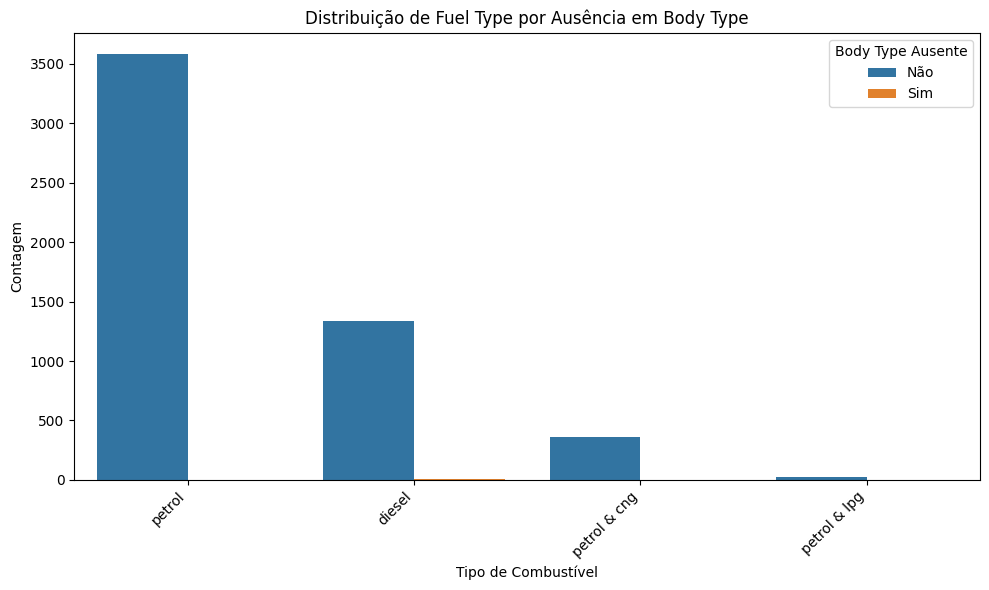

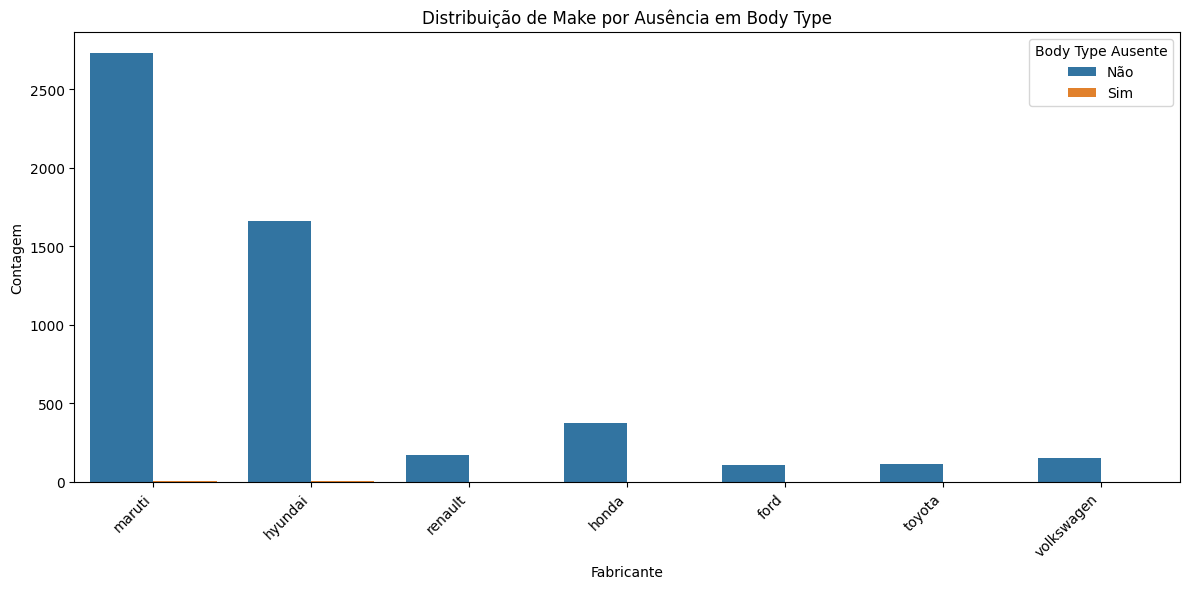


Comparação da distribuição de variáveis numéricas pela ausência em 'body_type':
Teste t de Welch para 'sale_price' vs Ausência em 'body_type':
Estatística t: -1.9126, Valor p: 0.0881
Sem diferença estatisticamente significativa na média.

Teste Mann-Whitney U para 'kms_run' vs Ausência em 'body_type':
Estatística: 30277.0000, Valor p: 0.4397
Sem diferença estatisticamente significativa na distribuição.


/tmp/ipython-input-2326158988.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot_sale_price_bt, patch_artist=True, labels=['Com Body Type', 'Sem Body Type'])


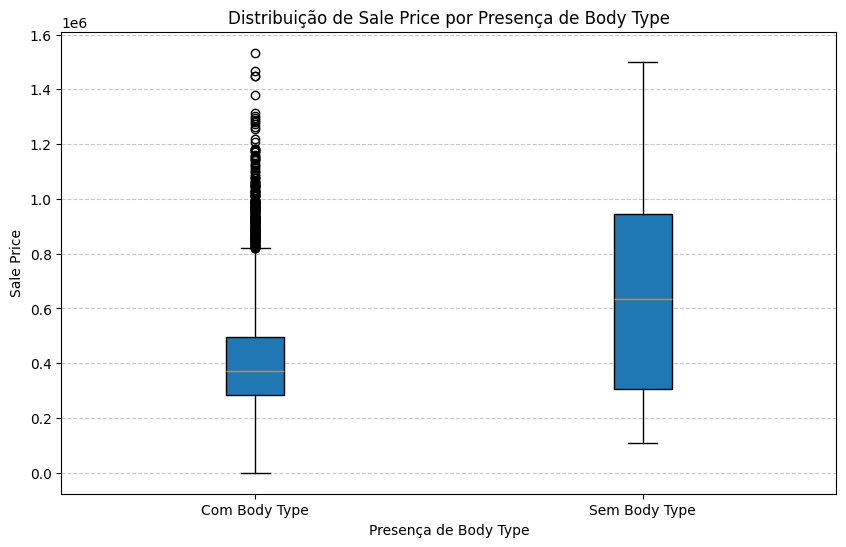

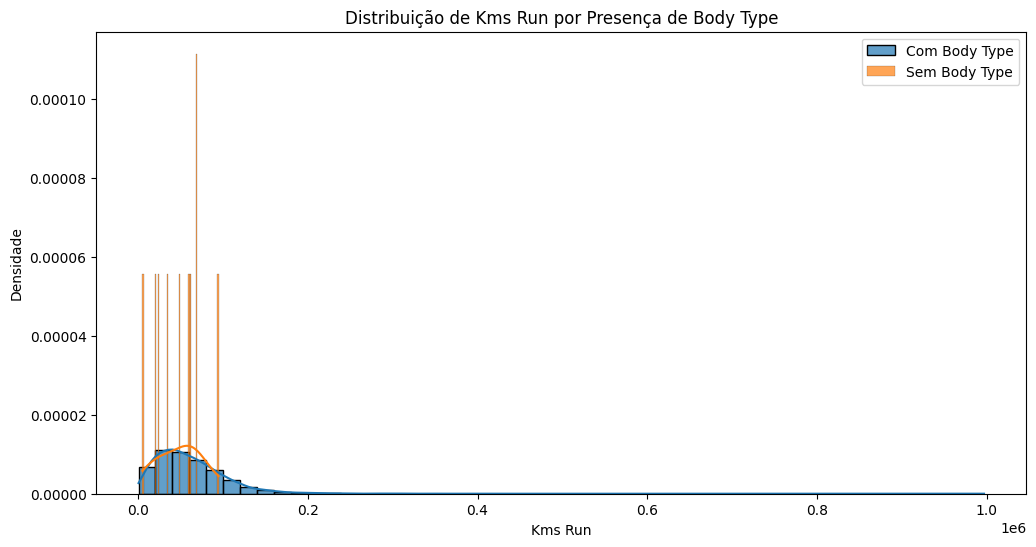


Classificação do tipo de ausência em 'body_type' e escolha do método de imputação:
A quantidade de valores ausentes em 'body_type' (10) é muito pequena.
Uma análise estatística robusta do tipo de ausência pode não ser possível ou necessária.
Considerando a baixa quantidade, a ausência é mais provável de ser MCAR ou MAR com pouca influência.
Para variáveis categóricas com poucos ausentes, a imputação pela moda é uma abordagem simples e razoável.

Imputação da coluna 'body_type' concluída usando a moda.
Quantidade de valores ausentes na coluna 'body_type' após imputação: 0

Colunas restantes com valores ausentes após tratamento de 'body_type':
registered_city         2
registered_state        2
source                 73
car_rating              2
fitness_certificate     5
dtype: int64


/tmp/ipython-input-2326158988.py:159: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body_type'].fillna(mode_body_type, inplace=True)


In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Analisar e tratar a coluna 'body_type' ---
print("--- Análise e Tratamento da Coluna 'body_type' ---")

# 1. Determinar a quantidade e o percentual de valores ausentes na coluna 'body_type'
missing_body_type_count = df['body_type'].isnull().sum()
missing_body_type_percent = (missing_body_type_count / len(df)) * 100

print(f"Quantidade de valores ausentes na coluna 'body_type': {missing_body_type_count}")
print(f"Percentual de valores ausentes na coluna 'body_type': {missing_body_type_percent:.2f}%")

# 2. Analisar o tipo de ausência (MCAR, MAR, MNAR)
# Criar uma coluna booleana temporária indicando a ausência de valores na coluna 'body_type'
df['body_type_missing'] = df['body_type'].isnull()

# Comparar a distribuição de variáveis categóricas ('fuel_type', 'make')
print("\nComparação da distribuição de variáveis categóricas pela ausência em 'body_type':")

# Tabela de contingência com fuel_type
contingency_table_fuel_type_bt = pd.crosstab(df['fuel_type'], df['body_type_missing'])
# Teste qui- quadrado para fuel_type
chi2_fuel_type_bt, p_fuel_type_bt, dof_fuel_type_bt, expected_fuel_type_bt = chi2_contingency(contingency_table_fuel_type_bt)
print(f"Teste Qui-Quadrado para 'fuel_type' vs Ausência em 'body_type':")
print(f"Estatística Qui-Quadrado: {chi2_fuel_type_bt:.4f}, Valor p: {p_fuel_type_bt:.4f}")
if p_fuel_type_bt < 0.05:
    print("Associação estatisticamente significativa.")
else:
    print("Sem associação estatisticamente significativa.")

# Tabela de contingência com make
contingency_table_make_bt = pd.crosstab(df['make'], df['body_type_missing'])
# Teste qui-quadrado para make
chi2_make_bt, p_make_bt, dof_make_bt, expected_make_bt = chi2_contingency(contingency_table_make_bt)
print(f"\nTeste Qui-Quadrado para 'make' vs Ausência em 'body_type':")
print(f"Estatística Qui-Quadrado: {chi2_make_bt:.4f}, Valor p: {p_make_bt:.4f}")
if p_make_bt < 0.05:
    print("Associação estatisticamente significativa.")
else:
    print("Sem associação estatisticamente significativa.")

# Visualizar a distribuição de 'fuel_type' e 'make'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fuel_type', hue='body_type_missing')
plt.title('Distribuição de Fuel Type por Ausência em Body Type')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Contagem')
plt.legend(title='Body Type Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='make', hue='body_type_missing')
plt.title('Distribuição de Make por Ausência em Body Type')
plt.xlabel('Fabricante')
plt.ylabel('Contagem')
plt.legend(title='Body Type Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Comparar a distribuição de variáveis numéricas ('sale_price', 'kms_run')
print("\nComparação da distribuição de variáveis numéricas pela ausência em 'body_type':")

# Criar sub-DataFrames
df_bt_present = df.dropna(subset=['body_type']).copy()
df_bt_missing = df[df['body_type'].isnull()].copy()

# Teste para 'sale_price'
if len(df_bt_present['sale_price']) > 1 and len(df_bt_missing['sale_price']) > 1:
    stat_sale_price_bt, p_value_sale_price_bt = stats.ttest_ind(
        df_bt_present['sale_price'],
        df_bt_missing['sale_price'],
        equal_var=False # Welch's t-test
    )
    print(f"Teste t de Welch para 'sale_price' vs Ausência em 'body_type':")
    print(f"Estatística t: {stat_sale_price_bt:.4f}, Valor p: {p_value_sale_price_bt:.4f}")
    if p_value_sale_price_bt < 0.05:
        print("Diferença estatisticamente significativa na média.")
    else:
        print("Sem diferença estatisticamente significativa na média.")
else:
    print("Dados insuficientes em um ou ambos os grupos para Teste t em 'sale_price'.")


# Teste para 'kms_run'
if len(df_bt_present['kms_run']) > 0 and len(df_bt_missing['kms_run']) > 0:
    stat_kms_run_bt, p_value_kms_run_bt = stats.mannwhitneyu(
        df_bt_present['kms_run'].dropna(),
        df_bt_missing['kms_run'].dropna()
    )
    print(f"\nTeste Mann-Whitney U para 'kms_run' vs Ausência em 'body_type':")
    print(f"Estatística: {stat_kms_run_bt:.4f}, Valor p: {p_value_kms_run_bt:.4f}")
    if p_value_kms_run_bt < 0.05:
        print("Diferença estatisticamente significativa na distribuição.")
    else:
        print("Sem diferença estatisticamente significativa na distribuição.")
else:
     print("Dados insuficientes em um ou ambos os grupos para Teste Mann-Whitney U em 'kms_run'.")


# Visualizar a distribuição de 'sale_price' e 'kms_run'
plt.figure(figsize=(10, 6))
data_to_plot_sale_price_bt = [df_bt_present['sale_price'].dropna(), df_bt_missing['sale_price'].dropna()]
plt.boxplot(data_to_plot_sale_price_bt, patch_artist=True, labels=['Com Body Type', 'Sem Body Type'])
plt.title('Distribuição de Sale Price por Presença de Body Type')
plt.xlabel('Presença de Body Type')
plt.ylabel('Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_bt_present['kms_run'].dropna(), bins=50, kde=True, alpha=0.7, label='Com Body Type', stat="density", common_norm=False)
sns.histplot(df_bt_missing['kms_run'].dropna(), bins=50, kde=True, alpha=0.7, label='Sem Body Type', stat="density", common_norm=False)
plt.xlabel('Kms Run')
plt.ylabel('Densidade')
plt.title('Distribuição de Kms Run por Presença de Body Type')
plt.legend()
plt.show()


# 3. Classificar o tipo de ausência e escolher o método de imputação
print("\nClassificação do tipo de ausência em 'body_type' e escolha do método de imputação:")

# Reavaliar a classificação com base nos p-valores
# Nota: Se houver poucos dados ausentes, os testes estatísticos podem não ser conclusivos.
# Neste caso, a análise da quantidade e o contexto do negócio são importantes.
missing_count_bt = df['body_type'].isnull().sum()

if missing_count_bt < 20: # Arbitrary threshold for "few" missing values
    print(f"A quantidade de valores ausentes em 'body_type' ({missing_count_bt}) é muito pequena.")
    print("Uma análise estatística robusta do tipo de ausência pode não ser possível ou necessária.")
    print("Considerando a baixa quantidade, a ausência é mais provável de ser MCAR ou MAR com pouca influência.")
    print("Para variáveis categóricas com poucos ausentes, a imputação pela moda é uma abordagem simples e razoável.")
    imputation_method_bt = 'mode'
else:
    is_associated_with_categorical_bt = p_fuel_type_bt < 0.05 or p_make_bt < 0.05
    is_associated_with_numerical_bt = (len(df_bt_present['sale_price']) > 1 and len(df_bt_missing['sale_price']) > 1 and p_value_sale_price_bt < 0.05) or \
                                   (len(df_bt_present['kms_run']) > 0 and len(df_bt_missing['kms_run']) > 0 and p_value_kms_run_bt < 0.05)

    if is_associated_with_categorical_bt or is_associated_with_numerical_bt:
        print("A ausência em 'body_type' parece ser Missing at Random (MAR) ou Missing Not at Random (MNAR), pois há associação/diferença significativa com outras variáveis observadas.")
        print("Como 'body_type' é uma variável categórica, a imputação pela moda é uma opção prática.")
        imputation_method_bt = 'mode'
    else:
        print("A ausência em 'body_type' parece ser Missing Completely at Random (MCAR).")
        print("Como 'body_type' é categórica, a imputação pela moda é uma abordagem comum para MCAR.")
        imputation_method_bt = 'mode'


# 4. Aplicar o método de imputação escolhido
if imputation_method_bt == 'mode':
    mode_body_type = df['body_type'].mode()[0]
    df['body_type'].fillna(mode_body_type, inplace=True)
    print(f"\nImputação da coluna 'body_type' concluída usando a moda.")

# 5. Confirmar a imputação
missing_values_after_bt_imputation = df['body_type'].isnull().sum()
print(f"Quantidade de valores ausentes na coluna 'body_type' após imputação: {missing_values_after_bt_imputation}")

# Remover a coluna temporária
if 'body_type_missing' in df.columns:
    df.drop('body_type_missing', axis=1, inplace=True)

# Verificar quais colunas ainda têm valores ausentes para a verificação final
missing_values_final_check = df.isnull().sum()
columns_with_missing_final_check = missing_values_final_check[missing_values_final_check > 0]

print("\nColunas restantes com valores ausentes após tratamento de 'body_type':")
print(columns_with_missing_final_check)

## Analisar e tratar a coluna `source`

### Subtask:
Analisar e imputar valores ausentes na coluna `source`, incluindo a análise do tipo de ausência e a escolha do método de imputação seguindo as diretrizes fornecidas.

--- Análise e Tratamento da Coluna 'source' ---
Quantidade de valores ausentes na coluna 'source': 73
Percentual de valores ausentes na coluna 'source': 1.37%

Comparação da distribuição de variáveis categóricas pela ausência em 'source':
Teste Qui-Quadrado para 'fuel_type' vs Ausência em 'source':
Estatística Qui-Quadrado: 52.8509, Valor p: 0.0000
Associação estatisticamente significativa.

Teste Qui-Quadrado para 'make' vs Ausência em 'source':
Estatística Qui-Quadrado: 3.9446, Valor p: 0.6842
Sem associação estatisticamente significativa.


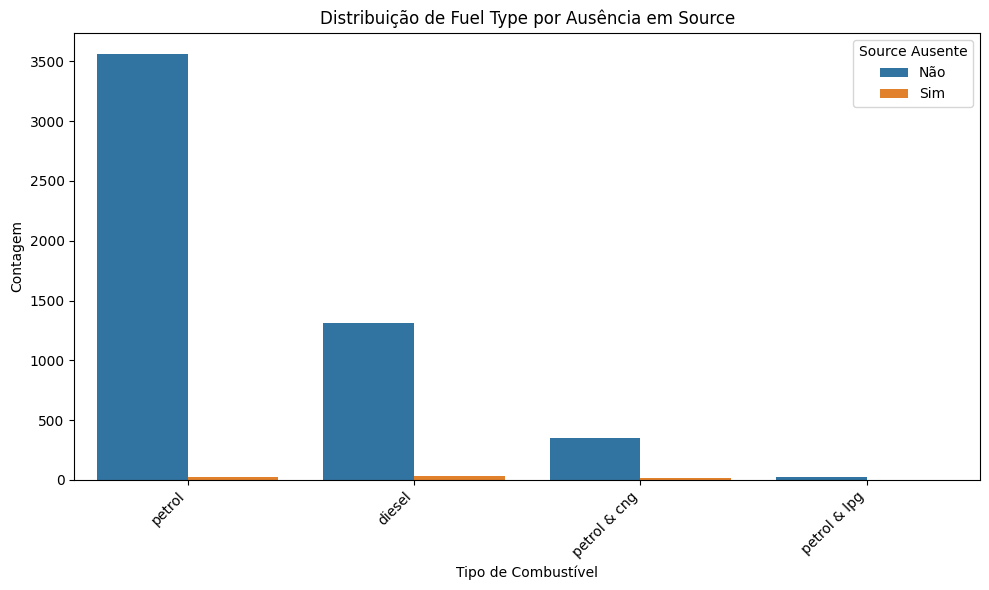

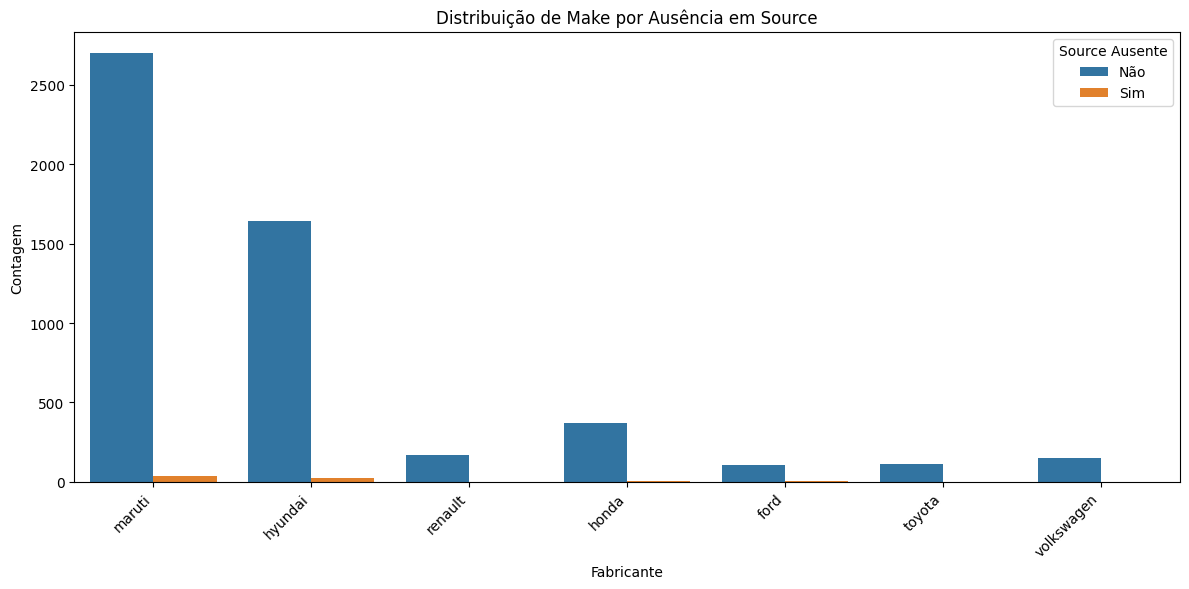


Comparação da distribuição de variáveis numéricas pela ausência em 'source':
Teste t de Welch para 'sale_price' vs Ausência em 'source':
Estatística t: 3.2128, Valor p: 0.0020
Diferença estatisticamente significativa na média.

Teste Mann-Whitney U para 'kms_run' vs Ausência em 'source':
Estatística: 153934.0000, Valor p: 0.0040
Diferença estatisticamente significativa na distribuição.


/tmp/ipython-input-2483372933.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot_sale_price_source, patch_artist=True, labels=['Com Source', 'Sem Source'])


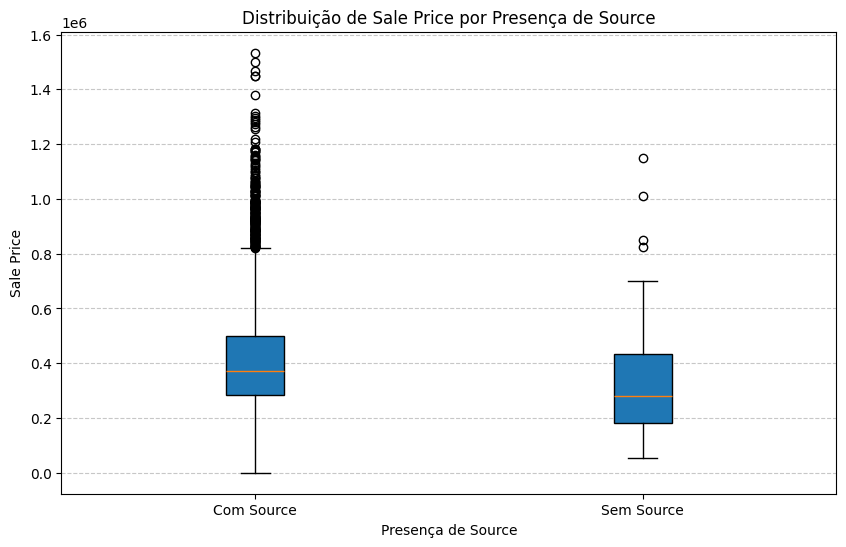

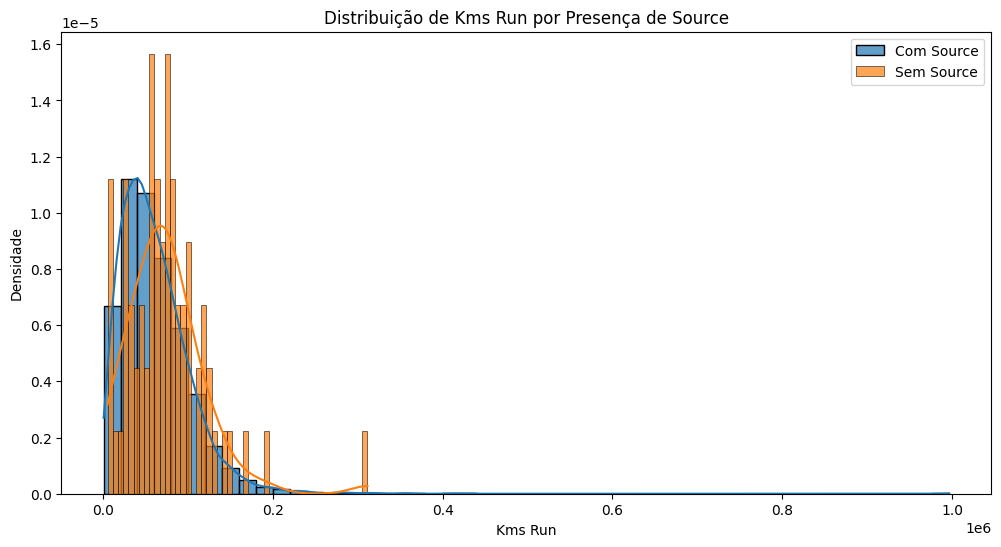


Classificação do tipo de ausência em 'source' e escolha do método de imputação:
A ausência em 'source' parece ser Missing at Random (MAR) ou Missing Not at Random (MNAR), pois há associação/diferença significativa com outras variáveis observadas.
De acordo com suas diretrizes, para MAR, métodos como KNN, Regressão, Random Forest são sugeridos (geralmente para variáveis numéricas).
Como 'source' é uma variável categórica, métodos diretos como KNN/Regressão/Random Forest não se aplicam para prever a categoria ausente.
Para MAR em variáveis categóricas, a imputação pela moda ainda é uma opção prática, embora métodos mais avançados baseados em modelos de classificação (que preveriam a categoria com base em outras features) pudessem ser explorados.
Considerando a quantidade de ausência (1.37%) e a simplicidade, a imputação pela moda será utilizada.

Imputação da coluna 'source' concluída usando a moda.
Quantidade de valores ausentes na coluna 'source' após imputação: 0

Colunas restantes c

/tmp/ipython-input-2483372933.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['source'].fillna(mode_source, inplace=True)


In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Analisar e tratar a coluna 'source' ---
print("--- Análise e Tratamento da Coluna 'source' ---")

# 1. Determinar a quantidade e o percentual de valores ausentes na coluna 'source'
missing_source_count = df['source'].isnull().sum()
missing_source_percent = (missing_source_count / len(df)) * 100

print(f"Quantidade de valores ausentes na coluna 'source': {missing_source_count}")
print(f"Percentual de valores ausentes na coluna 'source': {missing_source_percent:.2f}%")

# 2. Analisar o tipo de ausência (MCAR, MAR, MNAR)
# Criar uma coluna booleana temporária indicando a ausência de valores na coluna 'source'
df['source_missing'] = df['source'].isnull()

# Comparar a distribuição de variáveis categóricas ('fuel_type', 'make')
print("\nComparação da distribuição de variáveis categóricas pela ausência em 'source':")

# Tabela de contingência com fuel_type
contingency_table_fuel_type_source = pd.crosstab(df['fuel_type'], df['source_missing'])
# Teste qui- quadrado para fuel_type
chi2_fuel_type_source, p_fuel_type_source, dof_fuel_type_source, expected_fuel_type_source = chi2_contingency(contingency_table_fuel_type_source)
print(f"Teste Qui-Quadrado para 'fuel_type' vs Ausência em 'source':")
print(f"Estatística Qui-Quadrado: {chi2_fuel_type_source:.4f}, Valor p: {p_fuel_type_source:.4f}")
if p_fuel_type_source < 0.05:
    print("Associação estatisticamente significativa.")
else:
    print("Sem associação estatisticamente significativa.")

# Tabela de contingência com make
contingency_table_make_source = pd.crosstab(df['make'], df['source_missing'])
# Teste qui-quadrado para make
chi2_make_source, p_make_source, dof_make_source, expected_make_source = chi2_contingency(contingency_table_make_source)
print(f"\nTeste Qui-Quadrado para 'make' vs Ausência em 'source':")
print(f"Estatística Qui-Quadrado: {chi2_make_source:.4f}, Valor p: {p_make_source:.4f}")
if p_make_source < 0.05:
    print("Associação estatisticamente significativa.")
else:
    print("Sem associação estatisticamente significativa.")

# Visualizar a distribuição de 'fuel_type' e 'make'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fuel_type', hue='source_missing')
plt.title('Distribuição de Fuel Type por Ausência em Source')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Contagem')
plt.legend(title='Source Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='make', hue='source_missing')
plt.title('Distribuição de Make por Ausência em Source')
plt.xlabel('Fabricante')
plt.ylabel('Contagem')
plt.legend(title='Source Ausente', labels=['Não', 'Sim'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Comparar a distribuição de variáveis numéricas ('sale_price', 'kms_run')
print("\nComparação da distribuição de variáveis numéricas pela ausência em 'source':")

# Criar sub-DataFrames
df_source_present = df.dropna(subset=['source']).copy()
df_source_missing = df[df['source'].isnull()].copy()

# Teste para 'sale_price'
if len(df_source_present['sale_price']) > 1 and len(df_source_missing['sale_price']) > 1:
    stat_sale_price_source, p_value_sale_price_source = stats.ttest_ind(
        df_source_present['sale_price'],
        df_source_missing['sale_price'],
        equal_var=False # Welch's t-test
    )
    print(f"Teste t de Welch para 'sale_price' vs Ausência em 'source':")
    print(f"Estatística t: {stat_sale_price_source:.4f}, Valor p: {p_value_sale_price_source:.4f}")
    if p_value_sale_price_source < 0.05:
        print("Diferença estatisticamente significativa na média.")
    else:
        print("Sem diferença estatisticamente significativa na média.")
else:
    print("Dados insuficientes em um ou ambos os grupos para Teste t em 'sale_price'.")


# Teste para 'kms_run'
if len(df_source_present['kms_run']) > 0 and len(df_source_missing['kms_run']) > 0:
    stat_kms_run_source, p_value_kms_run_source = stats.mannwhitneyu(
        df_source_present['kms_run'].dropna(),
        df_source_missing['kms_run'].dropna()
    )
    print(f"\nTeste Mann-Whitney U para 'kms_run' vs Ausência em 'source':")
    print(f"Estatística: {stat_kms_run_source:.4f}, Valor p: {p_value_kms_run_source:.4f}")
    if p_value_kms_run_source < 0.05:
        print("Diferença estatisticamente significativa na distribuição.")
    else:
        print("Sem diferença estatisticamente significativa na distribuição.")
else:
     print("Dados insuficientes em um ou ambos os grupos para Teste Mann-Whitney U em 'kms_run'.")


# Visualizar a distribuição de 'sale_price' e 'kms_run'
plt.figure(figsize=(10, 6))
data_to_plot_sale_price_source = [df_source_present['sale_price'].dropna(), df_source_missing['sale_price'].dropna()]
plt.boxplot(data_to_plot_sale_price_source, patch_artist=True, labels=['Com Source', 'Sem Source'])
plt.title('Distribuição de Sale Price por Presença de Source')
plt.xlabel('Presença de Source')
plt.ylabel('Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_source_present['kms_run'].dropna(), bins=50, kde=True, alpha=0.7, label='Com Source', stat="density", common_norm=False)
sns.histplot(df_source_missing['kms_run'].dropna(), bins=50, kde=True, alpha=0.7, label='Sem Source', stat="density", common_norm=False)
plt.xlabel('Kms Run')
plt.ylabel('Densidade')
plt.title('Distribuição de Kms Run por Presença de Source')
plt.legend()
plt.show()

# 3. Classificar o tipo de ausência e escolher o método de imputação
print("\nClassificação do tipo de ausência em 'source' e escolha do método de imputação:")

# Reavaliar a classificação com base nos p-valores
is_associated_with_categorical = p_fuel_type_source < 0.05 or p_make_source < 0.05
is_associated_with_numerical = (len(df_source_present['sale_price']) > 1 and len(df_source_missing['sale_price']) > 1 and p_value_sale_price_source < 0.05) or \
                               (len(df_source_present['kms_run']) > 0 and len(df_source_missing['kms_run']) > 0 and p_value_kms_run_source < 0.05)


if is_associated_with_categorical or is_associated_with_numerical:
    print("A ausência em 'source' parece ser Missing at Random (MAR) ou Missing Not at Random (MNAR), pois há associação/diferença significativa com outras variáveis observadas.")
    print("De acordo com suas diretrizes, para MAR, métodos como KNN, Regressão, Random Forest são sugeridos (geralmente para variáveis numéricas).")
    print("Como 'source' é uma variável categórica, métodos diretos como KNN/Regressão/Random Forest não se aplicam para prever a categoria ausente.")
    print("Para MAR em variáveis categóricas, a imputação pela moda ainda é uma opção prática, embora métodos mais avançados baseados em modelos de classificação (que preveriam a categoria com base em outras features) pudessem ser explorados.")
    print("Considerando a quantidade de ausência (1.37%) e a simplicidade, a imputação pela moda será utilizada.")
    imputation_method_source = 'mode'
else:
    print("A ausência em 'source' parece ser Missing Completely at Random (MCAR).")
    print("De acordo com suas diretrizes, para MCAR, métodos como Média, Mediana ou Eliminação são sugeridos.")
    print("Como 'source' é categórica, Média/Mediana não se aplicam. A eliminação de linhas pode ser uma opção se a quantidade de ausência for muito pequena, mas a imputação pela moda é uma alternativa comum para MCAR categórico.")
    print("A imputação pela moda será utilizada.")
    imputation_method_source = 'mode'


# 4. Aplicar o método de imputação escolhido
if imputation_method_source == 'mode':
    mode_source = df['source'].mode()[0]
    df['source'].fillna(mode_source, inplace=True)
    print(f"\nImputação da coluna 'source' concluída usando a moda.")

# 5. Confirmar a imputação
missing_values_after_source_imputation = df['source'].isnull().sum()
print(f"Quantidade de valores ausentes na coluna 'source' após imputação: {missing_values_after_source_imputation}")

# Remover a coluna temporária
if 'source_missing' in df.columns:
    df.drop('source_missing', axis=1, inplace=True)

# Verificar quais colunas ainda têm valores ausentes para continuar o tratamento
missing_values_remaining = df.isnull().sum()
columns_with_missing_remaining = missing_values_remaining[missing_values_remaining > 0]

print("\nColunas restantes com valores ausentes:")
print(columns_with_missing_remaining)

## Tratar as Colunas Restantes com Poucos Valores Ausentes

### Subtask:
Tratar os valores ausentes nas colunas `registered_city`, `registered_state`, `car_rating`, e `fitness_certificate` utilizando métodos de imputação apropriados para um baixo volume de ausência.

In [ ]:
# --- Tratar as colunas restantes com poucos valores ausentes ---
print("--- Tratamento das Colunas Restantes com Poucos Valores Ausentes ---")

# Colunas a serem tratadas
cols_to_treat_minor = ['registered_city', 'registered_state', 'car_rating', 'fitness_certificate']

for col in cols_to_treat_minor:
    print(f"\nAnalisando e tratando a coluna: '{col}'")

    # Determinar a quantidade e o percentual de valores ausentes
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100

    print(f"Quantidade de valores ausentes: {missing_count}")
    print(f"Percentual de valores ausentes: {missing_percent:.2f}%")

    # Como a quantidade de valores ausentes é muito baixa, uma análise aprofundada do tipo de ausência
    # e métodos de imputação complexos podem não ser justificados.
    # Para variáveis categóricas, a imputação pela moda é uma opção simples e razoável.
    # Para 'fitness_certificate' (booleana), a moda também é adequada.
    # Para 'registered_city' e 'registered_state' (categóricas), a moda é apropriada.

    if missing_count > 0:
        if df[col].dtype == 'object' or df[col].dtype == 'bool':
            # Imputar com a moda para colunas categóricas ou booleanas
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Imputação da coluna '{col}' concluída usando a moda.")
        # Adicionar outras lógicas de imputação se houver variáveis numéricas com poucos ausentes
        # elif df[col].dtype in ['int64', 'float64']:
        #     median_val = df[col].median() # Ou mean() dependendo da distribuição
        #     df[col].fillna(median_val, inplace=True)
        #     print(f"Imputação da coluna '{col}' concluída usando a mediana.")

    # Confirmar a imputação
    missing_after_imputation = df[col].isnull().sum()
    print(f"Quantidade de valores ausentes após imputação: {missing_after_imputation}")
    if missing_after_imputation == 0:
        print(f"Imputação na coluna '{col}' confirmada como bem-sucedida.")
    else:
        print(f"ATENÇÃO: Ainda existem valores ausentes na coluna '{col}'.")


# Verificar quais colunas ainda têm valores ausentes após este passo
missing_values_final = df.isnull().sum()
columns_with_missing_final = missing_values_final[missing_values_final > 0]

print("\nColunas restantes com valores ausentes após tratamento das colunas com poucas ausências:")
print(columns_with_missing_final)

--- Tratamento das Colunas Restantes com Poucos Valores Ausentes ---

Analisando e tratando a coluna: 'registered_city'
Quantidade de valores ausentes: 2
Percentual de valores ausentes: 0.04%
Imputação da coluna 'registered_city' concluída usando a moda.
Quantidade de valores ausentes após imputação: 0
Imputação na coluna 'registered_city' confirmada como bem-sucedida.

Analisando e tratando a coluna: 'registered_state'
Quantidade de valores ausentes: 2
Percentual de valores ausentes: 0.04%
Imputação da coluna 'registered_state' concluída usando a moda.
Quantidade de valores ausentes após imputação: 0
Imputação na coluna 'registered_state' confirmada como bem-sucedida.

Analisando e tratando a coluna: 'car_rating'
Quantidade de valores ausentes: 2
Percentual de valores ausentes: 0.04%
Imputação da coluna 'car_rating' concluída usando a moda.
Quantidade de valores ausentes após imputação: 0
Imputação na coluna 'car_rating' confirmada como bem-sucedida.

Analisando e tratando a coluna: '

/tmp/ipython-input-571715640.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
/tmp/ipython-input-571715640.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(mode_val, inplace=True)


## Verificação Final de Valores Ausentes

### Subtask:
Confirmar que não há mais valores ausentes no DataFrame `df`.

In [ ]:
# Verificar a quantidade total de valores ausentes no DataFrame
total_missing_values_final = df.isnull().sum().sum()

print(f"Quantidade total de valores ausentes no DataFrame após todas as imputações: {total_missing_values_final}")

if total_missing_values_final == 0:
    print("\nTodos os valores ausentes foram tratados com sucesso.")
else:
    print("\nATENÇÃO: Ainda existem valores ausentes no DataFrame.")

Quantidade total de valores ausentes no DataFrame após todas as imputações: 0

Todos os valores ausentes foram tratados com sucesso.


## Avaliação da Imputação de `original_price` e Análise da Depreciação Negativa

Número de casos com depreciação negativa: 413

Características dos carros com depreciação negativa (primeiras 5 linhas):


,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,depreciation
71,hyundai elite i20,2015,diesel,116697,536999,noida,676,hatchback,manual,asta 1.4 crdi,...,477500,493390.918582,great,2020-11-08T19:00:09.599,True,12473,80550,False,False,-43608.081418
157,toyota innova,2014,diesel,214389,619299,noida,876,suv,manual,2.5 gx 7 str bs iv,...,598514,493390.918582,great,2021-03-13T09:45:33.526,True,14385,92895,False,False,-125908.081418
178,honda city,2017,petrol & cng,28074,791599,noida,1517,sedan,manual,vx mt petrol,...,768750,493390.918582,great,2021-03-09T12:29:59.285,True,18387,118740,True,False,-298208.081418
183,maruti ertiga,2015,diesel,57933,574199,noida,1224,suv,manual,zdi,...,566007,493390.918582,great,2021-03-05T13:18:05.734,True,13337,86130,True,False,-80808.081418
335,hyundai elite i20,2015,diesel,53523,516999,gurgaon,704,hatchback,manual,sportz 1.4,...,460303,493390.918582,great,2021-04-09T14:04:21.495,True,12009,77550,False,False,-23608.081418



Análise da distribuição de algumas variáveis para casos com depreciação negativa:


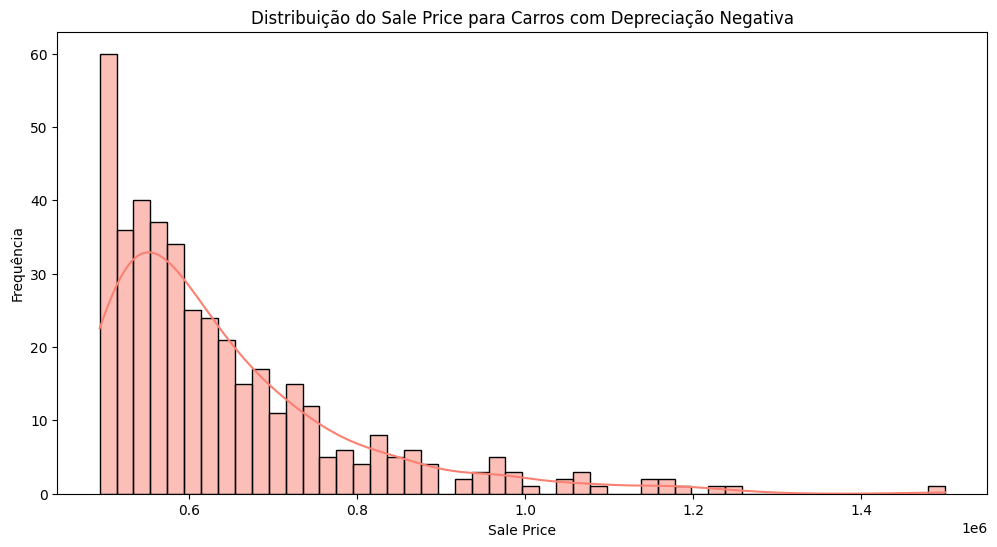

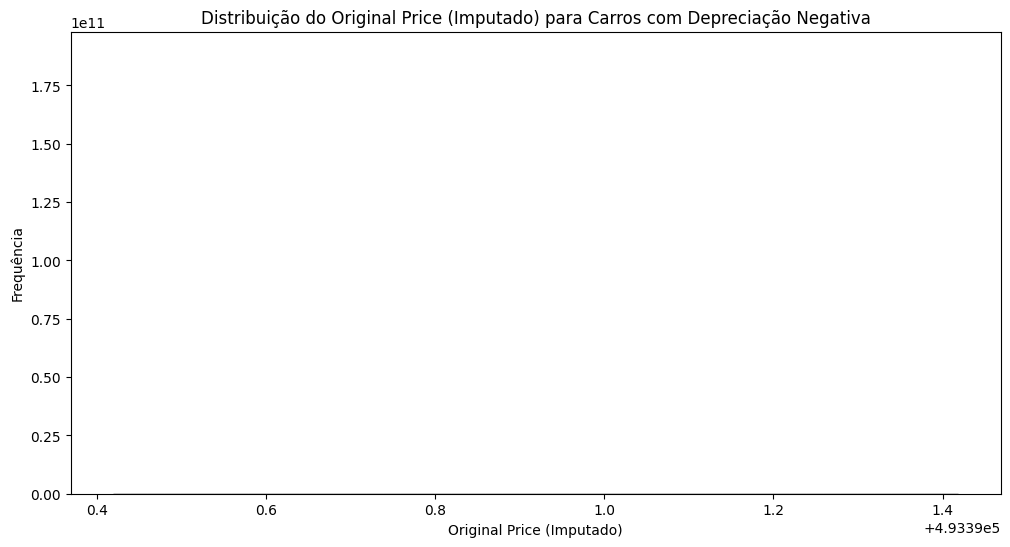

/tmp/ipython-input-523867455.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=negative_depreciation_df, x='fuel_type', palette='viridis')


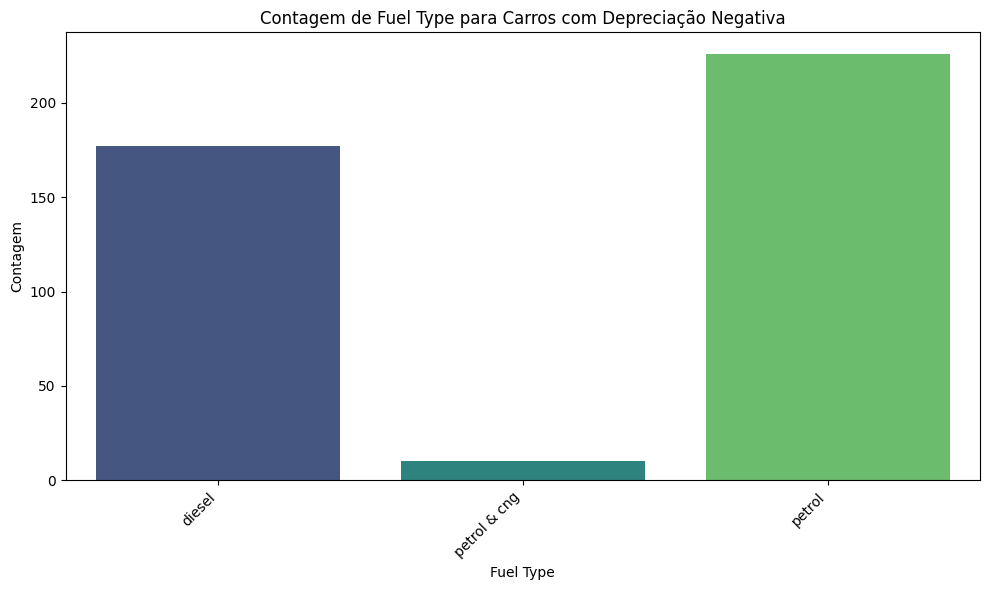

/tmp/ipython-input-523867455.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=negative_depreciation_df, x='make', palette='viridis')


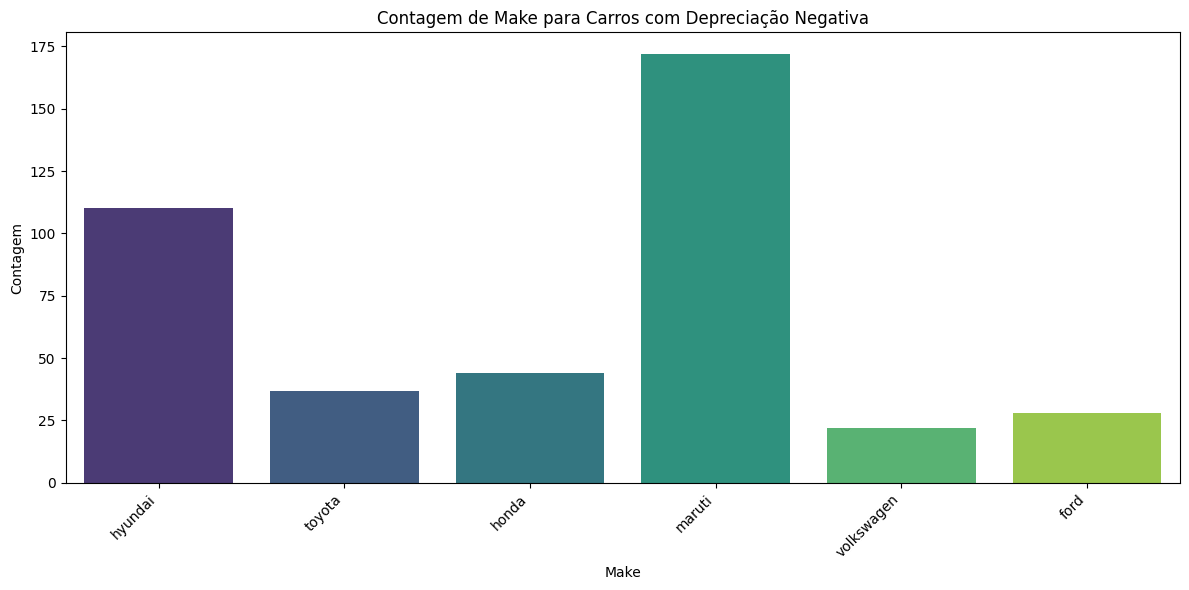

In [ ]:
# Analisar os casos onde 'depreciation' é negativo
# Primeiro, vamos garantir que a coluna 'depreciation' exista e esteja atualizada
# Assumindo que 'depreciation' = 'original_price' - 'sale_price'
# Criar a coluna 'depreciation' se ela não existir ou atualizá-la após a imputação
df['depreciation'] = df['original_price'] - df['sale_price']

# Identificar as linhas com depreciação negativa
negative_depreciation_df = df[df['depreciation'] < 0].copy()

print(f"Número de casos com depreciação negativa: {len(negative_depreciation_df)}")

if not negative_depreciation_df.empty:
    print("\nCaracterísticas dos carros com depreciação negativa (primeiras 5 linhas):")
    display(negative_depreciation_df.head())

    # Analisar a distribuição de algumas variáveis para carros com depreciação negativa
    print("\nAnálise da distribuição de algumas variáveis para casos com depreciação negativa:")

    plt.figure(figsize=(12, 6))
    sns.histplot(negative_depreciation_df['sale_price'], bins=50, kde=True, color='salmon')
    plt.title('Distribuição do Sale Price para Carros com Depreciação Negativa')
    plt.xlabel('Sale Price')
    plt.ylabel('Frequência')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(negative_depreciation_df['original_price'], bins=50, kde=True, color='skyblue')
    plt.title('Distribuição do Original Price (Imputado) para Carros com Depreciação Negativa')
    plt.xlabel('Original Price (Imputado)')
    plt.ylabel('Frequência')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=negative_depreciation_df, x='fuel_type', palette='viridis')
    plt.title('Contagem de Fuel Type para Carros com Depreciação Negativa')
    plt.xlabel('Fuel Type')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(data=negative_depreciation_df, x='make', palette='viridis')
    plt.title('Contagem de Make para Carros com Depreciação Negativa')
    plt.xlabel('Make')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("\nNão foram encontrados casos com depreciação negativa.")

ENGENHARIA DE FEATURES - ANALISANDO GRAFICOS

In [ ]:
from datetime import datetime


# 1. Feature Engineering
#  feature 'car_age'
current_year = datetime.now().year
df['car_age'] = current_year - df['yr_mfr']

# feature 'kms_per_year'
df['kms_per_year'] = df['kms_run'] / (df['car_age'] + 1e-6) # Adicionar pequena constante
df['kms_per_year'] = df['kms_per_year'].replace([np.inf, -np.inf], np.nan)
median_kms_per_year = df['kms_per_year'].median()
df['kms_per_year'] = df['kms_per_year'].fillna(median_kms_per_year)

# feature 'depreciation'
df['depreciation'] = df['original_price'] - df['sale_price']

--- Análise Visual das Features de Engenharia ---


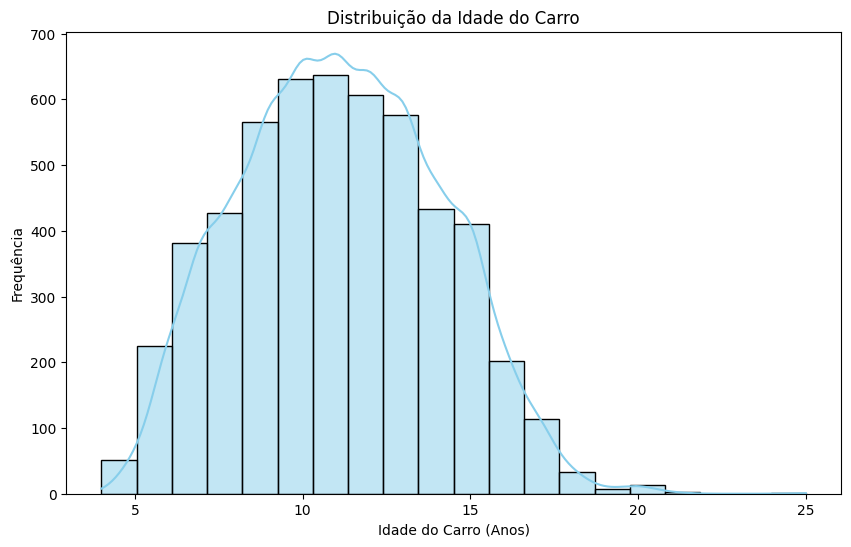

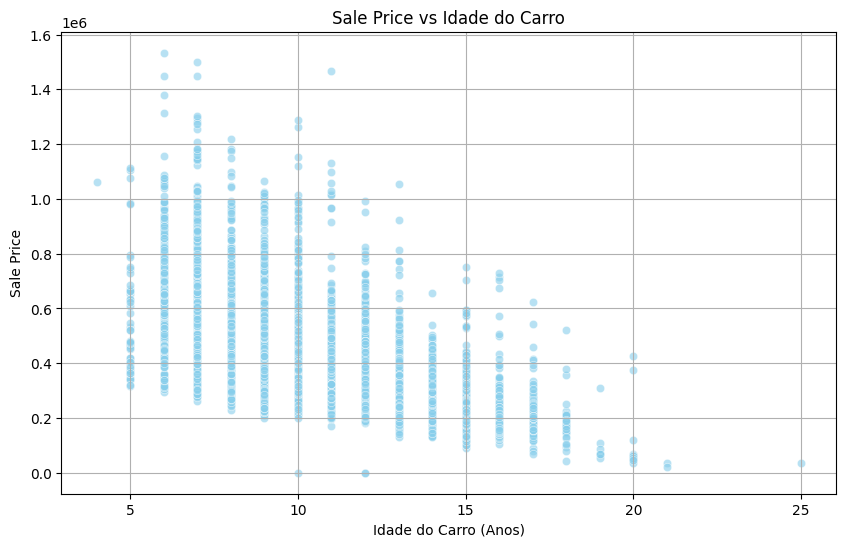

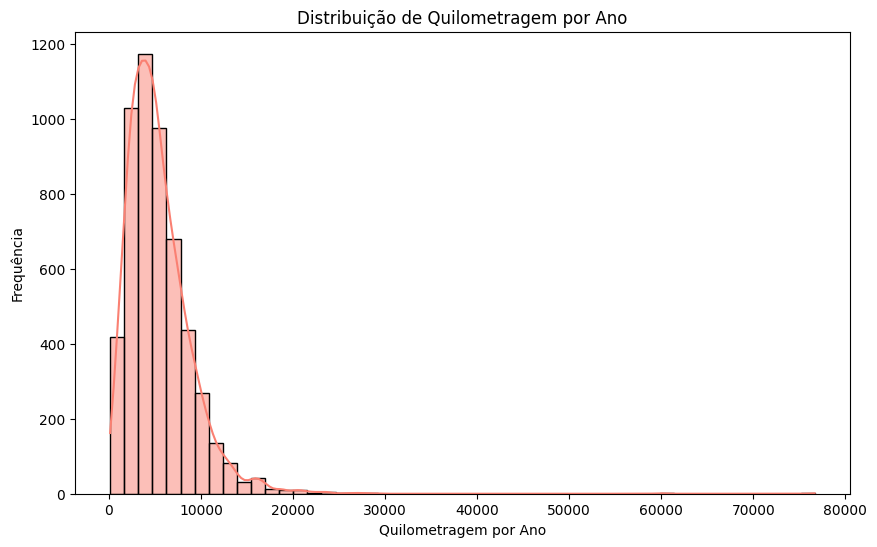

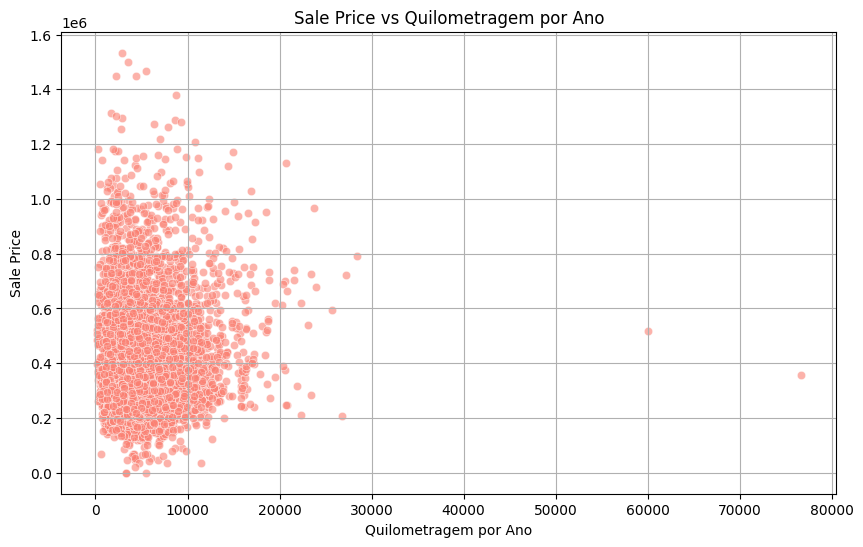

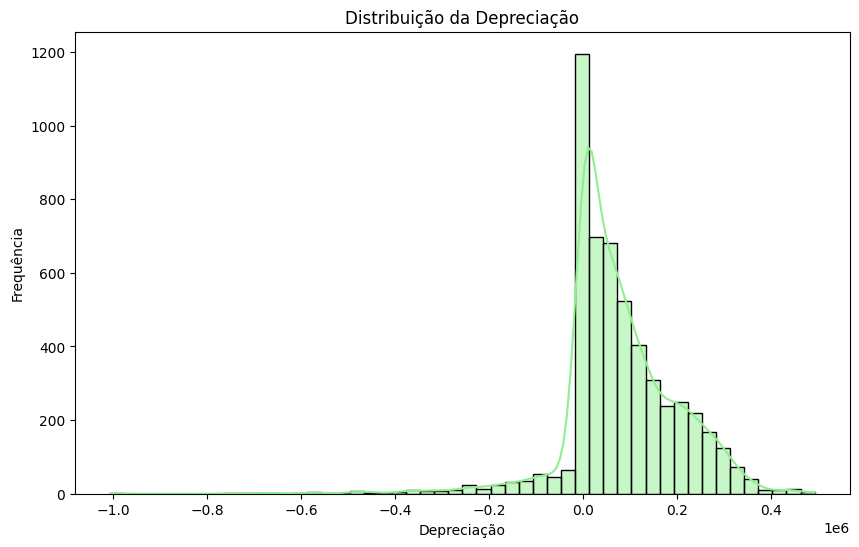

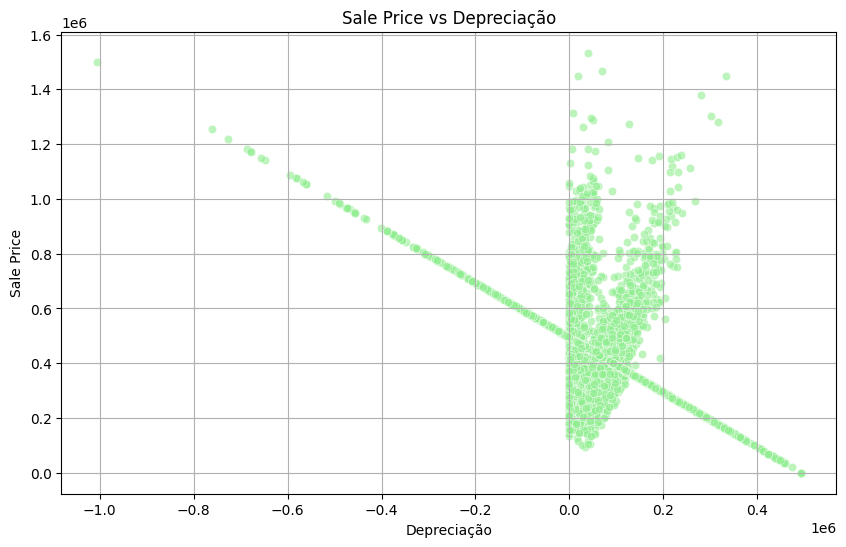

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Análise Visual das Features de Engenharia ---")

# Histograma para 'car_age'
plt.figure(figsize=(10, 6))
sns.histplot(df['car_age'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Idade do Carro')
plt.xlabel('Idade do Carro (Anos)')
plt.ylabel('Frequência')
plt.show()

# Scatter plot: 'car_age' vs 'sale_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='car_age', y='sale_price', alpha=0.6, color='skyblue')
plt.title('Sale Price vs Idade do Carro')
plt.xlabel('Idade do Carro (Anos)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


# Histograma para 'kms_per_year'
plt.figure(figsize=(10, 6))
sns.histplot(df['kms_per_year'], bins=50, kde=True, color='salmon')
plt.title('Distribuição de Quilometragem por Ano')
plt.xlabel('Quilometragem por Ano')
plt.ylabel('Frequência')
plt.show()

# Scatter plot: 'kms_per_year' vs 'sale_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kms_per_year', y='sale_price', alpha=0.6, color='salmon')
plt.title('Sale Price vs Quilometragem por Ano')
plt.xlabel('Quilometragem por Ano')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


# Histograma para 'depreciation'
plt.figure(figsize=(10, 6))
sns.histplot(df['depreciation'], bins=50, kde=True, color='lightgreen')
plt.title('Distribuição da Depreciação')
plt.xlabel('Depreciação')
plt.ylabel('Frequência')
plt.show()

# Scatter plot: 'depreciation' vs 'sale_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='depreciation', y='sale_price', alpha=0.6, color='lightgreen')
plt.title('Sale Price vs Depreciação')
plt.xlabel('Depreciação')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

# Definição da Tabela de Preços de Lançamento

Esta célula define um dicionário chamado `tabela_precos` que armazena informações sobre os preços de lançamento de diferentes modelos de carros em várias gerações e tipos de transmissão. Esta tabela será usada posteriormente para imputar valores ausentes na coluna 'original_price'.

In [ ]:
tabela_precos = {
    'Hyundai Grand i10': [
        {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 458000, 'fonte': 'https://www.autocarindia.com/car-news/2017-hyundai-grand-i10-facelift-launched-at-rs-458-lakh-404065'},
        {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2019, 'transmissao': 'AT', 'preco_base': 458000 + 68000, 'fonte': 'https://www.autocarindia.com/car-news/2017-hyundai-grand-i10-facelift-launched-at-rs-458-lakh-404065'}
    ],
    'Hyundai Grand i10 Nios': [
        {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://www.cardekho.com/india-car-news/hyundai-verna-2023-launched-at-rs-1090-lakh-undercuts-its-rivals-by-over-rs-40000-30574.htm'},
        {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 499000 + 180000, 'fonte': 'https://www.cardekho.com/india-car-news/hyundai-verna-2023-launched-at-rs-1090-lakh-undercuts-its-rivals-by-over-rs-40000-30574.htm'}
    ],
    'Maruti Alto K10': [
        {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 306000, 'fonte': 'https://www.carwale.com/news/maruti-suzuki-celerio-zxi-amt-launched-at-rs-499-lakh/?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 306000 + 45000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/alto-k10-2014-2020/vxi-amt-2014-2018/'}
    ],
    'Maruti Ritz': [
        {'geracao_ano_inicio': 2009, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 459000, 'fonte': 'https://www.cardekho.com/maruti/ritz/maruti-ritz-lxi.html?utm_source=chatgpt.com'}
    ],
    'Hyundai i10': [
        {'geracao_ano_inicio': 2007, 'geracao_ano_fim': 2013, 'transmissao': 'MT', 'preco_base': 358000, 'fonte': 'https://www.cardekho.com/carmodels/Hyundai/Hyundai_i10_2007-2010/'},
        {'geracao_ano_inicio': 2007, 'geracao_ano_fim': 2013, 'transmissao': 'AT', 'preco_base': 358000 + 60000, 'fonte': 'https://www.cardekho.com/carmodels/Hyundai/Hyundai_i10_2007-2010/'},
        {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 462000, 'fonte': 'https://www.carwale.com/hyundai-cars/i10-2007-2010/'},
        {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 462000 + 60000, 'fonte': 'https://www.carwale.com/hyundai-cars/i10-2007-2010/'}
    ],
    'Hyundai Eon': [
        {'geracao_ano_inicio': 2011, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 269000, 'fonte': 'https://www.autocarindia.com/car-news/hyundai-eon-launched-at-rs-269-lakh-270201?utm_source=chatgpt.com'}
    ],
    'Maruti Swift': [
        {'geracao_ano_inicio': 2005, 'geracao_ano_fim': 2010, 'transmissao': 'MT', 'preco_base': 387000, 'fonte': 'https://www.cardekho.com/india-car-news/watch-heres-how-the-prices-of-the-maruti-swift-have-gone-up-over-the-years-since-2005-32585.htm?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2011, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 422000, 'fonte': 'https://www.cardekho.com/india-car-news/watch-heres-how-the-prices-of-the-maruti-swift-have-gone-up-over-the-years-since-2005-32585.htm?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2011, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 422000 + 60000, 'fonte': 'https://www.cardekho.com/india-car-news/watch-heres-how-the-prices-of-the-maruti-swift-have-gone-up-over-the-years-since-2005-32585.htm?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://auto.ndtv.com/news/2018-maruti-suzuki-swift-launched-in-india-prices-start-at-rs-499-lakh-1806437?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 499000 + 45000, 'fonte': 'https://auto.ndtv.com/news/2018-maruti-suzuki-swift-launched-in-india-prices-start-at-rs-499-lakh-1806437?utm_source=chatgpt.com'}
    ],
    'Maruti Alto 800': [
        {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 225000, 'fonte': 'https://www.cardekho.com/india-car-news/maruti-alto-800-launched-at-rs-244-lakh-9488.htm?utm_source=chatgpt.com'}
    ],
    'Hyundai Creta': [
        {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 859000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
        {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 859000 + 120000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
        {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 999000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
        {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 999000 + 180000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
        {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1099000, 'fonte': 'https://www.hyundai.com/in/en/find-a-car/creta/highlights'},
        {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1099000 + 130000, 'fonte': 'https://www.hyundai.com/in/en/find-a-car/creta/highlights'}
    ],
    'Hyundai i20': [
        {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2014, 'transmissao': 'MT', 'preco_base': 479000, 'fonte': 'https://www.carwale.com/hyundai-cars/i20-2008-2014/'},
        {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2014, 'transmissao': 'AT', 'preco_base': 479000 + 60000, 'fonte': 'https://www.carwale.com/hyundai-cars/i20-2008-2014/'},
        {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 489000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/elite-i20-launch-details'},
        {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 489000 + 100000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/elite-i20-launch-details'},
        {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 679000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'},
        {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 679000 + 150000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'}
    ],
    'Hyundai Santro Xing': [
        {'geracao_ano_inicio': 2003, 'geracao_ano_fim': 2014, 'transmissao': 'MT', 'preco_base': 299000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2008-2014/'},
        {'geracao_ano_inicio': 2003, 'geracao_ano_fim': 2014, 'transmissao': 'AT', 'preco_base': 299000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2008-2014/'}
    ],
    'Hyundai Santro': [
        {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 389000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2018-2022/'},
        {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2022, 'transmissao': 'AT', 'preco_base': 389000 + 40000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2018-2022/'}
    ],
    'Maruti Swift Dzire': [
        {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2012, 'transmissao': 'MT', 'preco_base': 449000, 'fonte': 'https://www.cardekho.com/maruti/dzire-2008-2012'},
        {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2012, 'transmissao': 'AT', 'preco_base': 449000 + 80000, 'fonte': 'https://www.cardekho.com/maruti/dzire-2008-2012'},
        {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 479000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2012-2017/'},
        {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 479000 + 60000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2012-2017/'},
        {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 545000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2017-2024/'},
        {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 545000 + 60000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2017-2024/'}
    ],
    'Maruti Wagon R 1.0': [
        {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 328000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2010-2019/'},
        {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2019, 'transmissao': 'AT', 'preco_base': 328000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2010-2019/'},
        {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 419000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2019/'},
        {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 419000 + 55000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2019/'}
    ],
    'Maruti Ertiga': [
        {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2018, 'transmissao': 'MT', 'preco_base': 589000, 'fonte': 'https://www.economictimes.indiatimes.com/maruti-suzuki-launched-ertiga-at-starting-price-of-rs-5-89-lakh/articleshow/12634917.cms?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2018, 'transmissao': 'AT', 'preco_base': 589000 + 110000, 'fonte': 'https://www.economictimes.indiatimes.com/maruti-suzuki-launched-ertiga-at-starting-price-of-rs-5-89-lakh/articleshow/12634917.cms?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 744000, 'fonte': 'https://www.autocarindia.com/car-news/2018-maruti-suzuki-ertiga-launched-at-rs-744-lakh-410524?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 744000 + 120000, 'fonte': 'https://www.autocarindia.com/car-news/2018-maruti-suzuki-ertiga-launched-at-rs-744-lakh-410524?utm_source=chatgpt.com'}
    ],
    'Honda Amaze': [
        {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2018, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://www.autocarindia.com/car-news/honda-amaze-launched-at-rs-499-lakh-42730?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2018, 'transmissao': 'AT', 'preco_base': 499000 + 80000, 'fonte': 'https://www.autocarindia.com/car-news/honda-amaze-launched-at-rs-499-lakh-42730?utm_source=chatgpt.com'}
    ],
    'Honda City': [
        {'geracao_ano_inicio': 2022, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1195000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/2023-honda-city-facelift-launched-in-india-at-rs-11-49-lakh-price-variants-specs-features/articleshow/98359742.cms'},
        {'geracao_ano_inicio': 2022, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1195000 + 100000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/2023-honda-city-facelift-launched-in-india-at-rs-11-49-lakh-price-variants-specs-features/articleshow/98359742.cms'}
    ],
    'Volkswagen Polo': [
        {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 645000, 'fonte': 'https://www.carwale.com/volkswagen-cars/polo/?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2022, 'transmissao': 'AT', 'preco_base': 645000 + 120000, 'fonte': 'https://www.carwale.com/volkswagen-cars/polo/?utm_source=chatgpt.com'}
    ],
    'Maruti Celerio': [
        {'geracao_ano_inicio': 2021, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://www.businesstoday.in/auto/story/maruti-suzuki-celerio-launched-today-check-features-mileage-and-other-details-311784-2021-11-10?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2021, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 499000 + 150000, 'fonte': 'https://www.businesstoday.in/auto/story/maruti-suzuki-celerio-launched-today-check-features-mileage-and-other-details-311784-2021-11-10?utm_source=chatgpt.com'}
    ],
    'Toyota Innova Crysta': [
        {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1779000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/toyota-innova-crysta-touringsport-launched-in-india-at-rs-17-79-lakh-975162-2017-05-04?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1779000 + 250000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/toyota-innova-crysta-touringsport-launched-in-india-at-rs-17-79-lakh-975162-2017-05-04?utm_source=chatgpt.com'}
    ],
    'Hyundai Verna': [
        {'geracao_ano_inicio': 2023, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1090000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/hyundai-verna-2023-launched-in-india-at-rs-11-49-lakh-2489313-2024-01-16?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2023, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1090000 + 130000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/hyundai-verna-2023-launched-in-india-at-rs-11-49-lakh-2489313-2024-01-16?utm_source=chatgpt.com'}
    ],
    'Renault Kwid': [
        {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 276000, 'fonte': 'https://www.wikipedia.org/wiki/Renault_Kwid'},
        {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2019, 'transmissao': 'AT', 'preco_base': 276000 + 30000, 'fonte': 'https://www.cardekho.com/carmodels/Renault/Renault_KWID_2015-2019'},
        {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 469000, 'fonte': 'https://www.carwale.com/news/2024-renault-kwid-launched-prices-in-india-start-from-rs-469-lakh/?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 469000 + 45000, 'fonte': 'https://www.carwale.com/news/2024-renault-kwid-launched-prices-in-india-start-from-rs-469-lakh/?utm_source=chatgpt.com'}
    ],
    'Maruti Vitara Brezza': [
        {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 699000, 'fonte': 'https://www.carandbike.com/news/maruti-suzuki-vitara-brezza-launched-in-india-prices-start-from-rs-699-lakh-1284788?utm_source=chatgpt.com'},
        {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2022, 'transmissao': 'AT', 'preco_base': 699000 + 140000, 'fonte': 'https://www.carandbike.com/news/maruti-suzuki-vitara-brezza-launched-in-india-prices-start-from-rs-699-lakh-1284788?utm_source=chatgpt.com'}
    ],
    'Ford EcoSport': [
        {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 559000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/ford-ecosport-launched-at-rs-559-lakh'},
        {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 559000 + 100000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/ford-ecosport-launched-at-rs-559-lakh'},
        {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2021, 'transmissao': 'MT', 'preco_base': 731000, 'fonte': 'https://www.carwale.com/ford-cars/ecosport-2013-2015/'},
        {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2021, 'transmissao': 'AT', 'preco_base': 731000 + 100000, 'fonte': 'https://www.carwale.com/ford-cars/ecosport-2013-2015/'}
    ],
    'Maruti Eeco': [
        {'geracao_ano_inicio': 2009, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 570000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/2025-maruti-suzuki-eeco-launched-rs-5-7-lakh-gets-6-airbags-caption-seats/articleshow/120475621.cms?utm_source=chatgpt.com'}
    ],
    'Hyundai Elite i20': [
        {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 489000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'},
        {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 489000 + 100000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'}
    ]
}

# Imputação de Valores Ausentes Usando a Tabela de Preços (Segunda Tentativa com Proximidade de Ano)

Esta célula é uma nova tentativa de imputação usando a tabela de preços, mas com uma lógica aprimorada para encontrar o "melhor match" por proximidade de ano caso não haja uma correspondência exata do ano de fabricação dentro de uma geração na tabela.

# Imputação de Valores Ausentes Usando a Tabela de Preços (Segunda Tentativa com Proximidade de Ano)

**IDENTIFICADOR_CELULA_IMPUTACAO_TABELA**

Esta célula é uma nova tentativa de imputação usando a tabela de preços, mas com uma lógica aprimorada para encontrar o "melhor match" por proximidade de ano caso não haja uma correspondência exata do ano de fabricação dentro de uma geração na tabela.

# Task
Tratar outliers e realizar engenharia de features no dataframe, utilizando o documento "/content/Aula06_Outliers.ipynb" como guia.

## Tratamento de outliers

### Subtask:
Analisar e tratar outliers nas variáveis numéricas relevantes do DataFrame.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Imputação concluída. 1460 valores de 'original_price' foram preenchidos usando a tabela (incluindo lógica de proximidade de ano).
Valores ausentes restantes em 'original_price' após imputação pela tabela: 810

Imputação de valores restantes na coluna 'original_price' com a média como fallback concluída.
Valores ausentes restantes em 'original_price' após imputação com a média: 0
Imputação da coluna 'transmission' concluída usando a moda.
Imputação da coluna 'car_availability' concluída usando a moda.
Imputação da coluna 'body_type' concluída usando a moda.
Imputação da coluna 'source' concluída usando a moda.
Imputação da coluna 'registered_city' concluída usando a moda.
Imputação da coluna 'registered_state' concluída usando a moda.
Imputação da coluna 'car_rating' concluída usando a moda.
Imputação da coluna 'fitness_certificate' concluída usando a moda.



/tmp/ipython-input-2051521458.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_price'].fillna(mean_original_price, inplace=True)
/tmp/ipython-input-2051521458.py:218: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

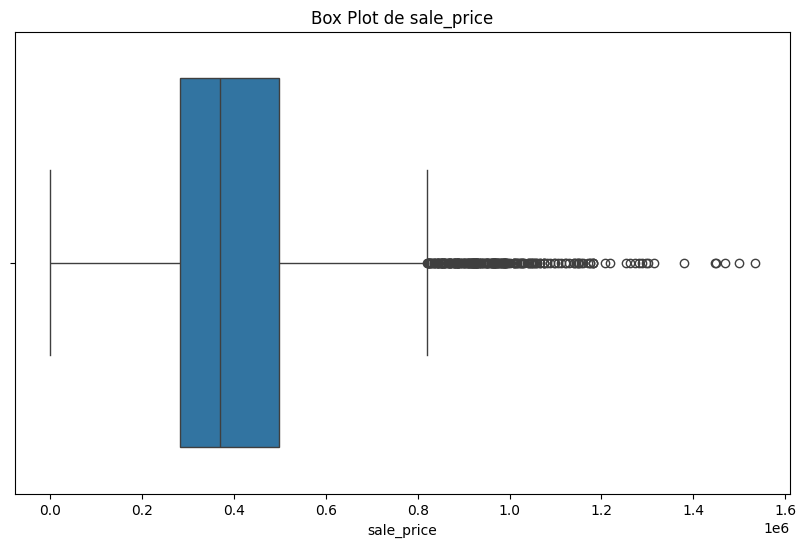

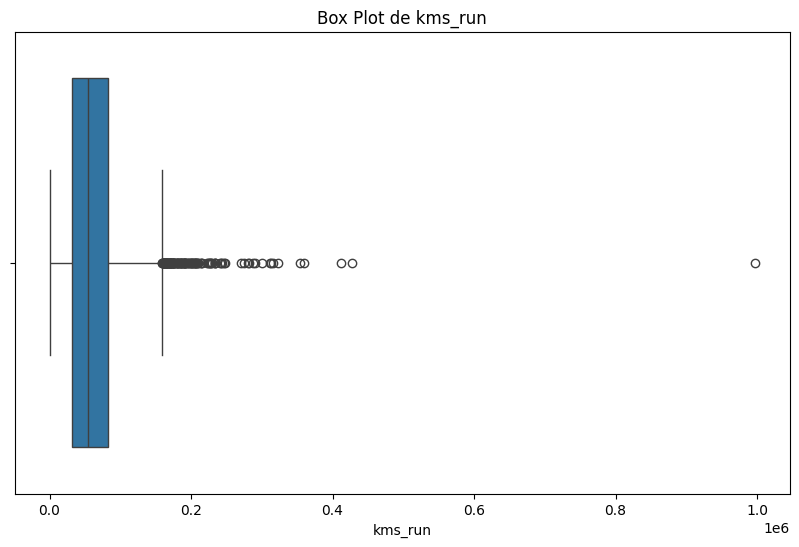

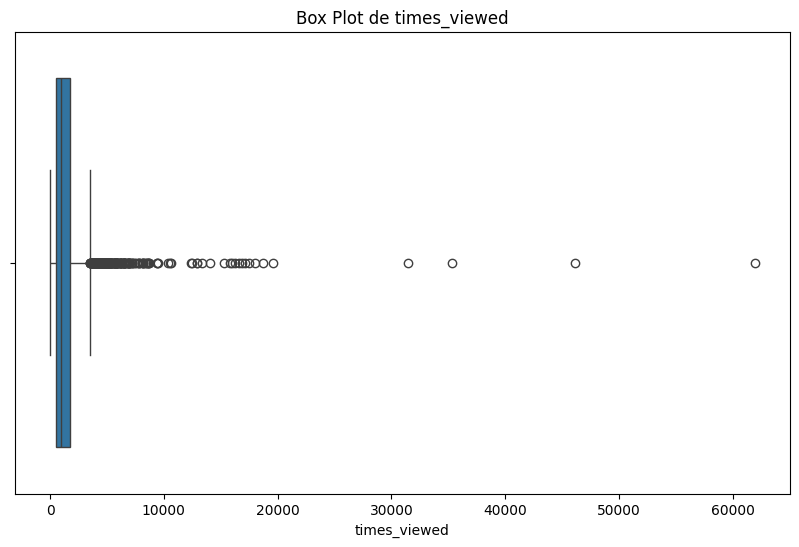

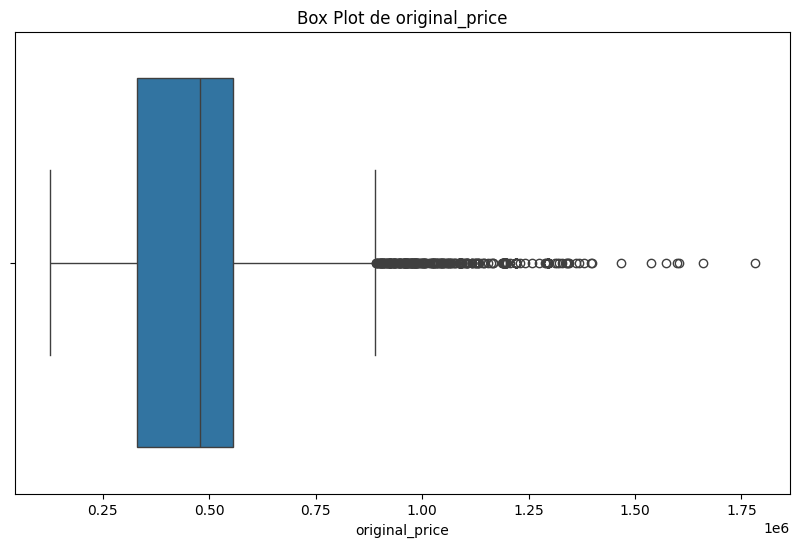


A coluna 'transmission' é categórica e não é analisada com box plots para outliers.


In [ ]:
# Reload the DataFrame from the last successful execution point
# Assumes the last successful point is after the table imputation
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

try:
    drive.mount("/content/drive")
except Exception as e:
    print(f"Erro ao montar o Drive: {e}")
    print("Continuando sem montar o Drive. Certifique-se de que o arquivo CSV está acessível.")

try:
    # Carregar o DataFrame original
    df = pd.read_csv("/content/sample_data/Used_Car_Price_Prediction.csv")
    # Identificar os modelos com mais de 100 ocorrências
    model_counts = df['model'].value_counts()
    models_to_keep = model_counts[model_counts >= 100].index.tolist()

    # Filtrar o DataFrame original
    df = df[df['model'].isin(models_to_keep)].copy()

    # Re-executar a imputação baseada na tabela de preços para 'original_price'
    tabela_precos = {
        'Hyundai Grand i10': [
            {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 458000, 'fonte': 'https://www.autocarindia.com/car-news/2017-hyundai-grand-i10-facelift-launched-at-rs-458-lakh-404065'},
            {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2019, 'transmissao': 'AT', 'preco_base': 458000 + 68000, 'fonte': 'https://www.autocarindia.com/car-news/2017-hyundai-grand-i10-facelift-launched-at-rs-458-lakh-404065'}
        ],
        'Hyundai Grand i10 Nios': [
            {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://www.cardekho.com/india-car-news/hyundai-verna-2023-launched-at-rs-1090-lakh-undercuts-its-rivals-by-over-rs-40000-30574.htm'},
            {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 499000 + 180000, 'fonte': 'https://www.cardekho.com/india-car-news/hyundai-verna-2023-launched-at-rs-1090-lakh-undercuts-its-rivals-by-over-rs-40000-30574.htm'}
        ],
        'Maruti Alto K10': [
            {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 306000, 'fonte': 'https://www.carwale.com/news/maruti-suzuki-celerio-zxi-amt-launched-at-rs-499-lakh/?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 306000 + 45000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/alto-k10-2014-2020/vxi-amt-2014-2018/'}
        ],
        'Maruti Ritz': [
            {'geracao_ano_inicio': 2009, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 459000, 'fonte': 'https://www.cardekho.com/maruti/ritz/maruti-ritz-lxi.html?utm_source=chatgpt.com'}
        ],
        'Hyundai i10': [
            {'geracao_ano_inicio': 2007, 'geracao_ano_fim': 2013, 'transmissao': 'MT', 'preco_base': 358000, 'fonte': 'https://www.cardekho.com/carmodels/Hyundai/Hyundai_i10_2007-2010/'},
            {'geracao_ano_inicio': 2007, 'geracao_ano_fim': 2013, 'transmissao': 'AT', 'preco_base': 358000 + 60000, 'fonte': 'https://www.cardekho.com/carmodels/Hyundai/Hyundai_i10_2007-2010/'},
            {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 462000, 'fonte': 'https://www.carwale.com/hyundai-cars/i10-2007-2010/'},
            {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 462000 + 60000, 'fonte': 'https://www.carwale.com/hyundai-cars/i10-2007-2010/'}
        ],
        'Hyundai Eon': [
            {'geracao_ano_inicio': 2011, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 269000, 'fonte': 'https://www.autocarindia.com/car-news/hyundai-eon-launched-at-rs-269-lakh-270201?utm_source=chatgpt.com'}
        ],
        'Maruti Swift': [
            {'geracao_ano_inicio': 2005, 'geracao_ano_fim': 2010, 'transmissao': 'MT', 'preco_base': 387000, 'fonte': 'https://www.cardekho.com/india-car-news/watch-heres-how-the-prices-of-the-maruti-swift-have-gone-up-over-the-years-since-2005-32585.htm?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2011, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 422000, 'fonte': 'https://www.cardekho.com/india-car-news/watch-heres-how-the-prices-of-the-maruti-swift-have-gone-up-over-the-years-since-2005-32585.htm?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2011, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 422000 + 60000, 'fonte': 'https://www.cardekho.com/india-car-news/watch-heres-how-the-prices-of_the-maruti-swift-have-gone-up-over-the-years-since-2005-32585.htm?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://auto.ndtv.com/news/2018-maruti-suzuki-swift-launched-in-india-prices-start-at-rs-499-lakh-1806437?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 499000 + 45000, 'fonte': 'https://auto.ndtv.com/news/2018-maruti-suzuki-swift-launched-in-india-prices-start-at-rs-499-lakh-1806437?utm_source=chatgpt.com'}
        ],
        'Maruti Alto 800': [
            {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 225000, 'fonte': 'https://www.cardekho.com/india-car-news/maruti-alto-800-launched-at-rs-244-lakh-9488.htm?utm_source=chatgpt.com'}
        ],
        'Hyundai Creta': [
            {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 859000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
            {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 859000 + 120000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
            {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 999000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
            {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 999000 + 180000, 'fonte': 'https://www.cardekho.com/hyundai/creta-2015-2020'},
            {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1099000, 'fonte': 'https://www.hyundai.com/in/en/find-a-car/creta/highlights'},
            {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1099000 + 130000, 'fonte': 'https://www.hyundai.com/in/en/find-a-car/creta/highlights'}
        ],
        'Hyundai i20': [
            {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2014, 'transmissao': 'MT', 'preco_base': 479000, 'fonte': 'https://www.carwale.com/hyundai-cars/i20-2008-2014/'},
            {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2014, 'transmissao': 'AT', 'preco_base': 479000 + 60000, 'fonte': 'https://www.carwale.com/hyundai-cars/i20-2008-2014/'},
            {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 489000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/elite-i20-launch-details'},
            {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 489000 + 100000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/elite-i20-launch-details'},
            {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 679000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'},
            {'geracao_ano_inicio': 2020, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 679000 + 150000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'}
        ],
        'Hyundai Santro Xing': [
            {'geracao_ano_inicio': 2003, 'geracao_ano_fim': 2014, 'transmissao': 'MT', 'preco_base': 299000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2008-2014/'},
            {'geracao_ano_inicio': 2003, 'geracao_ano_fim': 2014, 'transmissao': 'AT', 'preco_base': 299000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2008-2014/'}
        ],
        'Hyundai Santro': [
            {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 389000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2018-2022/'},
            {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2022, 'transmissao': 'AT', 'preco_base': 389000 + 40000, 'fonte': 'https://www.carwale.com/hyundai-cars/santro-2018-2022/'}
        ],
        'Maruti Swift Dzire': [
            {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2012, 'transmissao': 'MT', 'preco_base': 449000, 'fonte': 'https://www.cardekho.com/maruti/dzire-2008-2012'},
            {'geracao_ano_inicio': 2008, 'geracao_ano_fim': 2012, 'transmissao': 'AT', 'preco_base': 449000 + 80000, 'fonte': 'https://www.cardekho.com/maruti/dzire-2008-2012'},
            {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 479000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2012-2017/'},
            {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 479000 + 60000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2012-2017/'},
            {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 545000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2017-2024/'},
            {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 545000 + 60000, 'fonte': 'https://www.carwale.com/maruti-cars/dzire-2017-2024/'}
        ],
        'Maruti Wagon R 1.0': [
            {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 328000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2010-2019/'},
            {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2019, 'transmissao': 'AT', 'preco_base': 328000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2010-2019/'},
            {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 419000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2019/'},
            {'geracao_ano_inicio': 2019, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 419000 + 55000, 'fonte': 'https://www.carwale.com/maruti-suzuki-cars/wagon-r-2019/'}
        ],
        'Maruti Ertiga': [
            {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2018, 'transmissao': 'MT', 'preco_base': 589000, 'fonte': 'https://www.economictimes.indiatimes.com/maruti-suzuki-launched-ertiga-at-starting-price-of-rs-5-89-lakh/articleshow/12634917.cms?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2012, 'geracao_ano_fim': 2018, 'transmissao': 'AT', 'preco_base': 589000 + 110000, 'fonte': 'https://www.economictimes.indiatimes.com/maruti-suzuki-launched-ertiga-at-starting-price-of-rs-5-89-lakh/articleshow/12634917.cms?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 744000, 'fonte': 'https://www.autocarindia.com/car-news/2018-maruti-suzuki-ertiga-launched-at-rs-744-lakh-410524?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2018, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 744000 + 120000, 'fonte': 'https://www.autocarindia.com/car-news/2018-maruti-suzuki-ertiga-launched-at-rs-744-lakh-410524?utm_source=chatgpt.com'}
        ],
        'Honda Amaze': [
            {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2018, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://www.autocarindia.com/car-news/honda-amaze-launched-at-rs-499-lakh-42730?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2018, 'transmissao': 'AT', 'preco_base': 499000 + 80000, 'fonte': 'https://www.autocarindia.com/car-news/honda-amaze-launched-at-rs-499-lakh-42730?utm_source=chatgpt.com'}
        ],
        'Honda City': [
            {'geracao_ano_inicio': 2022, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1195000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/2023-honda-city-facelift-launched-in-india-at-rs-11-49-lakh-price-variants-specs-features/articleshow/98359742.cms'},
            {'geracao_ano_inicio': 2022, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1195000 + 100000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/2023-honda-city-facelift-launched-in-india-at-rs-11-49-lakh-price-variants-specs-features/articleshow/98359742.cms'}
        ],
        'Volkswagen Polo': [
            {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 645000, 'fonte': 'https://www.carwale.com/volkswagen-cars/polo/?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2010, 'geracao_ano_fim': 2022, 'transmissao': 'AT', 'preco_base': 645000 + 120000, 'fonte': 'https://www.carwale.com/volkswagen-cars/polo/?utm_source=chatgpt.com'}
        ],
        'Maruti Celerio': [
            {'geracao_ano_inicio': 2021, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 499000, 'fonte': 'https://www.businesstoday.in/auto/story/maruti-suzuki-celerio-launched-today-check-features-mileage-and-other-details-311784-2021-11-10?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2021, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 499000 + 150000, 'fonte': 'https://www.businesstoday.in/auto/story/maruti-suzuki-celerio-launched-today-check-features-mileage-and-other-details-311784-2021-11-10?utm_source=chatgpt.com'}
        ],
        'Toyota Innova Crysta': [
            {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1779000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/toyota-innova-crysta-touringsport-launched-in-india-at-rs-17-79-lakh-975162-2017-05-04?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1779000 + 250000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/toyota-innova-crysta-touringsport-launched-in-india-at-rs-17-79-lakh-975162-2017-05-04?utm_source=chatgpt.com'}
        ],
        'Hyundai Verna': [
            {'geracao_ano_inicio': 2023, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 1090000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/hyundai-verna-2023-launched-in-india-at-rs-11-49-lakh-2489313-2024-01-16?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2023, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 1090000 + 130000, 'fonte': 'https://www.indiatoday.in/auto/new-launches/story/hyundai-verna-2023-launched-in-india-at-rs-11-49-lakh-2489313-2024-01-16?utm_source=chatgpt.com'}
        ],
        'Renault Kwid': [
            {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2019, 'transmissao': 'MT', 'preco_base': 276000, 'fonte': 'https://www.wikipedia.org/wiki/Renault_Kwid'},
            {'geracao_ano_inicio': 2015, 'geracao_ano_fim': 2019, 'transmissao': 'AT', 'preco_base': 276000 + 30000, 'fonte': 'https://www.cardekho.com/carmodels/Renault/Renault_KWID_2015-2019'},
            {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 469000, 'fonte': 'https://www.carwale.com/news/2024-renault-kwid-launched-prices-in-india-start-from-rs-469-lakh/?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2024, 'geracao_ano_fim': 2024, 'transmissao': 'AT', 'preco_base': 469000 + 45000, 'fonte': 'https://www.carwale.com/news/2024-renault-kwid-launched-prices-in-india-start-from-rs-469-lakh/?utm_source=chatgpt.com'}
        ],
        'Maruti Vitara Brezza': [
            {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2022, 'transmissao': 'MT', 'preco_base': 699000, 'fonte': 'https://www.carandbike.com/news/maruti-suzuki-vitara-brezza-launched-in-india-prices-start-from-rs-699-lakh-1284788?utm_source=chatgpt.com'},
            {'geracao_ano_inicio': 2016, 'geracao_ano_fim': 2022, 'transmissao': 'AT', 'preco_base': 699000 + 140000, 'fonte': 'https://www.carandbike.com/news/maruti-suzuki-vitara-brezza-launched-in-india-prices-start-from-rs-699-lakh-1284788?utm_source=chatgpt.com'}
        ],
        'Ford EcoSport': [
            {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2017, 'transmissao': 'MT', 'preco_base': 559000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/ford-ecosport-launched-at-rs-559-lakh'},
            {'geracao_ano_inicio': 2013, 'geracao_ano_fim': 2017, 'transmissao': 'AT', 'preco_base': 559000 + 100000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/ford-ecosport-launched-at-rs-559-lakh'},
            {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2021, 'transmissao': 'MT', 'preco_base': 731000, 'fonte': 'https://www.carwale.com/ford-cars/ecosport-2013-2015/'},
            {'geracao_ano_inicio': 2017, 'geracao_ano_fim': 2021, 'transmissao': 'AT', 'preco_base': 731000 + 100000, 'fonte': 'https://www.carwale.com/ford-cars/ecosport-2013-2015/'}
        ],
        'Maruti Eeco': [
            {'geracao_ano_inicio': 2009, 'geracao_ano_fim': 2024, 'transmissao': 'MT', 'preco_base': 570000, 'fonte': 'https://timesofindia.indiatimes.com/auto/cars/2025-maruti-suzuki-eeco-launched-rs-5-7-lakh-gets-6-airbags-caption-seats/articleshow/120475621.cms?utm_source=chatgpt.com'}
        ],
        'Hyundai Elite i20': [
            {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'MT', 'preco_base': 489000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'},
            {'geracao_ano_inicio': 2014, 'geracao_ano_fim': 2020, 'transmissao': 'AT', 'preco_base': 489000 + 100000, 'fonte': 'https://www.carwale.com/compare-cars/hyundai-i20-2020-vs-elite-i20-2014-2015/'}
        ]
    }

    missing_original_price_indices = df[df['original_price'].isnull()].index
    imputed_count = 0
    for index in missing_original_price_indices:
        model = df.loc[index, 'car_name'].title()
        yr_mfr = df.loc[index, 'yr_mfr']
        transmission = df.loc[index, 'transmission']

        found_price = None
        best_match_info = None
        min_year_distance = float('inf')

        if model in tabela_precos:
            for info in tabela_precos[model]:
                transmission_match = False
                if pd.notna(transmission):
                    if transmission.lower() == 'automatic' and info['transmissao'].lower() == 'at':
                        transmission_match = True
                    elif transmission.lower() == 'manual' and info['transmissao'].lower() == 'mt':
                         transmission_match = True

                if transmission_match:
                    if info['geracao_ano_inicio'] <= yr_mfr <= info['geracao_ano_fim']:
                        found_price = info['preco_base']
                        break

                    year_distance = min(abs(yr_mfr - info['geracao_ano_inicio']), abs(yr_mfr - info['geracao_ano_fim']))

                    if year_distance < min_year_distance:
                        min_year_distance = year_distance
                        best_match_info = info

        if found_price is None and best_match_info is not None:
            transmission_match_best = False
            if pd.notna(transmission):
                if transmission.lower() == 'automatic' and best_match_info['transmissao'].lower() == 'at':
                    transmission_match_best = True
                elif transmission.lower() == 'manual' and best_match_info['transmissao'].lower() == 'mt':
                     transmission_match_best = True

            if transmission_match_best:
                found_price = best_match_info['preco_base']


        if found_price is not None:
            df.loc[index, 'original_price'] = found_price
            imputed_count += 1

    print(f"\nImputação concluída. {imputed_count} valores de 'original_price' foram preenchidos usando a tabela (incluindo lógica de proximidade de ano).")
    print(f"Valores ausentes restantes em 'original_price' após imputação pela tabela: {df['original_price'].isnull().sum()}")

    # Imputar os valores restantes em 'original_price' com a média
    mean_original_price = df['original_price'].mean()
    df['original_price'].fillna(mean_original_price, inplace=True)
    print(f"\nImputação de valores restantes na coluna 'original_price' com a média como fallback concluída.")
    print(f"Valores ausentes restantes em 'original_price' após imputação com a média: {df['original_price'].isnull().sum()}")

    # Imputar missing values for transmission, body_type, source, registered_city, registered_state, car_rating, fitness_certificate
    # Impute 'transmission' using mode
    if df['transmission'].isnull().sum() > 0:
        mode_transmission = df['transmission'].mode()[0]
        df['transmission'].fillna(mode_transmission, inplace=True)
        print("Imputação da coluna 'transmission' concluída usando a moda.")

    # Impute 'car_availability' using mode (based on previous analysis suggesting MAR/association with fuel_type)
    if df['car_availability'].isnull().sum() > 0:
        mode_car_availability = df['car_availability'].mode()[0]
        df['car_availability'].fillna(mode_car_availability, inplace=True)
        print("Imputação da coluna 'car_availability' concluída usando a moda.")

    # Impute 'body_type' using mode (few missing values)
    if df['body_type'].isnull().sum() > 0:
        mode_body_type = df['body_type'].mode()[0]
        df['body_type'].fillna(mode_body_type, inplace=True)
        print("Imputação da coluna 'body_type' concluída usando a moda.")

    # Impute 'source' using mode (based on previous analysis suggesting MAR/association)
    if df['source'].isnull().sum() > 0:
        mode_source = df['source'].mode()[0]
        df['source'].fillna(mode_source, inplace=True)
        print("Imputação da coluna 'source' concluída usando a moda.")

    # Impute remaining columns with few missing values using mode
    cols_to_treat_minor = ['registered_city', 'registered_state', 'car_rating', 'fitness_certificate']
    for col in cols_to_treat_minor:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Imputação da coluna '{col}' concluída usando a moda.")


    # Now that df is loaded and imputed, proceed with the original task step
    # 1. Identificar as colunas numéricas
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    print("\nColunas numéricas identificadas:")
    print(numeric_cols)

    # Excluir colunas que não são relevantes para análise de outliers de preço/quantidade
    # 'yr_mfr', 'total_owners', 'depreciation', 'car_age', 'kms_per_year' são features criadas ou relacionadas a categorias
    # 'broker_quote' e 'original_price' são preços, podem ter outliers mas a análise é diferente
    # 'emi_starts_from' e 'booking_down_pymnt' são derivadas do preço de venda
    # Focaremos nas variáveis mais diretamente relacionadas a quantidade e preço no contexto de outliers
    # As colunas mais importantes para a precificação e análise de outliers são 'sale_price', 'kms_run', 'times_viewed', e 'original_price'.
    # Embora 'original_price' seja importante, outliers aqui podem ser legítimos (carros raros, edições especiais, etc.)
    # e a imputação já tratou alguns casos extremos. 'broker_quote' também é um preço,
    # e 'emi_starts_from'/'booking_down_pymnt' são derivadas de 'sale_price'.
    # Portanto, manteremos o foco principal em 'sale_price', 'kms_run', 'times_viewed' e 'original_price' para a detecção de outliers.
    numeric_cols_for_outlier_analysis = ['sale_price', 'kms_run', 'times_viewed', 'original_price']


    print("\nColunas numéricas para análise de outliers focada em precificação:")
    print(numeric_cols_for_outlier_analysis)


    # 2. Para cada coluna numérica relevante, crie um box plot
    print("\nGerando box plots para colunas numéricas relevantes:")
    for col in numeric_cols_for_outlier_analysis:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot de {col}')
        plt.xlabel(col)
        plt.show()

    # Nota sobre 'transmission': 'transmission' é uma variável categórica.
    # A análise de outliers para variáveis categóricas geralmente envolve a identificação de categorias com frequências muito baixas,
    # o que já foi abordado ao filtrar os modelos com menos de 100 ocorrências no início do notebook.
    # Não é apropriado usar box plots para analisar outliers em variáveis categóricas.
    print("\nA coluna 'transmission' é categórica e não é analisada com box plots para outliers.")


except FileNotFoundError:
    print("Erro: O arquivo CSV não foi encontrado. Verifique o caminho do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

--- Tratamento de Outliers para 'original_price' ---
Q1 ('original_price'): 331349.00
Q3 ('original_price'): 555065.75
IQR ('original_price'): 223716.75
Limite Superior para Capping ('original_price'): 890640.88
Número de outliers identificados em 'original_price' acima do limite superior: 407

Capping aplicado na coluna 'original_price'.


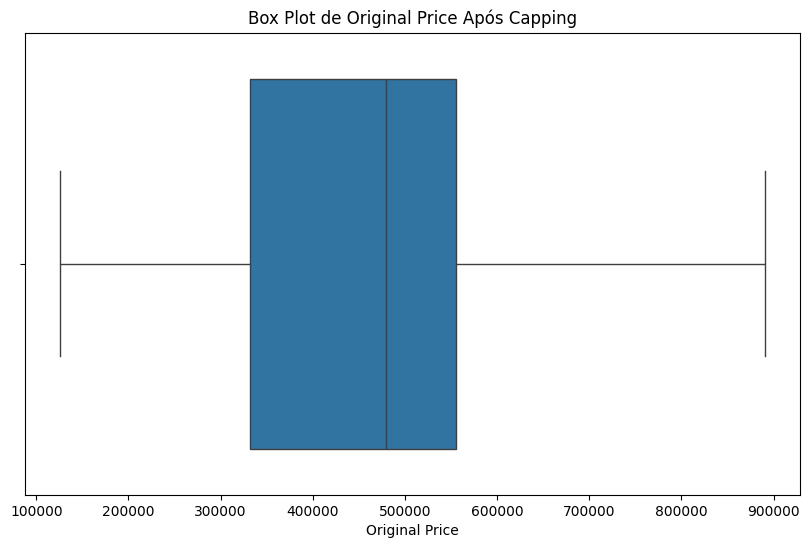


Verificando valores ausentes após tratamento de outliers (não deve haver nenhum):
0


In [ ]:
# --- Tratamento de Outliers para 'original_price' ---
print("--- Tratamento de Outliers para 'original_price' ---")

# Calcular Q1 (primeiro quartil) e Q3 (terceiro quartil)
Q1 = df['original_price'].quantile(0.25)
Q3 = df['original_price'].quantile(0.75)
IQR = Q3 - Q1

# Definir o limite superior para outliers (Limite = Q3 + 1.5 * IQR)
upper_limit_original_price = Q3 + 1.5 * IQR

# Identificar o número de outliers acima do limite superior
outliers_count_original_price = df[df['original_price'] > upper_limit_original_price].shape[0]

print(f"Q1 ('original_price'): {Q1:.2f}")
print(f"Q3 ('original_price'): {Q3:.2f}")
print(f"IQR ('original_price'): {IQR:.2f}")
print(f"Limite Superior para Capping ('original_price'): {upper_limit_original_price:.2f}")
print(f"Número de outliers identificados em 'original_price' acima do limite superior: {outliers_count_original_price}")

# Aplicar Capping: substituir valores acima do limite superior pelo limite superior
df['original_price'] = np.where(
    df['original_price'] > upper_limit_original_price,
    upper_limit_original_price,
    df['original_price']
)

print("\nCapping aplicado na coluna 'original_price'.")

# Verificar novamente o box plot para visualizar o efeito do capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['original_price'])
plt.title('Box Plot de Original Price Após Capping')
plt.xlabel('Original Price')
plt.show()

print("\nVerificando valores ausentes após tratamento de outliers (não deve haver nenhum):")
print(df['original_price'].isnull().sum())

Com base no box plot que mostra outliers na parte superior da distribuição de original_price, e considerando que o objetivo é prever preços de revenda, a remoção total desses valores extremos pode levar à perda de informações valiosas sobre veículos de alto valor. Portanto, a limitação (capping) é uma abordagem mais adequada.

Vou utilizar o método do Intervalo Interquartil (IQR) para determinar o limite superior e substituir os valores acima desse limite pelo valor do limite calculado. Isso ajudará a reduzir a influência dos outliers sem remover completamente os dados.

O tratamento de outliers para a coluna original_price utilizando capping foi concluído. O box plot após o capping mostra que os valores extremos foram limitados, o que ajuda a mitigar sua influência no modelo.

Agora que tratamos os outliers em original_price, podemos continuar com o tratamento de outliers nas outras colunas numéricas relevantes identificadas: kms_run e times_viewed.

Após o tratamento dos outliers em todas as colunas relevantes, os próximos passos seriam a revisão da engenharia de features e a preparação final dos dados para a modelagem, seguida pela seleção e treinamento do modelo preditivo.


--- Análise de Outliers para 'sale_price' por Fuel Type e Make ---


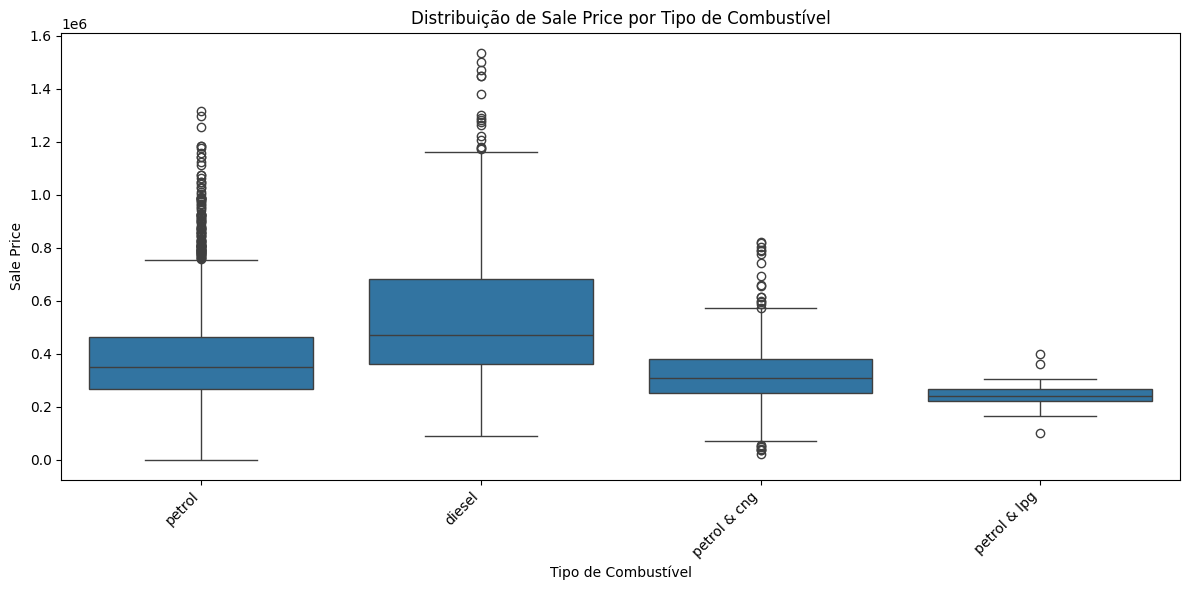

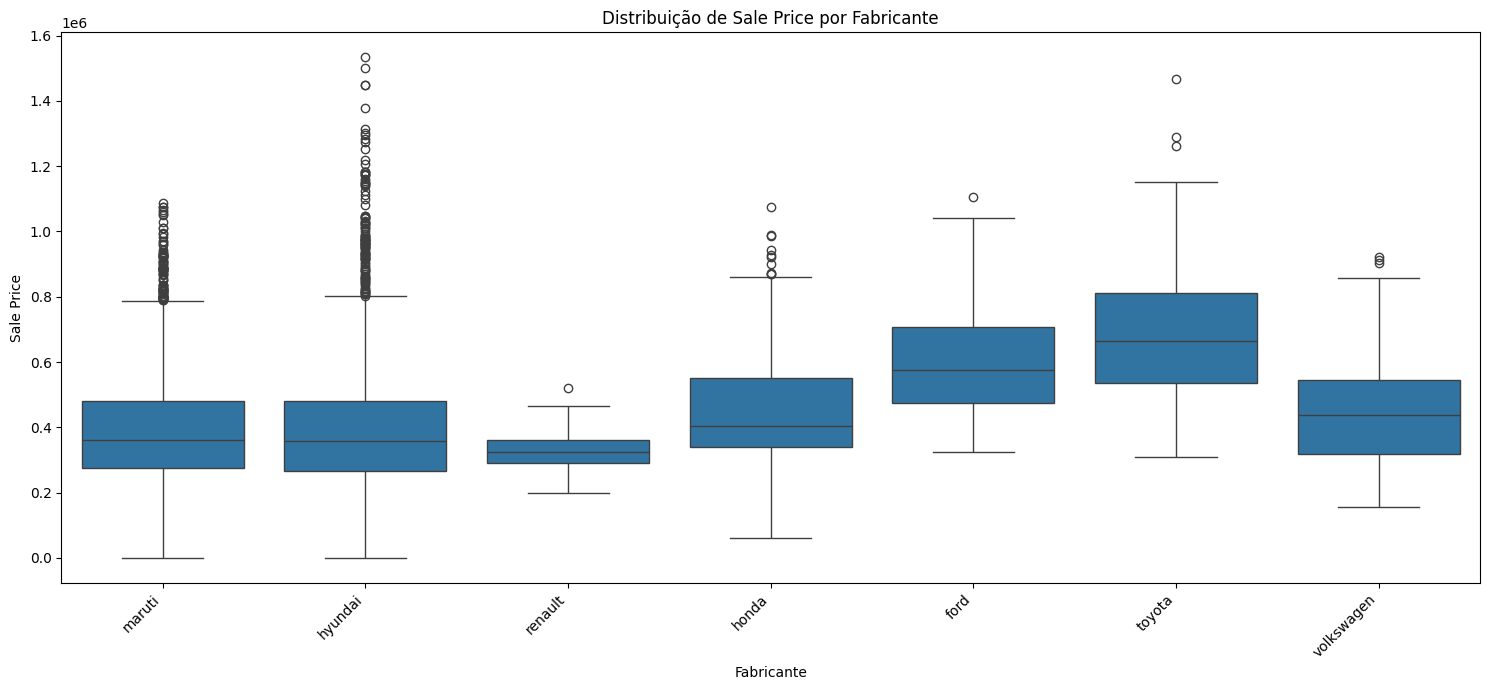


Observação: Os box plots acima ajudam a visualizar a distribuição de 'sale_price' dentro de diferentes categorias e identificar se os outliers estão concentrados em grupos específicos.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Análise de Outliers para 'sale_price' por variáveis categóricas ---
print("--- Análise de Outliers para 'sale_price' por Fuel Type e Make ---")

# Box plot de 'sale_price' por 'fuel_type'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fuel_type', y='sale_price')
plt.title('Distribuição de Sale Price por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot de 'sale_price' por 'make'
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='make', y='sale_price')
plt.title('Distribuição de Sale Price por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nObservação: Os box plots acima ajudam a visualizar a distribuição de 'sale_price' dentro de diferentes categorias e identificar se os outliers estão concentrados em grupos específicos.")

--- Tratamento de Outliers para 'sale_price' (Capping por Make e Fuel Type - Percentil Mais Apertado) ---

Aplicando capping por grupo usando percentis mais apertados (1th e 99th)...

Capping por grupo (percentil mais apertado) concluído.

Estatísticas Descritivas de 'sale_price' Antes e Depois do Capping por Grupo (Percentil Mais Apertado):

Antes do Capping:


/tmp/ipython-input-1806810110.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '733526.9999999987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped_group_percentile.loc[


,sale_price
count,5.316000e+03
mean,4.142918e+05
std,1.921765e+05
min,0.000000e+00
25%,2.824990e+05
50%,3.702490e+05
75%,4.978240e+05
max,1.533481e+06



Depois do Capping:


,sale_price
count,5.316000e+03
mean,4.137347e+05
std,1.884985e+05
min,3.770000e+04
25%,2.824990e+05
50%,3.702490e+05
75%,4.975740e+05
max,1.441376e+06


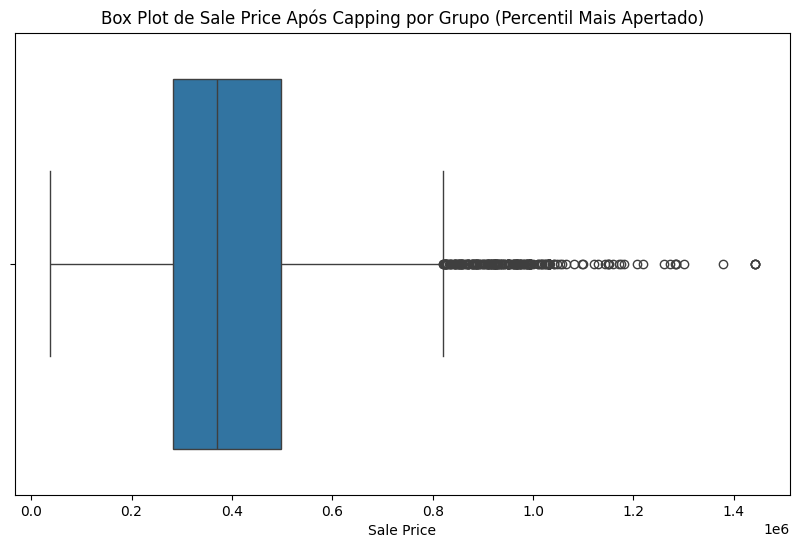


Coluna 'sale_price' no DataFrame principal 'df' atualizada com valores após capping por grupo (percentil mais apertado).

Verificando valores ausentes na coluna 'sale_price' após capping por grupo (percentil mais apertado):
0


In [ ]:
# --- Tratamento de Outliers para 'sale_price' (Capping por Make e Fuel Type - Percentil Mais Apertado) ---
print("--- Tratamento de Outliers para 'sale_price' (Capping por Make e Fuel Type - Percentil Mais Apertado) ---")

# Criar uma cópia do DataFrame para aplicar o capping por grupo
df_capped_group_percentile = df.copy()

# Identificar as colunas categóricas relevantes para agrupar (make e fuel_type)
grouping_cols = ['make', 'fuel_type']

# Definir percentis mais apertados para o capping
lower_percentile = 0.01 # Ex: 1º percentil
upper_percentile = 0.99 # Ex: 99º percentil

print(f"\nAplicando capping por grupo usando percentis mais apertados ({lower_percentile*100:.0f}th e {upper_percentile*100:.0f}th)...")

# Iterar sobre cada grupo (combinação única de make e fuel_type)
for make, fuel_type in df_capped_group_percentile[grouping_cols].drop_duplicates().values:
    # Filtrar o DataFrame para o grupo atual
    # Usar .loc para evitar SettingWithCopyWarning
    current_group_filter = (df_capped_group_percentile['make'] == make) & (df_capped_group_percentile['fuel_type'] == fuel_type)
    df_group_sale_price = df_capped_group_percentile.loc[current_group_filter, 'sale_price']

    # Verificar se o grupo tem dados suficientes para calcular os percentis
    # Para percentis 1 e 99, é bom ter uma quantidade razoável de dados, mas vamos tentar com o que temos
    if len(df_group_sale_price) < 10: # Aumentar ligeiramente o threshold para calcular percentis mais extremos
         # print(f"Grupo {make} - {fuel_type}: Dados insuficientes ({len(df_group_sale_price)}) para calcular percentis mais apertados. Ignorando capping para este grupo.")
         continue # Pular para o próximo grupo se não houver dados suficientes


    # Calcular os limites de percentil para o grupo
    lower_limit_group_percentile = df_group_sale_price.quantile(lower_percentile)
    upper_limit_group_percentile = df_group_sale_price.quantile(upper_percentile)

    # Aplicar Capping no grupo: substituir valores fora dos limites de percentil
    # Usar .loc novamente para garantir que a atribuição é feita na cópia principal
    df_capped_group_percentile.loc[
        current_group_filter & (df_capped_group_percentile['sale_price'] < lower_limit_group_percentile),
        'sale_price'
    ] = lower_limit_group_percentile

    df_capped_group_percentile.loc[
        current_group_filter & (df_capped_group_percentile['sale_price'] > upper_limit_group_percentile),
        'sale_price'
    ] = upper_limit_group_percentile

print("\nCapping por grupo (percentil mais apertado) concluído.")

# Comparar as estatísticas descritivas antes e depois do capping por percentil (opcional)
print("\nEstatísticas Descritivas de 'sale_price' Antes e Depois do Capping por Grupo (Percentil Mais Apertado):")
print("\nAntes do Capping:")
display(df['sale_price'].describe()) # DataFrame original
print("\nDepois do Capping:")
display(df_capped_group_percentile['sale_price'].describe()) # DataFrame com capping por grupo (percentil)


# Visualizar o box plot da coluna 'sale_price' após o capping por grupo (percentil mais apertado)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_capped_group_percentile['sale_price'])
plt.title('Box Plot de Sale Price Após Capping por Grupo (Percentil Mais Apertado)')
plt.xlabel('Sale Price')
plt.show()

# Atualizar o DataFrame principal 'df' com os valores imputados por grupo (percentil)
df['sale_price'] = df_capped_group_percentile['sale_price']
print("\nColuna 'sale_price' no DataFrame principal 'df' atualizada com valores após capping por grupo (percentil mais apertado).")


# Verificar novamente valores ausentes (não deve haver nenhum)
print("\nVerificando valores ausentes na coluna 'sale_price' após capping por grupo (percentil mais apertado):")
print(df['sale_price'].isnull().sum())

## Seleção e Treinamento do Primeiro Modelo com Random Search

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5316 entries, 0 to 7398
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5316 non-null   object 
 1   yr_mfr               5316 non-null   int64  
 2   fuel_type            5316 non-null   object 
 3   kms_run              5316 non-null   int64  
 4   sale_price           5316 non-null   float64
 5   city                 5316 non-null   object 
 6   times_viewed         5316 non-null   int64  
 7   body_type            5316 non-null   object 
 8   transmission         5316 non-null   object 
 9   variant              5316 non-null   object 
 10  assured_buy          5316 non-null   bool   
 11  registered_city      5316 non-null   object 
 12  registered_state     5316 non-null   object 
 13  is_hot               5316 non-null   bool   
 14  rto                  5316 non-null   object 
 15  source               5316 non-null   object

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from datetime import datetime

# 2. Pré-processamento de Dados

# Excluir colunas que não são features (e.g., 'sale_price', 'car_name', 'variant', 'ad_created_on', 'rto', 'model', 'city', 'registered_city', 'registered_state')
columns_to_exclude = ['sale_price', 'depreciation', 'is_hot',
                      'booking_down_pymnt', 'broker_quote',
                      'reserved', 'emi_starts_from', 'assured_buy', 'rto',
                      'car_availability']
all_features = df.columns.tolist()
features_for_model = [col for col in all_features if col not in columns_to_exclude]

# Separar features categóricas e numéricas do conjunto de features para o modelo
categorical_features = df[features_for_model].select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_features = df[features_for_model].select_dtypes(include=np.number).columns.tolist()


# Criar pipelines de pré-processamento para colunas numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Escalar features numéricas
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Codificar features categóricas
])

# Criar um pré-processador que aplica as transformações apropriadas a cada tipo de coluna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Manter outras colunas (não numéricas nem categóricas selecionadas) - embora tenhamos excluído explicitamente agora
)


# 3. Divisão dos Dados (conforme Passo 3 do plano)
X = df[features_for_model] # Features selecionadas
y = df['sale_price'] # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados divididos em treino e teste.")
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Dados divididos em treino e teste.
Tamanho do conjunto de treino: (4252, 20)
Tamanho do conjunto de teste: (1064, 20)


In [ ]:
# 4. Seleção e Treinamento do Modelo com Random Search

# Definir os modelos e o espaço de hiperparâmetros para o Random Search
# Podemos incluir diferentes modelos e seus respectivos hiperparâmetros
param_dist = [
    {
        'model': [RandomForestRegressor(random_state=42)], # Especifica RandomForestRegressor
        'model__n_estimators': [100, 200, 300], # Hiperparâmetros para RandomForest
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    {
        'model': [LinearRegression()], # Especifica LinearRegression
        'model__fit_intercept': [True, False] # Hiperparâmetros para LinearRegression
    }
]


# Criar um pipeline que inclui o pré-processamento e o modelo
# O nome do estimador no pipeline deve ser 'model' para corresponder ao param_dist
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42)) # Modelo placeholder inicial
                          ])

# Configurar o RandomizedSearchCV
# n_iter: número de combinações de hiperparâmetros a serem amostradas
# cv: número de folds para cross-validation
# scoring: métrica a ser otimizada (por exemplo, 'neg_mean_squared_error' para RMSE)
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Executar o Random Search nos dados de treino
print("Executando Random Search...")
random_search.fit(X_train, y_train)

print("\nRandom Search concluído.")

# Exibir os melhores hiperparâmetros encontrados
print("\nMelhores hiperparâmetros encontrados:")
print(random_search.best_params_)

# Exibir a melhor pontuação (RMSE)
print(f"\nMelhor pontuação (Negative Mean Squared Error): {random_search.best_score_:.4f}")
print(f"Melhor pontuação (RMSE): {np.sqrt(-random_search.best_score_):.4f}")

# O melhor modelo treinado está disponível em random_search.best_estimator_
best_model = random_search.best_estimator_
print("\nMelhor modelo treinado:")
print(best_model)

Executando Random Search...

Random Search concluído.

Melhores hiperparâmetros encontrados:
{'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': None, 'model': RandomForestRegressor(random_state=42)}

Melhor pontuação (Negative Mean Squared Error): -2504197540.7561
Melhor pontuação (RMSE): 50041.9578

Melhor modelo treinado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['yr_mfr', 'kms_run',
                                                   'times_viewed',
                                                   'total_owners',
                                                   'original_price']),
                       

--- Métricas de Avaliação do Modelo no Conjunto de Teste ---
Mean Squared Error (MSE): 2382759858.5691
Root Mean Squared Error (RMSE): 48813.5213
Mean Absolute Error (MAE): 32860.1439
R-squared (R²): 0.9316


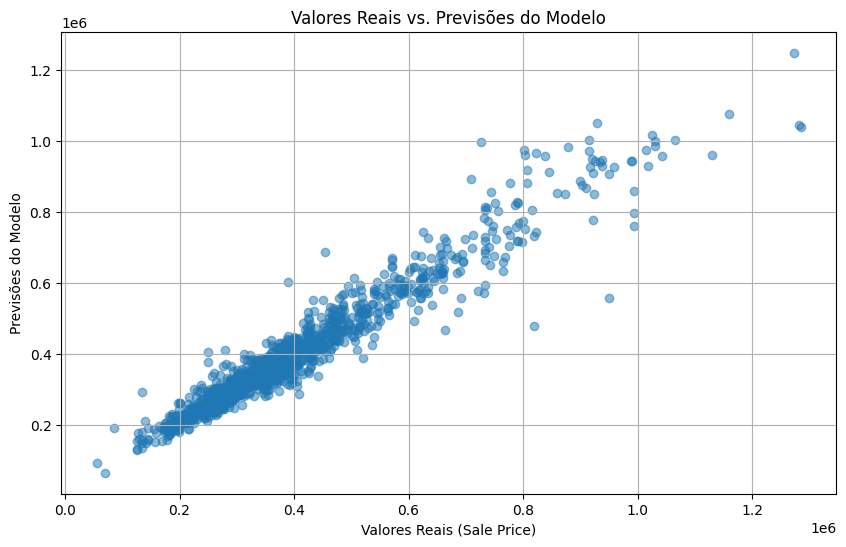

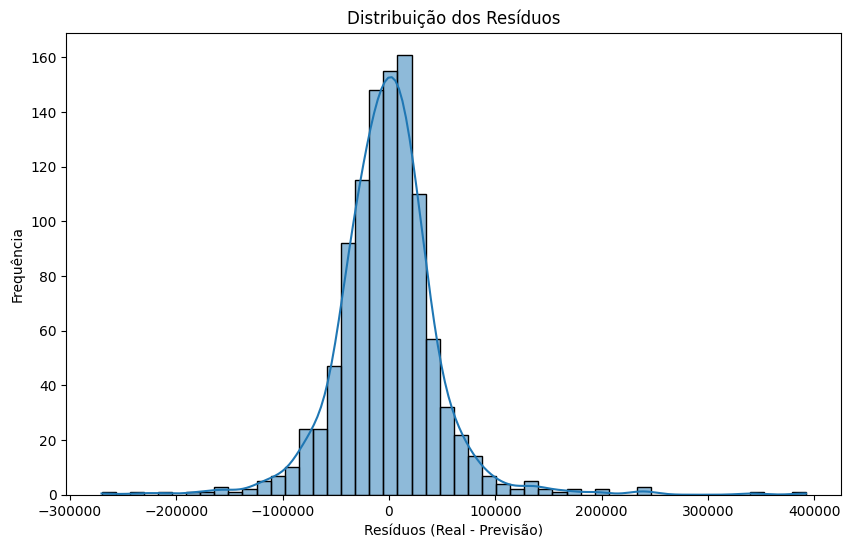

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# O melhor modelo treinado está armazenado em random_search.best_estimator_
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo usando métricas de regressão
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Métricas de Avaliação do Modelo no Conjunto de Teste ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Opcional: Visualizar as previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais (Sale Price)")
plt.ylabel("Previsões do Modelo")
plt.title("Valores Reais vs. Previsões do Modelo")
plt.grid(True)
plt.show()

# Opcional: Visualizar a distribuição dos resíduos (erros de previsão)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Resíduos (Real - Previsão)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.show()

In [ ]:
# Selecionar um exemplo de carro do conjunto de teste para demonstração
# Vamos pegar a primeira linha do conjunto de teste original (antes do pré-processamento)
sample_car_features_df = X_test.iloc[[0]]

# Converter a linha do DataFrame para um dicionário para facilitar o acesso aos valores
sample_car_features_dict = sample_car_features_df.to_dict('records')[0]

# O melhor modelo (pipeline) já inclui o pré-processamento
predicted_price = best_model.predict(sample_car_features_df)

# Obter o valor real para comparação (opcional, já que é um exemplo do conjunto de teste)
real_price = y_test.iloc[0]

# Exibir os detalhes do carro e a previsão
print("--- Detalhes do Carro para Predição ---")
# Acessar e exibir algumas das features mais relevantes do carro de exemplo usando o dicionário
print(f"Modelo do Carro: {sample_car_features_dict.get('model', 'N/A')}") # Usar .get() para segurança
print(f"Ano de Fabricação: {sample_car_features_dict.get('yr_mfr', 'N/A')}")
print(f"Tipo de Combustível: {sample_car_features_dict.get('fuel_type', 'N/A')}")
print(f"Quilometragem: {sample_car_features_dict.get('kms_run', 0):,.0f} km".replace(',', '.'))
print(f"Tipo de Carroceria: {sample_car_features_dict.get('body_type', 'N/A')}")
print(f"Transmissão: {sample_car_features_dict.get('transmission', 'N/A')}")
# Acessar original_price
print(f"Preço Original (Imputado): {sample_car_features_dict.get('original_price', 0):,.0f}".replace(',', '.'))


print("\n--- Resultado da Predição ---")
print(f"O modelo de predição, baseado nas características fornecidas, estima o valor de venda em aproximadamente: {predicted_price[0]:,.2f}".replace(',', '.'))

# Comparação com o valor real (se disponível)
print(f"Valor de Venda Real (do conjunto de teste): {real_price:,.2f}".replace(',', '.'))
print(f"Diferença (Real - Predição): {real_price - predicted_price[0]:,.2f}".replace(',', '.'))

--- Detalhes do Carro para Predição ---
Modelo do Carro: grand i10
Ano de Fabricação: 2017
Tipo de Combustível: petrol
Quilometragem: 44.311 km
Tipo de Carroceria: hatchback
Transmissão: manual
Preço Original (Imputado): 499.333

--- Resultado da Predição ---
O modelo de predição. baseado nas características fornecidas. estima o valor de venda em aproximadamente: 436.465.46
Valor de Venda Real (do conjunto de teste): 406.399.00
Diferença (Real - Predição): -30.066.46


## Seleção e Treinamento do Modelo com Gradient Boosting e Random Search

Esta seção implementa a seleção e treinamento de um modelo `GradientBoostingRegressor` utilizando `RandomizedSearchCV` para otimização de hiperparâmetros. O processo é análogo ao que foi feito para o Random Forest e a Regressão Linear, buscando o melhor desempenho para este tipo de algoritmo de ensemble.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# --- Início: Re-definição de pré-processamento e dados de treino para garantir a execução independente ---
# Essas partes são replicadas de células anteriores para evitar NameError caso o ambiente seja resetado

# Excluir colunas que não são features
columns_to_exclude = ['sale_price', 'depreciation', 'is_hot',
                      'booking_down_pymnt', 'broker_quote',
                      'reserved', 'emi_starts_from', 'assured_buy', 'rto',
                      'car_availability']
all_features = df.columns.tolist()
features_for_model = [col for col in all_features if col not in columns_to_exclude]

# Separar features categóricas e numéricas
categorical_features = df[features_for_model].select_dtypes(include=['object', 'bool']).columns.tolist()
numeric_features = df[features_for_model].select_dtypes(include=np.number).columns.tolist()

# Criar pipelines de pré-processamento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Escalar features numéricas
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Codificar features categóricas
])

# Criar um pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Divisão dos Dados
X = df[features_for_model] # Features selecionadas
y = df['sale_price'] # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# --- Fim: Re-definição de pré-processamento e dados de treino ---


# Definir o espaço de hiperparâmetros para o GradientBoostingRegressor
param_dist_gb = {
    'model': [GradientBoostingRegressor(random_state=42)], # Especifica GradientBoostingRegressor
    'model__n_estimators': [100, 200, 300], # Número de árvores
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2], # Taxa de aprendizado
    'model__max_depth': [3, 5, 8, 10], # Profundidade máxima de cada árvore
    'model__min_samples_split': [2, 5, 10], # Mínimo de amostras para dividir um nó interno
    'model__min_samples_leaf': [1, 2, 4] # Mínimo de amostras em uma folha
}

# Criar um pipeline que inclui o pré-processamento e o modelo Gradient Boosting
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingRegressor(random_state=42)) # Modelo placeholder inicial
                             ])

# Configurar o RandomizedSearchCV para Gradient Boosting
# 'n_iter' controla o número de combinações de hiperparâmetros a serem testadas aleatoriamente
# 'cv' define o número de folds para validação cruzada
# 'scoring' define a métrica de avaliação (neg_mean_squared_error para RMSE)
random_search_gb = RandomizedSearchCV(pipeline_gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Executar o Random Search nos dados de treino
print("Executando Random Search para Gradient Boosting...")
random_search_gb.fit(X_train, y_train)

print("\nRandom Search para Gradient Boosting concluído.")

# Exibir os melhores hiperparâmetros encontrados
print("\nMelhores hiperparâmetros encontrados para Gradient Boosting:")
print(random_search_gb.best_params_)

# Exibir a melhor pontuação (RMSE) da validação cruzada
print(f"\nMelhor pontuação (Negative Mean Squared Error) para Gradient Boosting: {random_search_gb.best_score_:.4f}")
print(f"Melhor pontuação (RMSE) para Gradient Boosting: {np.sqrt(-random_search_gb.best_score_):.4f}")

# O melhor modelo treinado está disponível em random_search_gb.best_estimator_
best_model_gb = random_search_gb.best_estimator_
print("\nMelhor modelo de Gradient Boosting treinado:")
print(best_model_gb)

Executando Random Search para Gradient Boosting...

Random Search para Gradient Boosting concluído.

Melhores hiperparâmetros encontrados para Gradient Boosting:
{'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 10, 'model__learning_rate': 0.2, 'model': GradientBoostingRegressor(random_state=42)}

Melhor pontuação (Negative Mean Squared Error) para Gradient Boosting: -2085589080.7068
Melhor pontuação (RMSE) para Gradient Boosting: 45668.2502

Melhor modelo de Gradient Boosting treinado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['yr_mfr', 'kms_run',
                                                   'times_vie

--- Métricas de Avaliação do Modelo Gradient Boosting no Conjunto de Teste ---
Mean Squared Error (MSE): 2050668794.4328
Root Mean Squared Error (RMSE): 45284.3107
Mean Absolute Error (MAE): 29625.3610
R-squared (R²): 0.9411


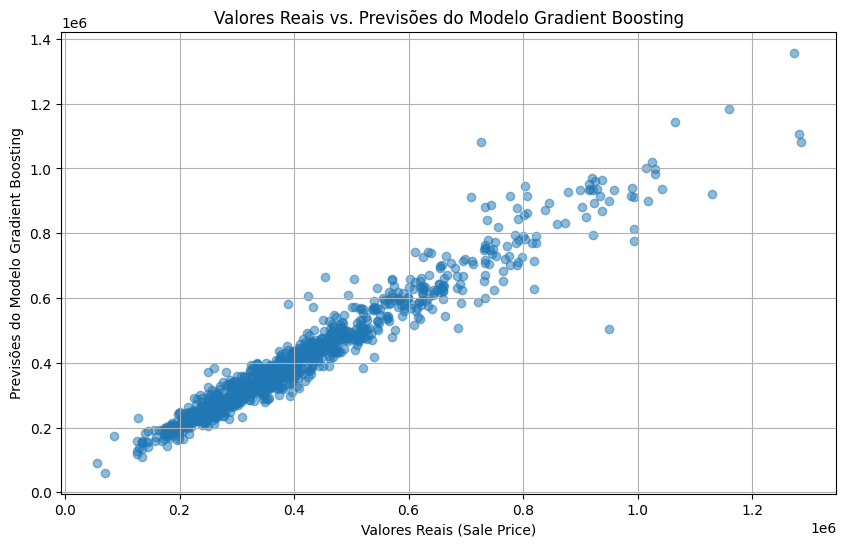

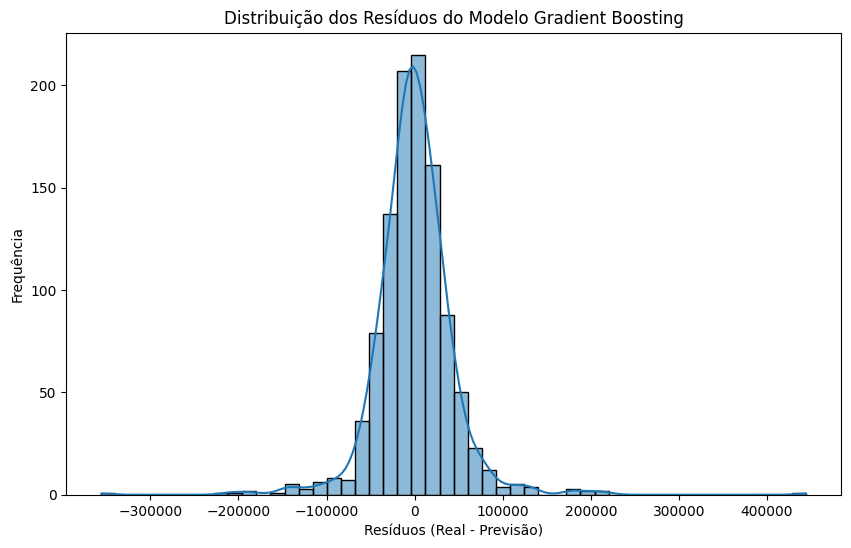


--- Hiperparâmetros Utilizados no Melhor Modelo Gradient Boosting ---
  alpha: 0.9
  ccp_alpha: 0.0
  criterion: friedman_mse
  init: None
  learning_rate: 0.2
  loss: squared_error
  max_depth: 10
  max_features: None
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 4
  min_samples_split: 2
  min_weight_fraction_leaf: 0.0
  n_estimators: 200
  n_iter_no_change: None
  random_state: 42
  subsample: 1.0
  tol: 0.0001
  validation_fraction: 0.1
  verbose: 0
  warm_start: False

--- Teste de Previsão para um Carro Específico (Gradient Boosting) ---
Detalhes do Carro para Predição:
  Carro: hyundai grand i10
  Modelo: grand i10
  Ano de Fabricação: 2017
  Tipo de Combustível: petrol
  Quilometragem: 44.311 km
  Tipo de Carroceria: hatchback
  Transmissão: manual
  Preço Original (Imputado/Capped): 499.333

Resultado da Predição:
O modelo de predição (Gradient Boosting) estima o valor de venda em aproximadamente: 445.179.86 
Valor de Venda Real (do conjunto de teste)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# O melhor modelo treinado de Gradient Boosting está disponível em random_search_gb.best_estimator_
best_model_gb = random_search_gb.best_estimator_

# Fazer previsões no conjunto de teste
y_pred_gb = best_model_gb.predict(X_test)

# Avaliar o modelo usando métricas de regressão
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("--- Métricas de Avaliação do Modelo Gradient Boosting no Conjunto de Teste ---")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"R-squared (R²): {r2_gb:.4f}")

# Opcional: Visualizar as previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel("Valores Reais (Sale Price)")
plt.ylabel("Previsões do Modelo Gradient Boosting")
plt.title("Valores Reais vs. Previsões do Modelo Gradient Boosting")
plt.grid(True)
plt.show()

# Opcional: Visualizar a distribuição dos resíduos (erros de previsão)
residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
sns.histplot(residuals_gb, bins=50, kde=True)
plt.xlabel("Resíduos (Real - Previsão)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos do Modelo Gradient Boosting")
plt.show()

# --- Hiperparâmetros Utilizados no Melhor Modelo Gradient Boosting ---
print("\n--- Hiperparâmetros Utilizados no Melhor Modelo Gradient Boosting ---")
# Acessar os parâmetros do melhor modelo (que é um pipeline)
model_params = best_model_gb.get_params()

# Filtrar apenas os hiperparâmetros específicos do GradientBoostingRegressor
filtered_params = {k.replace('model__', ''): v for k, v in model_params.items() if k.startswith('model__')}
for param, value in filtered_params.items():
    print(f"  {param}: {value}")

# --- Teste de Previsão para um Carro Específico com Gradient Boosting ---
print("\n--- Teste de Previsão para um Carro Específico (Gradient Boosting) ---")

# Selecionar um exemplo de carro do conjunto de teste para demonstração
# Vamos pegar a primeira linha do conjunto de teste original (antes do pré-processamento)
sample_car_features_gb_df = X_test.iloc[[0]]

# Converter a linha do DataFrame para um dicionário para facilitar o acesso aos valores
sample_car_features_gb_dict = sample_car_features_gb_df.to_dict('records')[0]

# O melhor modelo (pipeline) já inclui o pré-processamento
predicted_price_gb = best_model_gb.predict(sample_car_features_gb_df)

# Obter o valor real para comparação (opcional, já que é um exemplo do conjunto de teste)
real_price_gb = y_test.iloc[0]

# Exibir os detalhes do carro e a previsão
print("Detalhes do Carro para Predição:")
print(f"  Carro: {sample_car_features_gb_dict.get('car_name', 'N/A')}")
print(f"  Modelo: {sample_car_features_gb_dict.get('model', 'N/A')}")
print(f"  Ano de Fabricação: {sample_car_features_gb_dict.get('yr_mfr', 'N/A')}")
print(f"  Tipo de Combustível: {sample_car_features_gb_dict.get('fuel_type', 'N/A')}")
print(f"  Quilometragem: {sample_car_features_gb_dict.get('kms_run', 0):,.0f} km".replace(',', '.'))
print(f"  Tipo de Carroceria: {sample_car_features_gb_dict.get('body_type', 'N/A')}")
print(f"  Transmissão: {sample_car_features_gb_dict.get('transmission', 'N/A')}")
print(f"  Preço Original (Imputado/Capped): {sample_car_features_gb_dict.get('original_price', 0):,.0f}".replace(',', '.'))

print("\nResultado da Predição:")
print(f"O modelo de predição (Gradient Boosting) estima o valor de venda em aproximadamente: {predicted_price_gb[0]:,.2f} ".replace(',', '.'))
print(f"Valor de Venda Real (do conjunto de teste): {real_price_gb:,.2f}".replace(',', '.'))
print(f"Diferença (Real - Predição): {real_price_gb - predicted_price_gb[0]:,.2f}".replace(',', '.'))

## Importância das Features para o Modelo Gradient Boosting

Esta seção visualiza a importância de cada feature (característica) no modelo Gradient Boosting treinado. A importância da feature indica o quanto cada variável contribuiu para a previsão do modelo, sendo útil para entender quais fatores são mais relevantes na determinação do preço de venda dos veículos.

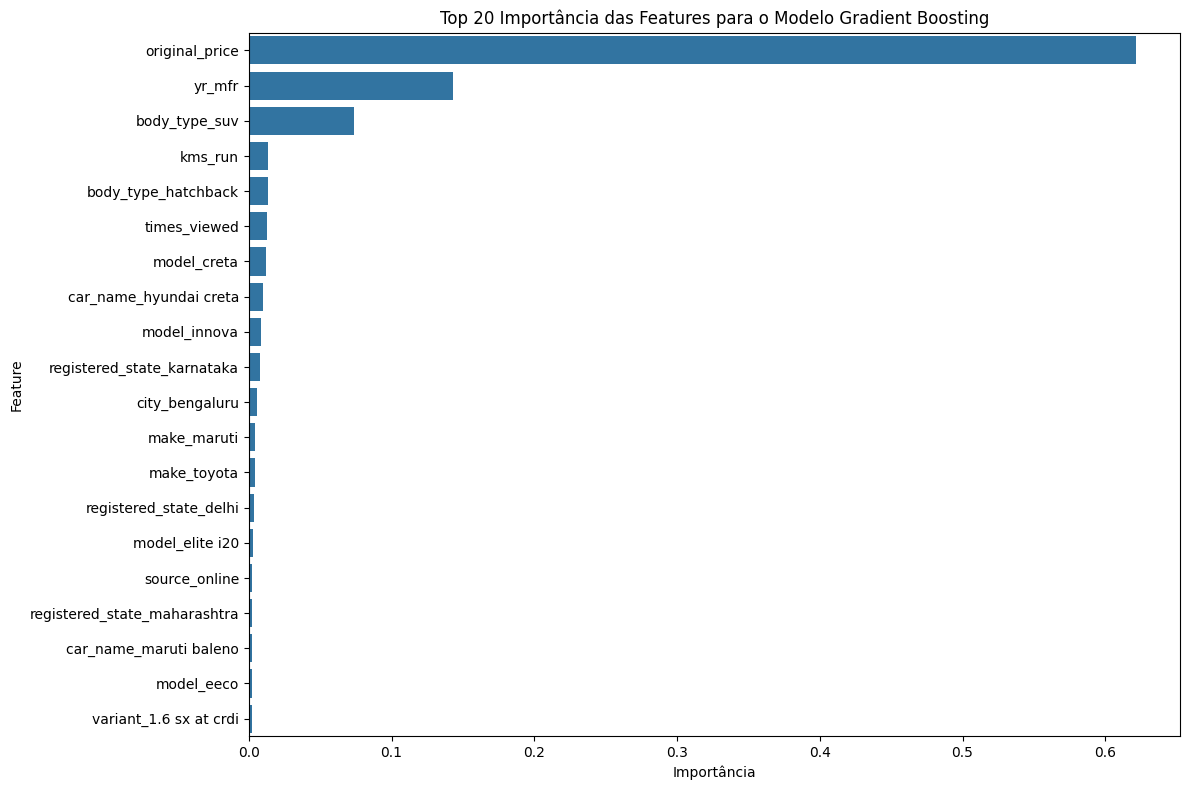

As importâncias das features foram calculadas e visualizadas.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obter o melhor modelo Gradient Boosting (pipeline)
best_model_gb = random_search_gb.best_estimator_

# Acessar o regressor dentro do pipeline
gb_model = best_model_gb.named_steps['model']

# Obter as importâncias das features
feature_importances = gb_model.feature_importances_

# Obter os nomes das features após o pré-processamento (OneHotEncoder)
# Primeiro, obter os nomes das features numéricas
numeric_feature_names = best_model_gb.named_steps['preprocessor'].transformers_[0][2]

# Em seguida, obter os nomes das features categóricas após o OneHotEncoding
# O get_feature_names_out() precisa ser chamado no onehot encoder que está dentro do pipeline de categorias
# Certifique-se de que o onehot encoder está no índice correto (o segundo transformer)
cat_pipeline = best_model_gb.named_steps['preprocessor'].transformers_[1][1] # Acessa o Pipeline do OneHotEncoder
onehot_encoder = cat_pipeline.named_steps['onehot']
categorical_feature_names = list(onehot_encoder.get_feature_names_out(best_model_gb.named_steps['preprocessor'].transformers_[1][2]))

# Combinar todos os nomes das features
all_feature_names = numeric_feature_names + categorical_feature_names

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Ordenar as features por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar as importâncias das features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20)) # Exibir as top 20 features
plt.title('Top 20 Importância das Features para o Modelo Gradient Boosting')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("As importâncias das features foram calculadas e visualizadas.")

--- Análise da Variação Percentual (Random Forest) ---
Root Mean Squared Error (RMSE) em Reais: 3254.23 BRL
Estatísticas Descritivas da Variação Percentual:


,percentage_variation_rf
count,1064.000000
mean,1.802874
std,12.237379
min,-41.546711
25%,-5.300189
50%,0.445446
75%,7.797426
max,125.922761


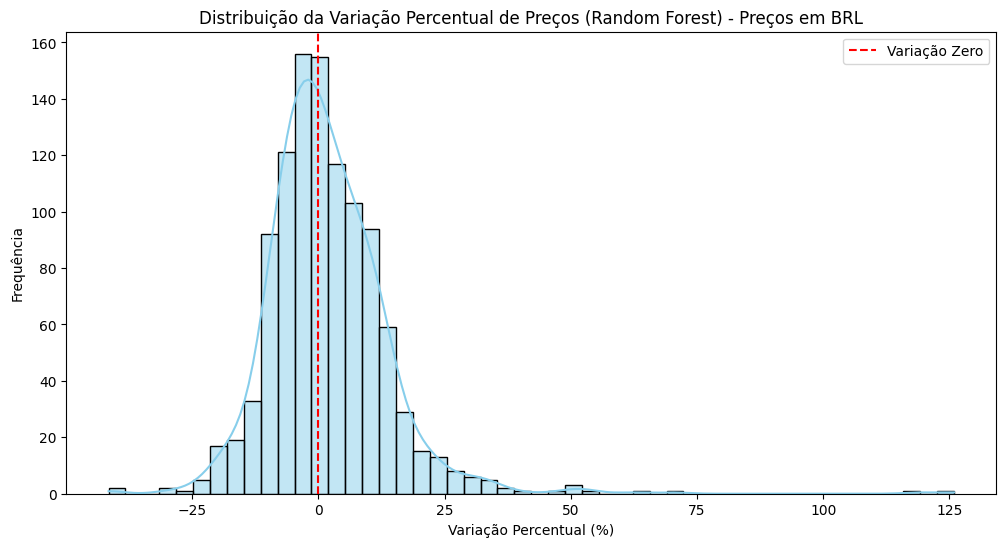


--- Análise da Variação Percentual (Gradient Boosting) ---
Root Mean Squared Error (RMSE) em Reais: 3018.95 BRL
Estatísticas Descritivas da Variação Percentual:


,percentage_variation_gb
count,1064.000000
mean,1.004282
std,10.718255
min,-46.757198
25%,-4.980540
50%,0.458877
75%,5.956599
max,105.472138


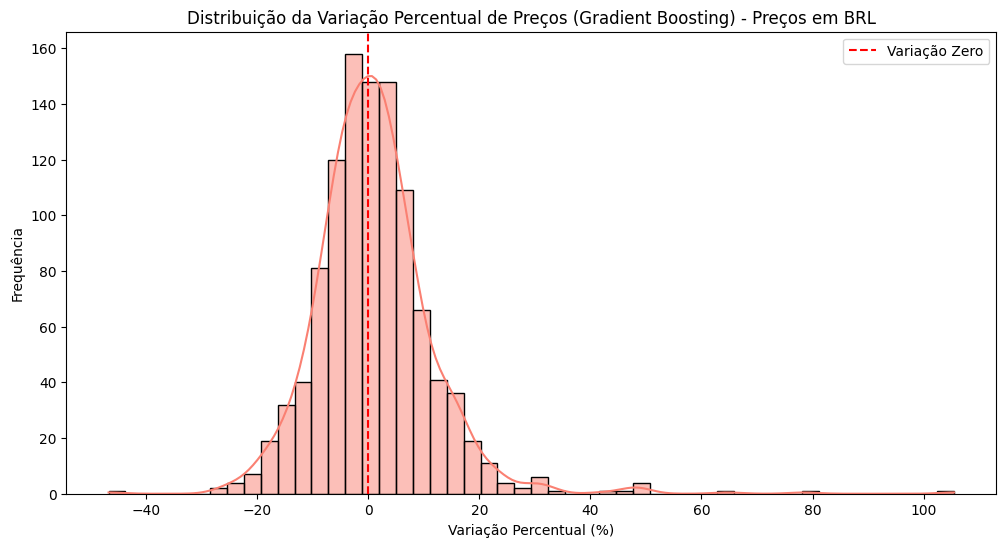


Para ambos os modelos, uma variação percentual próxima de zero indica maior precisão.
Valores positivos indicam que o modelo previu um preço maior que o real, e negativos indicam o contrário.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Importar numpy para np.sqrt

# --- Definir Taxa de Câmbio (Hipotética) ---
# Usando uma taxa de câmbio hipotética para demonstração: 1 BRL = 15 INR (aproximadamente)
# Esta taxa pode ser ajustada conforme a necessidade.
inr_to_brl_rate = 1 / 15.0

# --- Cálculo da Variação Percentual para Random Forest ---
# As previsões do modelo Random Forest (ou Linear Regression, dependendo do best_model) já foram geradas em 'y_pred'
# 'y_test' contém os valores reais

# Converter valores reais e previstos para BRL
y_test_brl = y_test * inr_to_brl_rate
y_pred_brl = y_pred * inr_to_brl_rate

# Criar um DataFrame para comparar os valores reais e previstos em BRL
results_rf = pd.DataFrame({'real_price_brl': y_test_brl, 'predicted_price_rf_brl': y_pred_brl})

# Calcular a variação percentual: ((previsão - real) / real) * 100
results_rf['percentage_variation_rf'] = ((results_rf['predicted_price_rf_brl'] - results_rf['real_price_brl']) / results_rf['real_price_brl']) * 100

# Calcular RMSE em BRL
mse_rf_brl = mean_squared_error(y_test_brl, y_pred_brl)
rmse_rf_brl = np.sqrt(mse_rf_brl)

print("--- Análise da Variação Percentual (Random Forest) ---")
print(f"Root Mean Squared Error (RMSE) em Reais: {rmse_rf_brl:.2f} BRL")
print("Estatísticas Descritivas da Variação Percentual:")
display(results_rf['percentage_variation_rf'].describe())

# Visualizar a distribuição da variação percentual
plt.figure(figsize=(12, 6))
sns.histplot(results_rf['percentage_variation_rf'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição da Variação Percentual de Preços (Random Forest) - Preços em BRL')
plt.xlabel('Variação Percentual (%)')
plt.ylabel('Frequência')
plt.axvline(x=0, color='red', linestyle='--', label='Variação Zero')
plt.legend()
plt.show()

# --- Cálculo da Variação Percentual para Gradient Boosting ---
# As previsões do modelo Gradient Boosting já foram geradas em 'y_pred_gb'

# Converter valores reais e previstos para BRL
y_pred_gb_brl = y_pred_gb * inr_to_brl_rate

# Criar um DataFrame para comparar os valores reais e previstos em BRL
results_gb = pd.DataFrame({'real_price_brl': y_test_brl, 'predicted_price_gb_brl': y_pred_gb_brl})

# Calcular a variação percentual: ((previsão - real) / real) * 100
results_gb['percentage_variation_gb'] = ((results_gb['predicted_price_gb_brl'] - results_gb['real_price_brl']) / results_gb['real_price_brl']) * 100

# Calcular RMSE em BRL
mse_gb_brl = mean_squared_error(y_test_brl, y_pred_gb_brl)
rmse_gb_brl = np.sqrt(mse_gb_brl)

print("\n--- Análise da Variação Percentual (Gradient Boosting) ---")
print(f"Root Mean Squared Error (RMSE) em Reais: {rmse_gb_brl:.2f} BRL")
print("Estatísticas Descritivas da Variação Percentual:")
display(results_gb['percentage_variation_gb'].describe())

# Visualizar a distribuição da variação percentual
plt.figure(figsize=(12, 6))
sns.histplot(results_gb['percentage_variation_gb'], bins=50, kde=True, color='salmon')
plt.title('Distribuição da Variação Percentual de Preços (Gradient Boosting) - Preços em BRL')
plt.xlabel('Variação Percentual (%)')
plt.ylabel('Frequência')
plt.axvline(x=0, color='red', linestyle='--', label='Variação Zero')
plt.legend()
plt.show()

print("\nPara ambos os modelos, uma variação percentual próxima de zero indica maior precisão.")
print("Valores positivos indicam que o modelo previu um preço maior que o real, e negativos indicam o contrário.")
